# Introduction - 
The aim of this project is to help a winery in Portugal optimize the production of their "Vinho Verde" wines. By analyzing two datasets of red and white wines, we seek to identify the factors that determine wine quality, allowing the winery to improve their production process.

## Index
## Summary

In this code cell, we import the necessary libraries required for data analysis and modeling. This includes standard libraries like NumPy and SciPy for mathematical operations, third-party libraries like Pandas for data manipulation, and Scikit-learn for machine learning tasks. We also load the red and white wine datasets, adding a "type" column to differentiate between the two. Additionally, we set the display format for floating-point numbers to two decimal places for easier readability.

In [284]:
# Standard Library Imports
import numpy as np
import scipy.stats as st

# Third-Party Libraries
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import xgboost as xgb

# Scikit-learn Modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Pandas Specific Imports
from pandas.api.types import CategoricalDtype

# Stats
from scipy.stats import boxcox

# Warnings
import warnings
warnings.filterwarnings('ignore')

red_wine = pd.read_csv('wine_data/winequality-red.csv', encoding='unicode_escape', sep=';')
white_wine = pd.read_csv('wine_data/winequality-white.csv', encoding='unicode_escape', sep=';')

# Adding type labels to indicate red or white wine
red_wine['type'] = 'Red'
white_wine['type'] = 'White'

# Format the floats to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In this code cell, we print the first and last few rows of both the red and white wine datasets using head() and tail(). This helps us confirm that the data has been loaded correctly and gives us a quick view of the structure and content of the datasets.

In [285]:
print("\n" + "-" * 50)
print(">>> CSV Head <<<")
print("-" * 50 + "\n")

print("\nRed Wine Head:\n", red_wine.head(5))
print("\nWhite Wine Head:\n", white_wine.head(5))

print("\n" + "-" * 50)
print(">>> CSV Tail <<<")
print("-" * 50 + "\n")

print("\nRed Wine Tail:\n", red_wine.tail(5))
print("\nWhite Wine Tail:\n", white_wine.tail(5))


--------------------------------------------------
>>> CSV Head <<<
--------------------------------------------------


Red Wine Head:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.40              0.70         0.00            1.90       0.08   
1           7.80              0.88         0.00            2.60       0.10   
2           7.80              0.76         0.04            2.30       0.09   
3          11.20              0.28         0.56            1.90       0.07   
4           7.40              0.70         0.00            1.90       0.08   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                11.00                 34.00     1.00 3.51       0.56   
1                25.00                 67.00     1.00 3.20       0.68   
2                15.00                 54.00     1.00 3.26       0.65   
3                17.00                 60.00     1.00 3.16       0.58   
4                11.00      

# Data Understanding
- The shape (dimensions) of the red and white wine datasets to confirm their size.
- Display the column names of the red and white wine datasets to understand their structure.
- The number of unique values in each column of the red and white wine datasets.
- Display the data types of each column in the red and white wine datasets.

These actions help us gain a quick overview of the data, ensuring we understand its structure, size, and types of information in order to make informed decisions during further analysis and preprocessing.

In [286]:
print("\n" + "-" * 50)
print(">>> Red Wine Data Shape <<<")
print(red_wine.shape)
print("\n>>> White Wine Data Shape <<<")
print(white_wine.shape)
print("-" * 50 + "\n")


--------------------------------------------------
>>> Red Wine Data Shape <<<
(1599, 13)

>>> White Wine Data Shape <<<
(4898, 13)
--------------------------------------------------



The red wine dataset contains 1,599 rows and 13 columns, while the white wine dataset has 4,898 rows and 13 columns, indicating that the white wine dataset is larger in size.

In [287]:
red_wine.columns
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [288]:
red_wine.nunique()
white_wine.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
type                      1
dtype: int64

In [289]:
red_wine.dtypes
white_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

### Interpretation
Most features in the dataset are of type float64, except for "quality" (which is int64) and "type" (which is object), indicating that "quality" is numeric, while "type" is categorical.

# About the Data
- Summary of the red and white wine datasets, showing data types, non-null counts, and memory usage to check for missing values and data integrity.
- Summary statistics (mean, standard deviation, min, max, etc.) for the red and white wine datasets to understand their distributions and central tendencies.

These summaries help us assess the quality of the data and understand key characteristics of the variables, aiding in the detection of anomalies and guiding further analysis.

In [290]:
print("\n" + "-" * 50)
print(">>> Red Wine Info <<<")
print("-" * 50 + "\n")

red_wine.info()

print("\n" + "-" * 50)
print(">>> White Wine Info <<<")
print("-" * 50 + "\n")

white_wine.info()


--------------------------------------------------
>>> Red Wine Info <<<
--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dt

### Interpretation
Both the red and white wine datasets have no missing values, with each column containing 100% non-null entries. The datasets consist of 13 columns, mostly of float64 type, with the "quality" column as int64 and "type" as object. The white wine dataset is significantly larger than the red wine dataset, with 4,898 rows compared to 1,599 rows.

In [291]:
# Wine Data Summary Staistics
print("\n" + "-" * 50)
print(">>> Red Wine Summary<<<")
print("-" * 50 + "\n")

print(red_wine.describe())

print("\n" + "-" * 50)
print(">>> White Wine Summary <<<")
print("-" * 50 + "\n")
print(white_wine.describe())


--------------------------------------------------
>>> Red Wine Summary<<<
--------------------------------------------------

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count    1599.00              1599.00               1599.00  1599.00 1599.00   
mean        0.09                15.87                 46.47     1.00    

### Interpretation
- Red Wine: The red wine dataset shows a range of values for different features, with acidity levels (fixed, volatile) being more concentrated in the lower ranges. Alcohol content has a wide range, with the majority of wines having alcohol content between 8.4% and 14.9%. The quality ratings show a concentration around the middle values (5-6).
- White Wine: The white wine dataset shows a slightly lower average for acidity (both fixed and volatile), while the alcohol content and quality ratings are slightly higher compared to red wine on average. White wine also has a higher variation in residual sugar compared to red wine, with some wines having very high residual sugar.

# Data Pre-Processing
- Check for null values in the red and white wine datasets to identify any missing data that needs to be handled during preprocessing.
- Drop any rows with null values from the red and white wine datasets and then prints their new shapes to confirm the removal.
- Check and prints the number of duplicate rows in both the red and white wine datasets to ensure data uniqueness.
- Remove duplicate rows from both the red and white wine datasets and prints their updated shapes to confirm the changes.

These steps ensure the data is clean and consistent by handling missing values and duplicates, which helps improve the accuracy and quality of subsequent analysis and modeling.

In [292]:
# Checks for null values
pd.isnull(red_wine).sum()
pd.isnull(white_wine).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [293]:
# drop null values (if any)
red_wine.dropna(inplace=True)
white_wine.dropna(inplace=True)

print("\n" + "-" * 50)
print(">>> Red Wine Data Shape <<<")
print(red_wine.shape)
print("\n>>> White Wine Data Shape <<<")
print(white_wine.shape)
print("-" * 50 + "\n")


--------------------------------------------------
>>> Red Wine Data Shape <<<
(1599, 13)

>>> White Wine Data Shape <<<
(4898, 13)
--------------------------------------------------



In [294]:
print("\n" + "-" * 50)
print(">>> Duplicate rows in red wine <<<")
print("-" * 50 + "\n")
print(red_wine.duplicated().sum())

print("\n" + "-" * 50)
print(">>> Duplicate rows in white wine <<<")
print("-" * 50 + "\n")
print(white_wine.duplicated().sum())


--------------------------------------------------
>>> Duplicate rows in red wine <<<
--------------------------------------------------

240

--------------------------------------------------
>>> Duplicate rows in white wine <<<
--------------------------------------------------

937


### Interpretation
- Red Wine: There are 240 duplicate rows in the red wine dataset, indicating that some records have been repeated and will need to be removed for better analysis.
- White Wine: The white wine dataset contains 937 duplicate rows, suggesting that a significant number of rows are duplicates and should also be removed to ensure data quality.

In [295]:
# Drop duplicates
red_wine.drop_duplicates(inplace=True)
white_wine.drop_duplicates(inplace=True)

print("\n" + "-" * 50)
print(">>> Red Wine Shape after removing duplicates <<<")
print("-" * 50 + "\n")
print(red_wine.shape)

print("\n" + "-" * 50)
print(">>> White Wine Shape after removing duplicates <<<")
print("-" * 50 + "\n")
print(white_wine.shape)


--------------------------------------------------
>>> Red Wine Shape after removing duplicates <<<
--------------------------------------------------

(1359, 13)

--------------------------------------------------
>>> White Wine Shape after removing duplicates <<<
--------------------------------------------------

(3961, 13)


- Red Wine: After removing the 240 duplicate rows, the red wine dataset now contains 1359 rows, ensuring no repeated entries remain.
- White Wine: Similarly, the white wine dataset is reduced to 3961 rows after removing 937 duplicates, improving data integrity.

# Aggregations
- Calculate and print the average values of the features for each quality level in the red and white wine datasets, excluding the 'type' column.

By aggregating the data by wine quality, we can identify patterns and relationships between the features and the quality, which can help in understanding the factors that influence wine quality.

In [296]:
print("\n" + "-" * 50)
print(">>> Average Values by Quality - Red Wine <<<")
print("-" * 50 + "\n")
print(red_wine.drop(columns='type').groupby('quality').mean())

print("\n" + "-" * 50)
print(">>> Average Values by Quality - White Wine <<<")
print("-" * 50 + "\n")
print(white_wine.drop(columns='type').groupby('quality').mean())


--------------------------------------------------
>>> Average Values by Quality - Red Wine <<<
--------------------------------------------------

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                 8.36              0.88         0.17            2.64   
4                 7.78              0.69         0.17            2.69   
5                 8.17              0.58         0.24            2.51   
6                 8.34              0.50         0.28            2.46   
7                 8.86              0.40         0.37            2.72   
8                 8.44              0.43         0.38            2.58   

         chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
quality                                                                       
3             0.12                11.00                 24.90     1.00 3.40   
4             0.09           

### Average Values by Quality Interpretation:
- Red Wine: The analysis of average values by quality reveals that red wines with higher quality ratings (such as 7 and 8) generally have higher levels of alcohol, sulphates, and lower volatile acidity. The quality scores seem to correlate with a balance of various attributes, including a slight increase in alcohol content as quality rises.
- White Wine: Similar trends are observed in white wine, with wines of higher quality (such as 9) showing higher alcohol content and more balanced acidity levels. Residual sugar levels also fluctuate with quality, reflecting the differences in sweetness across quality tiers.

# Feature Distribution check
- Plot histograms for each feature in the red and white wine datasets to visually inspect their distributions and identify any skewness or outliers.

Visualizing the feature distributions helps us understand the spread and characteristics of the data, which is crucial for detecting patterns, potential outliers, and deciding on necessary transformations for modeling.

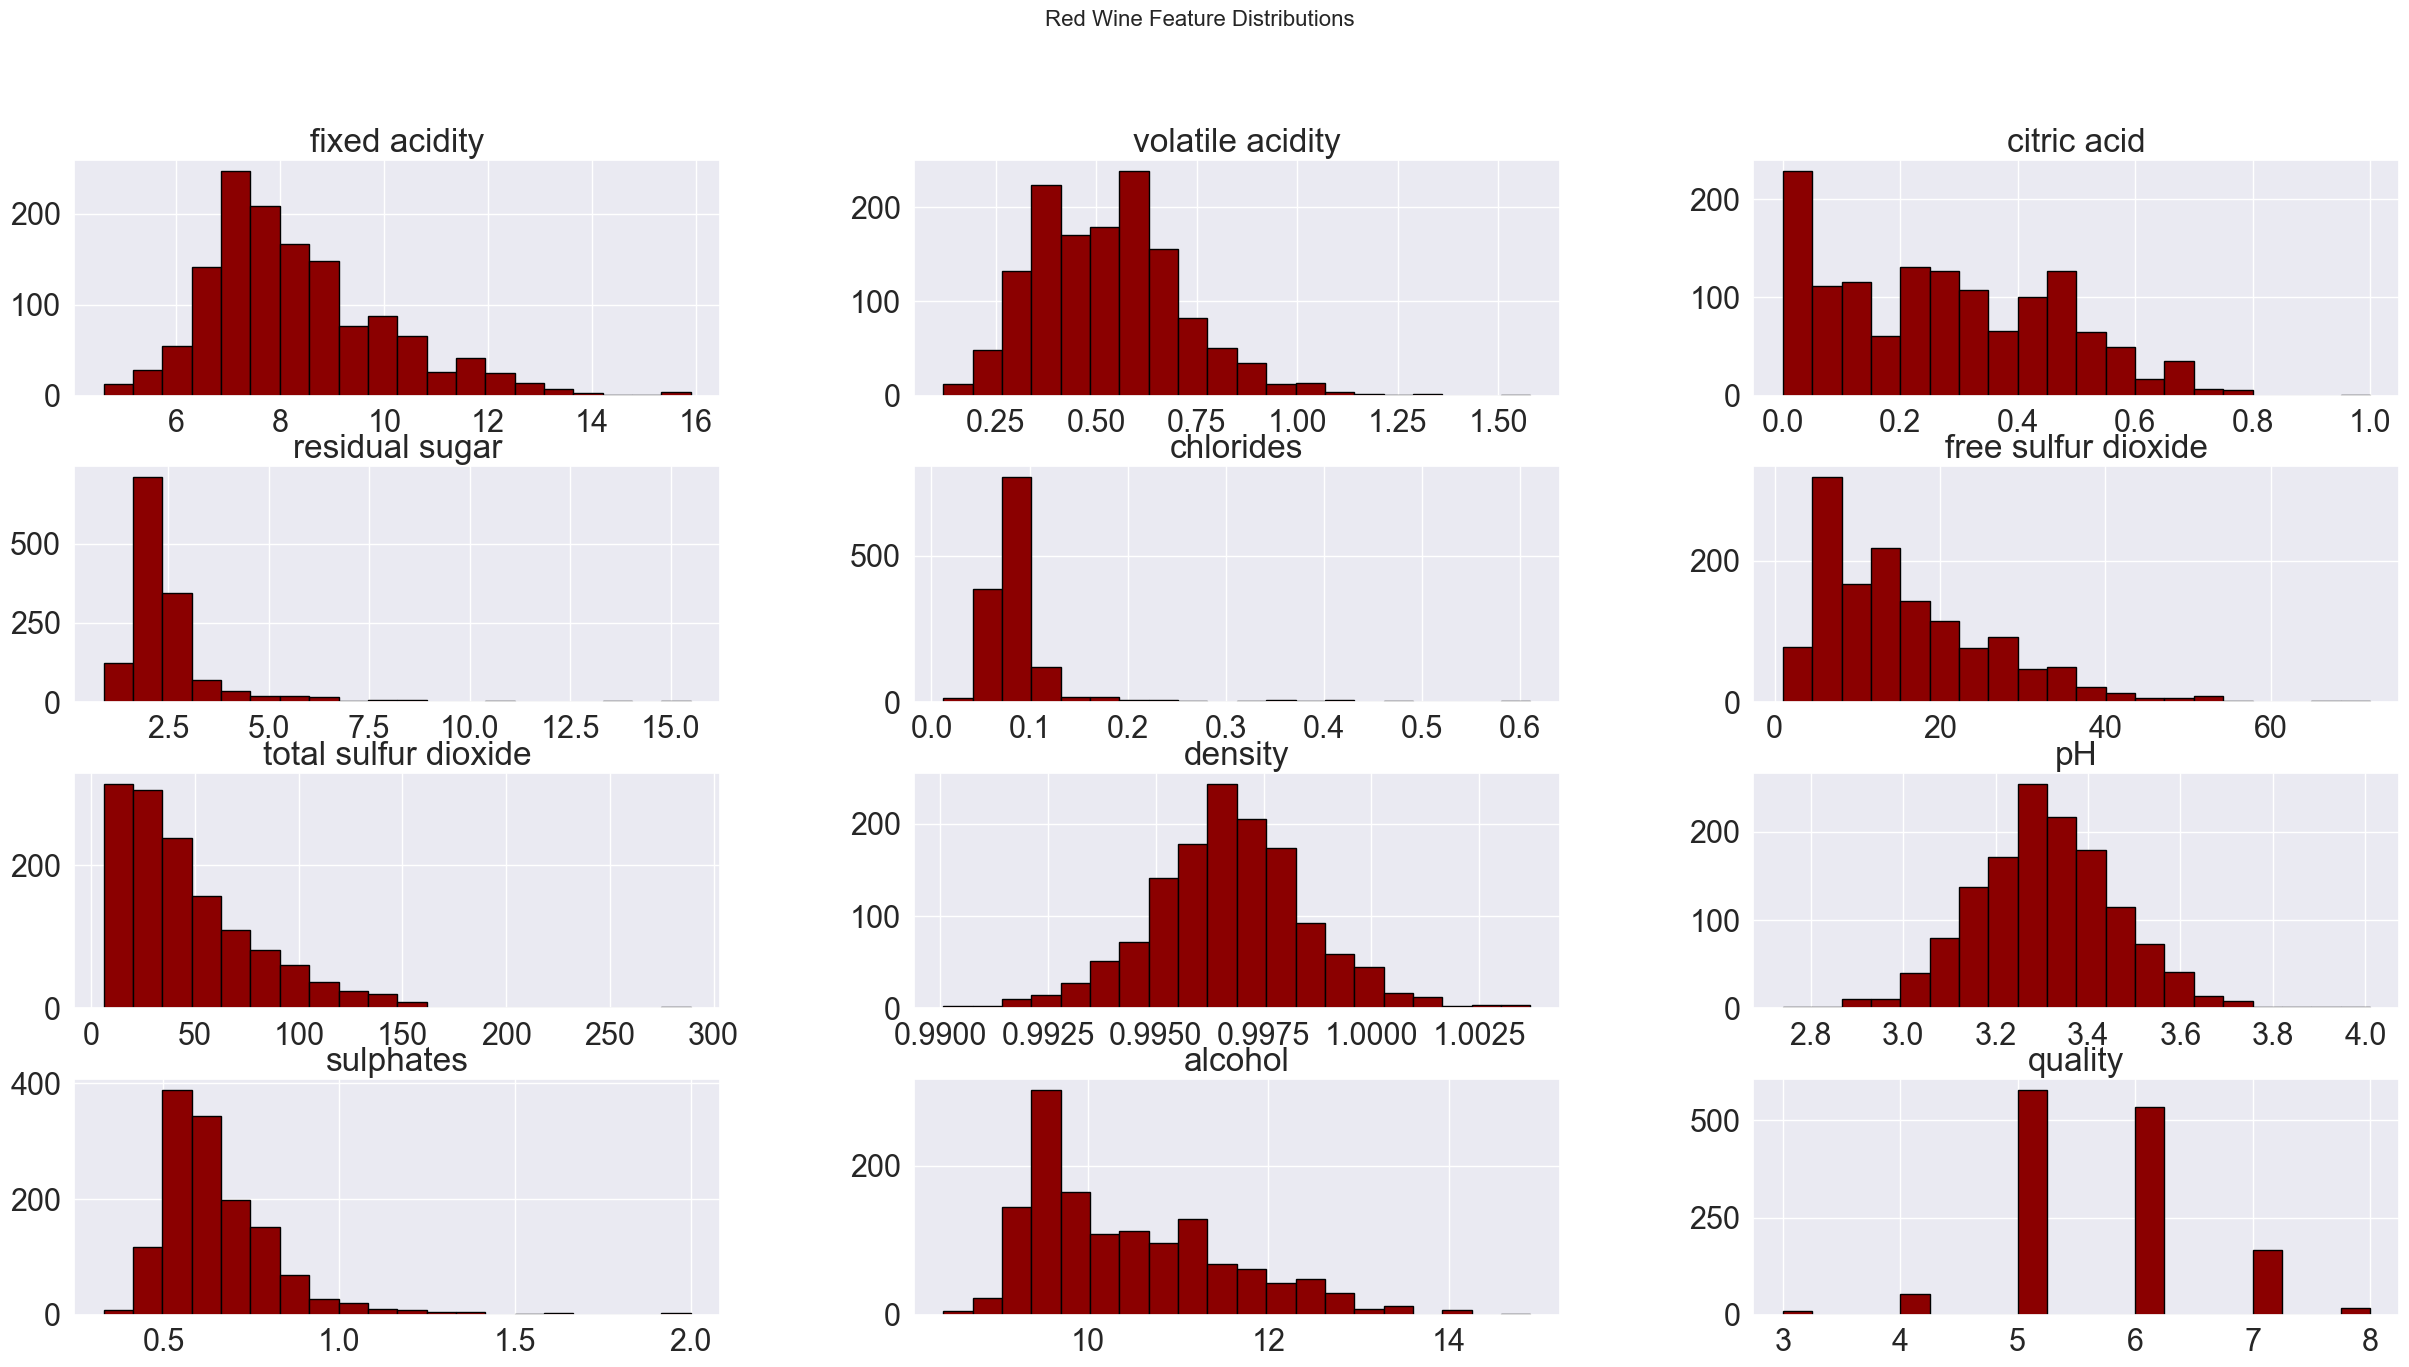

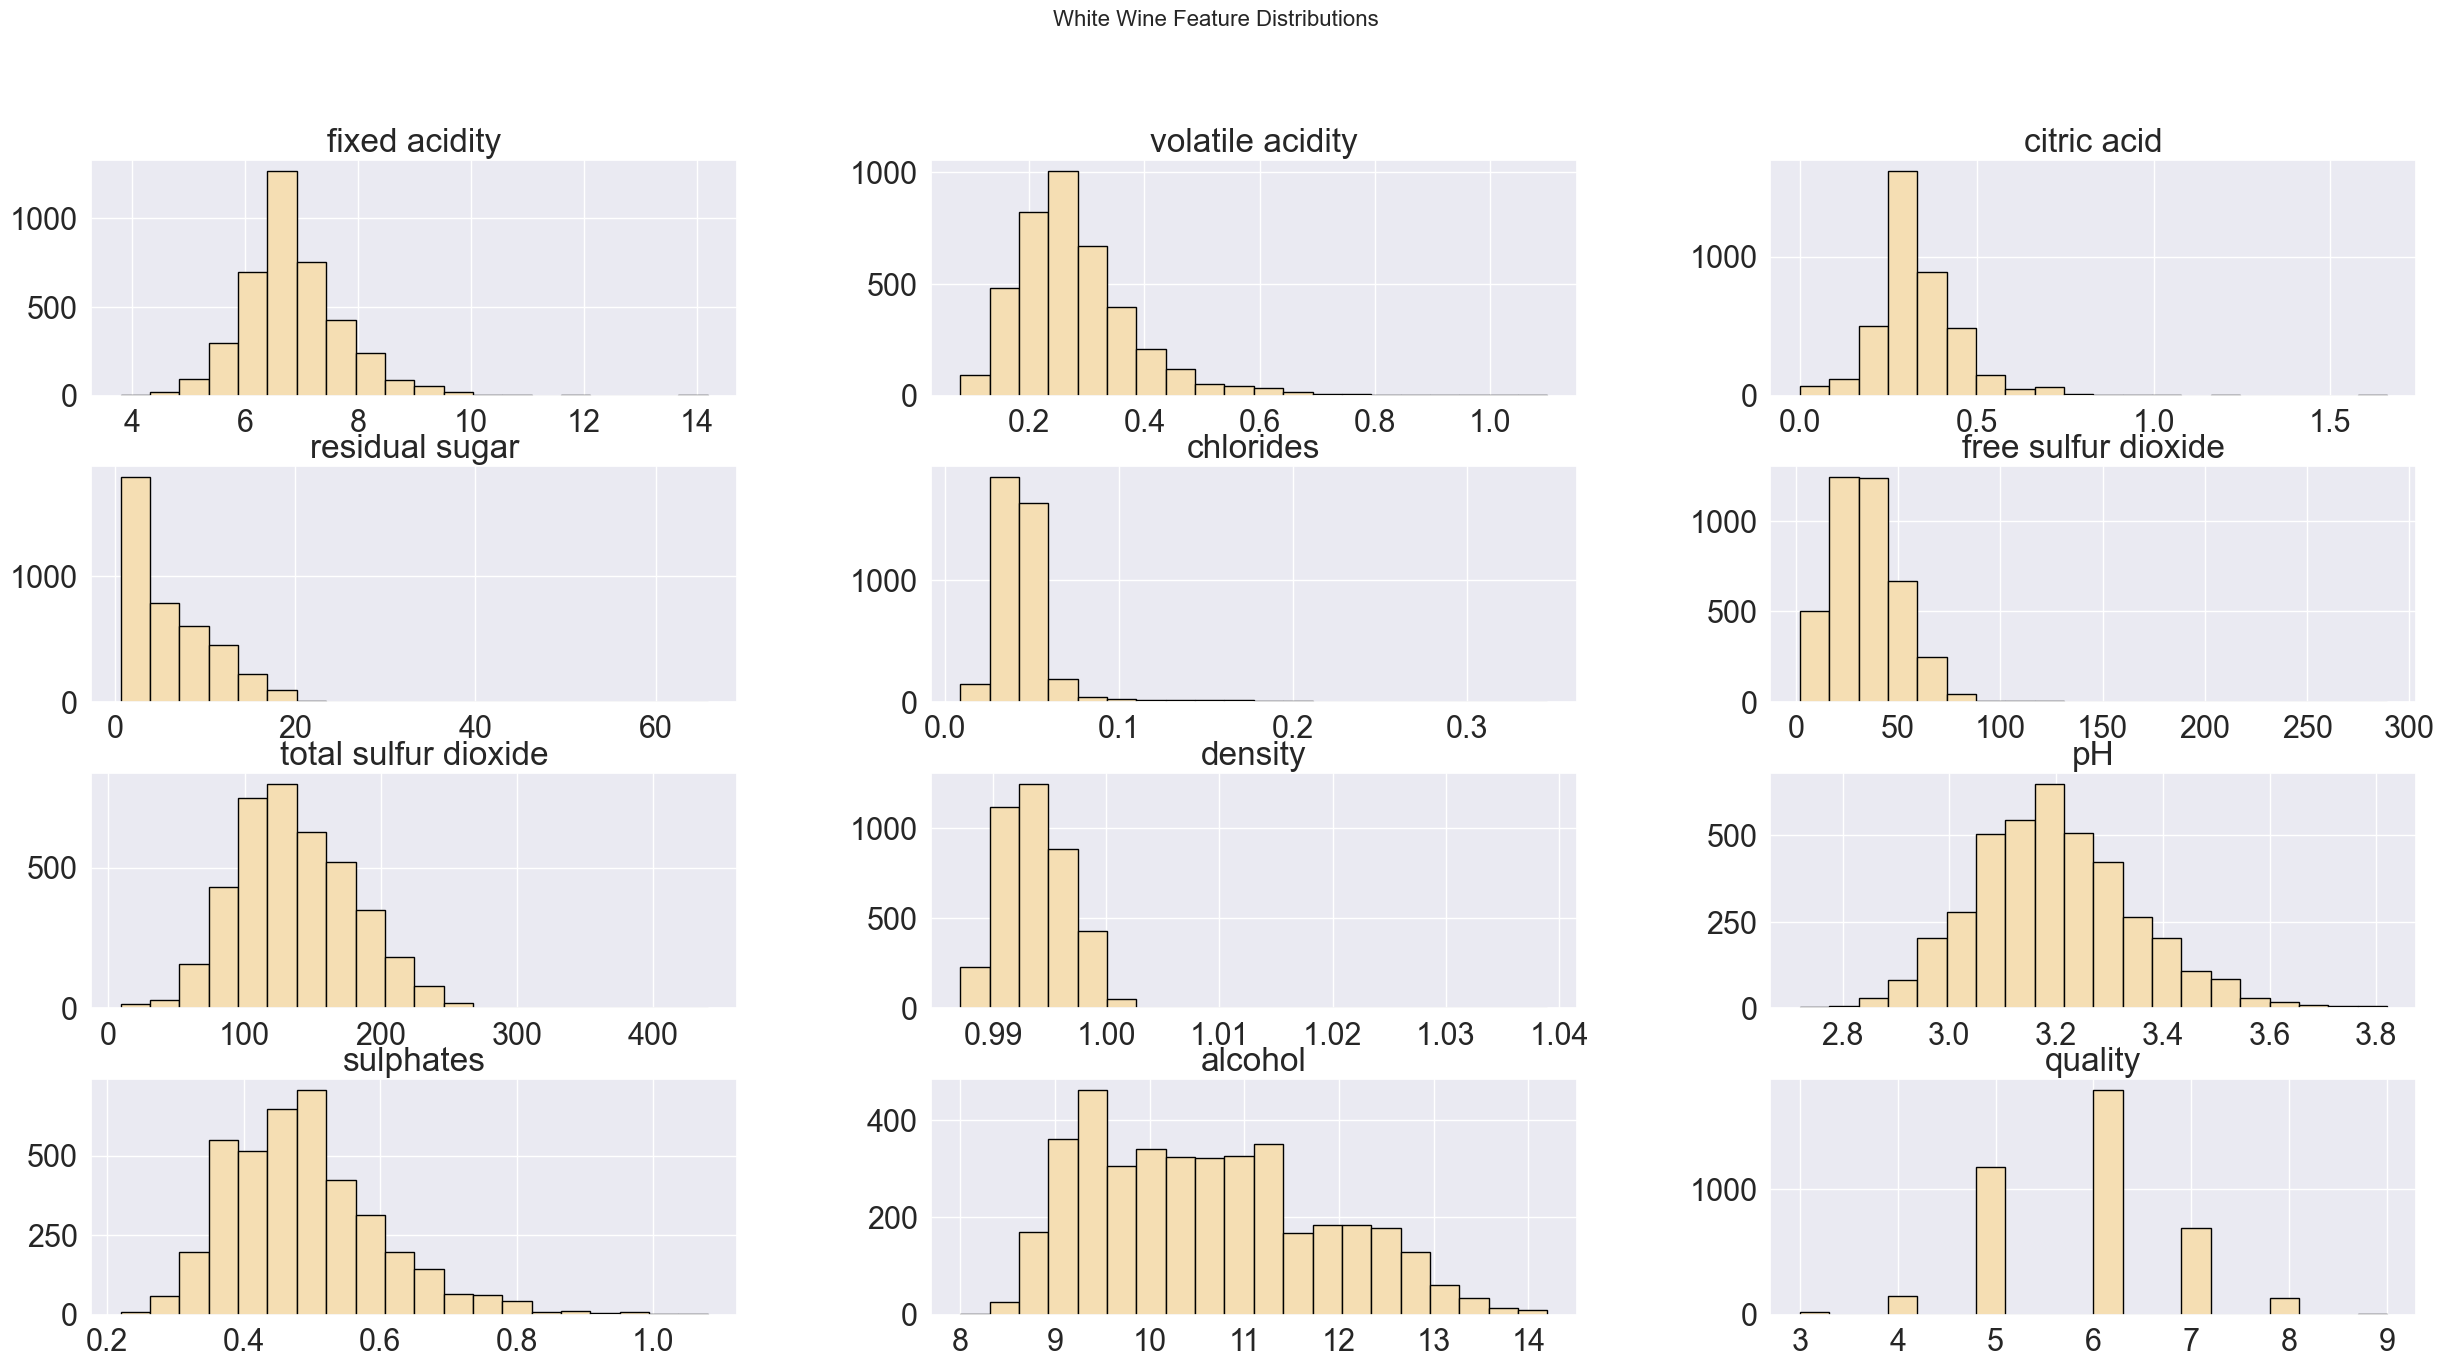

In [297]:
red_wine.hist(figsize=(30, 15), bins=20, color='#8B0000', edgecolor='black')
plt.suptitle("Red Wine Feature Distributions", fontsize=16)
plt.show()

white_wine.hist(figsize=(30, 15), bins=20, color='#F5DEB3', edgecolor='black')
plt.suptitle("White Wine Feature Distributions", fontsize=16)
plt.show()

# Explorartory Data Analysis (EDA)

## Feature Understanding

- Visualize the distribution of numeric features in the combined red and white wine datasets using histograms, KDE plots, and boxplots to compare the distributions by wine type.

Visualizing these features allows us to better understand how the characteristics of red and white wines differ and identify any potential patterns, trends, or outliers that may inform further analysis.

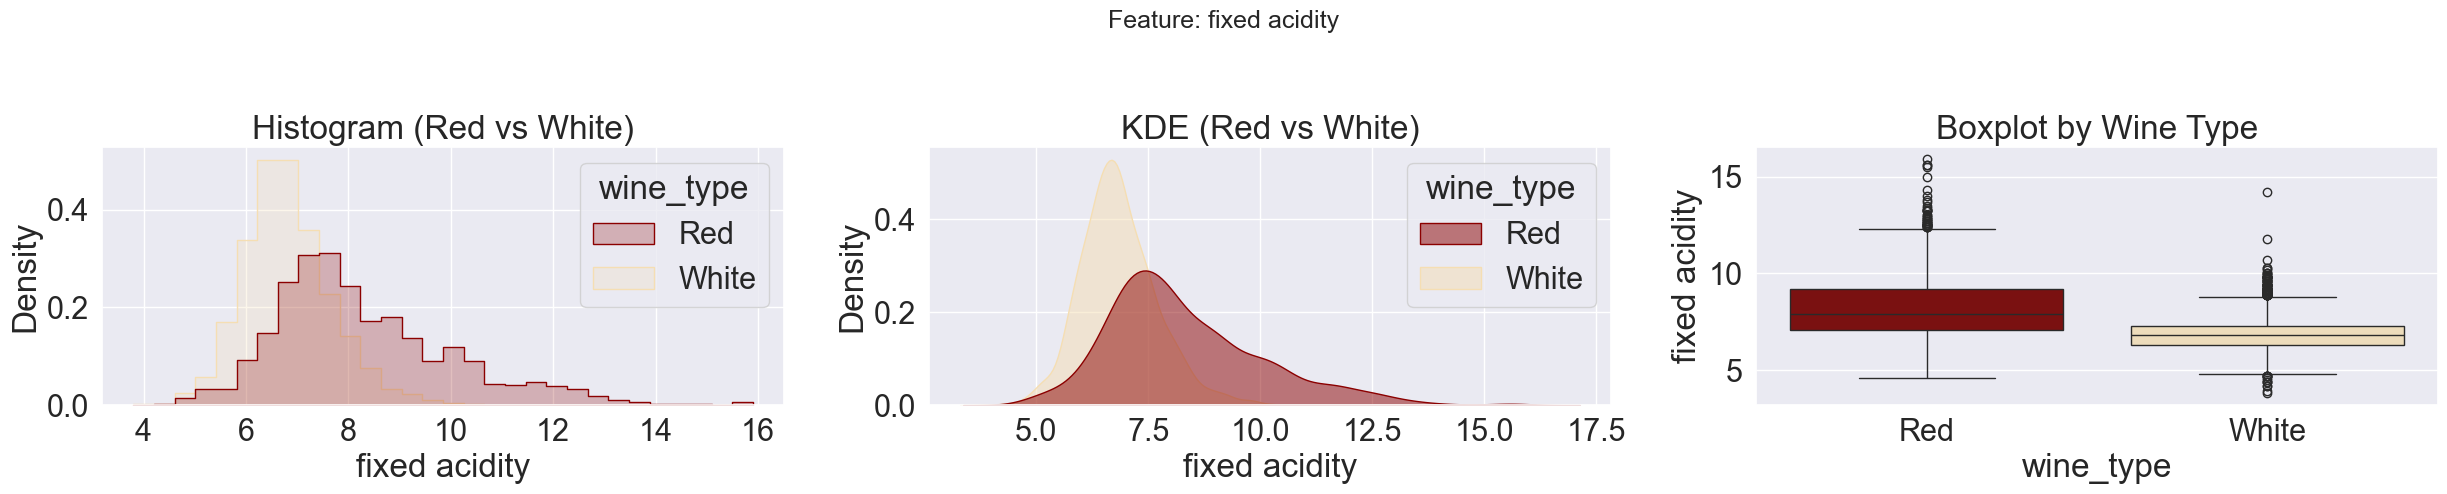

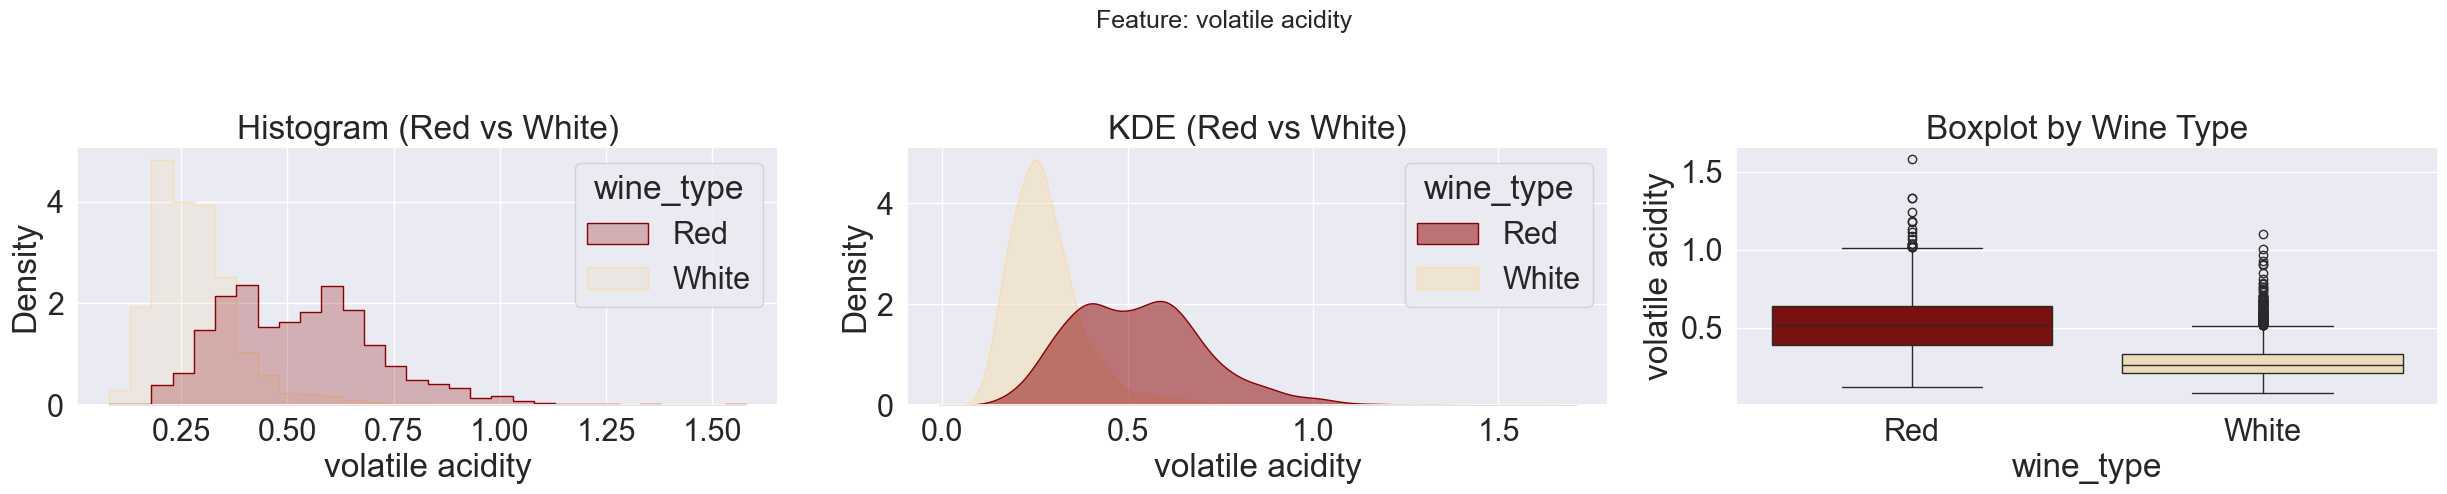

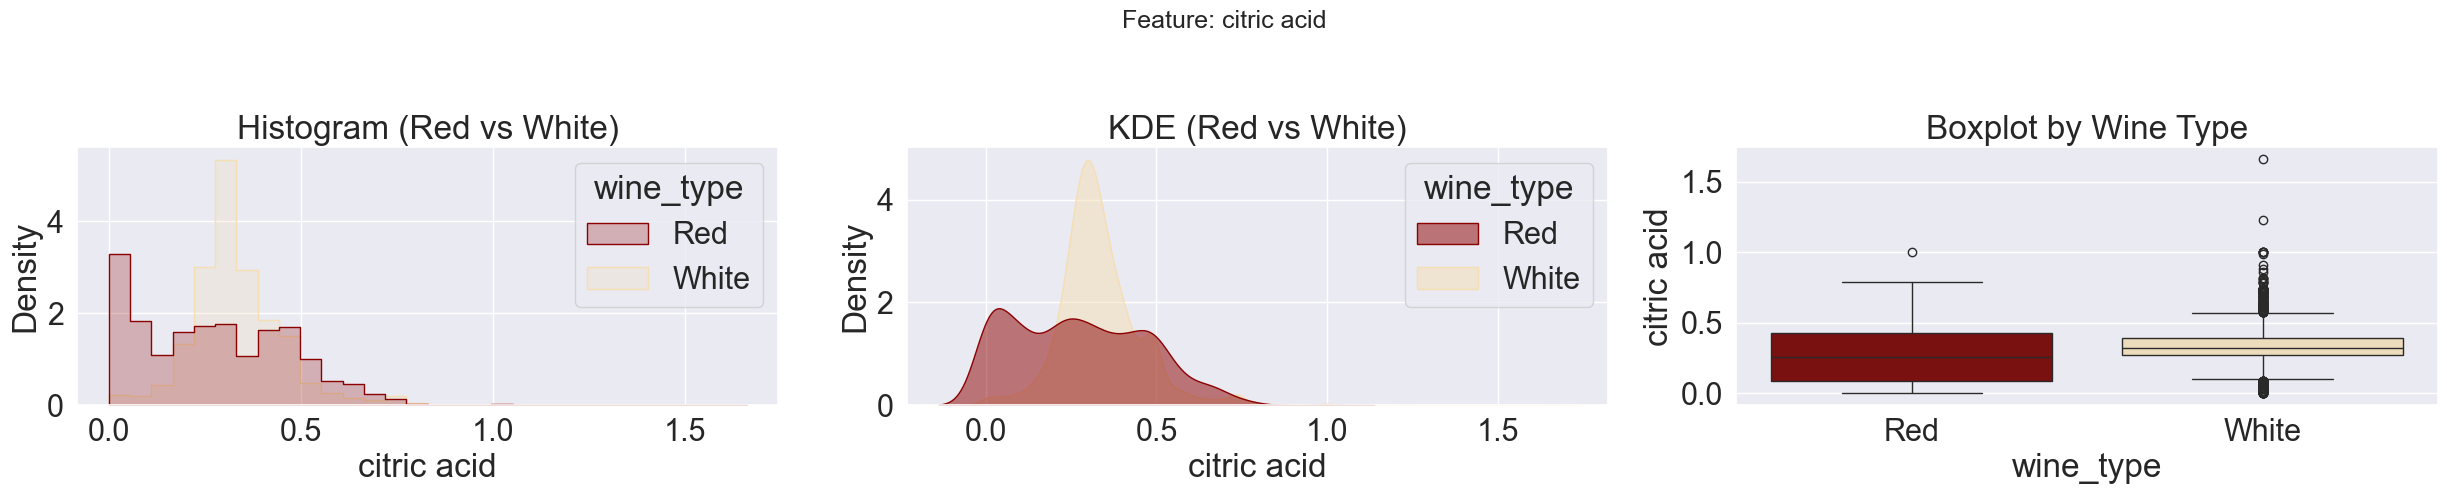

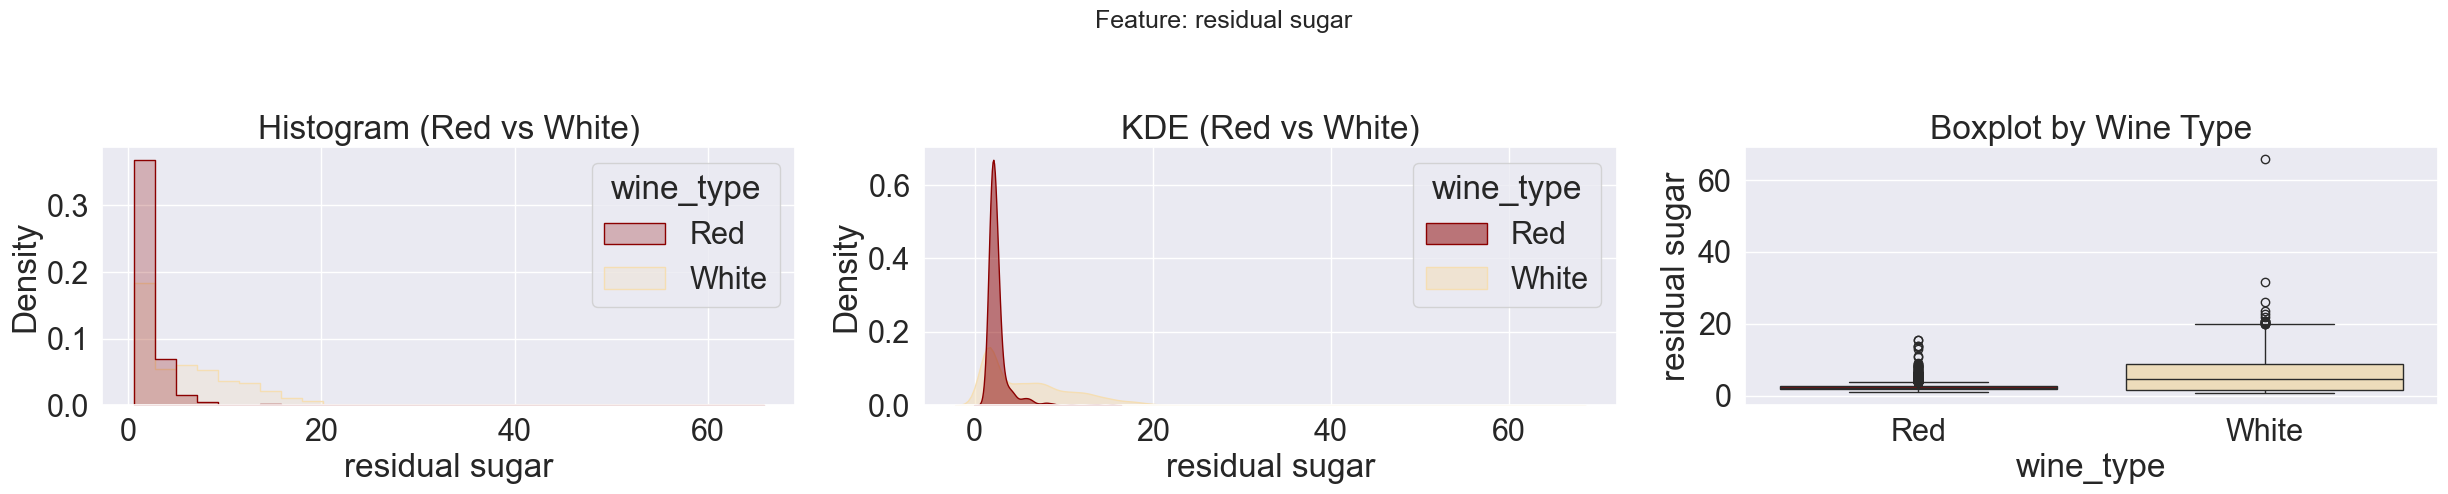

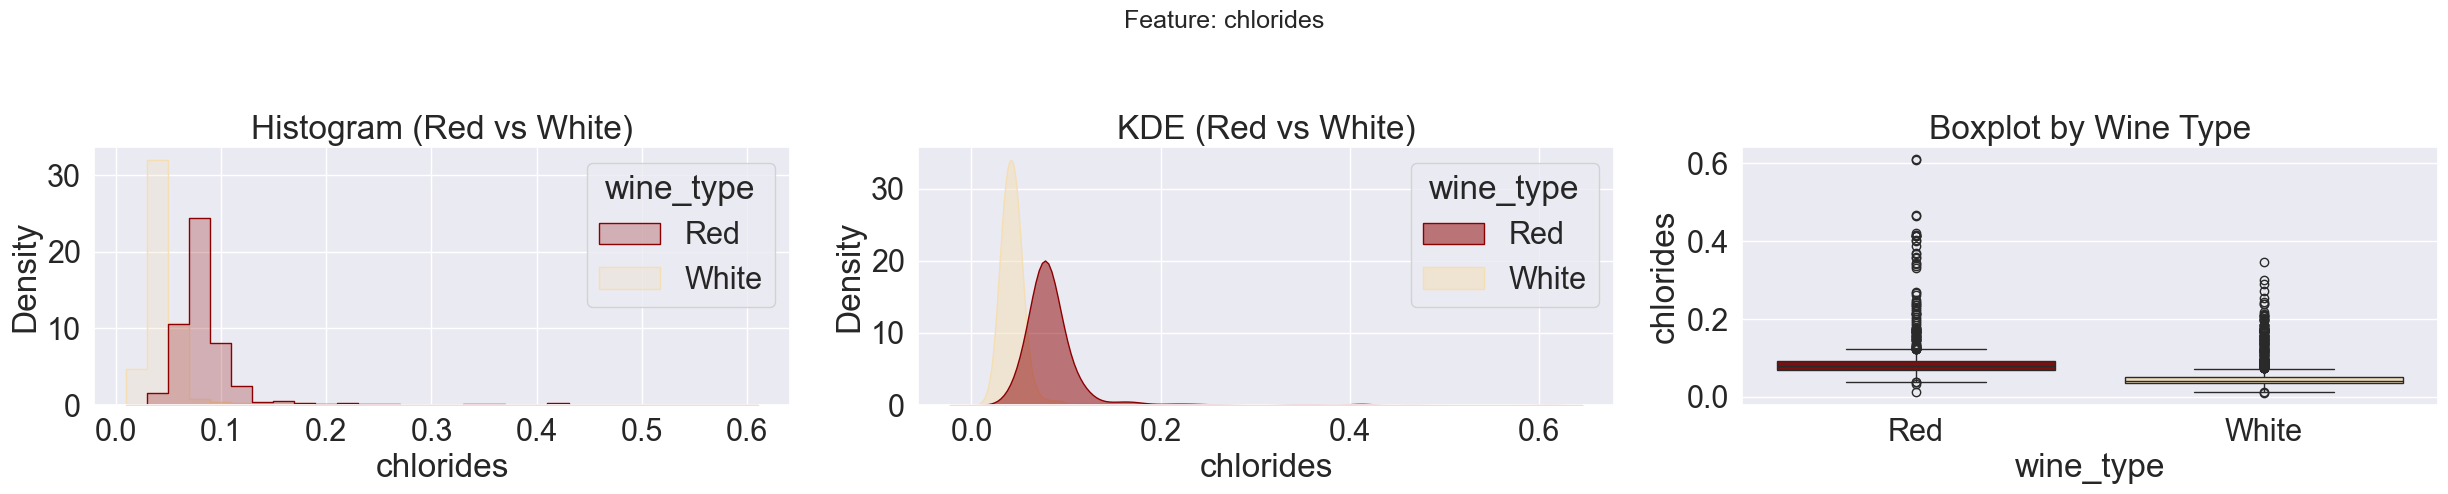

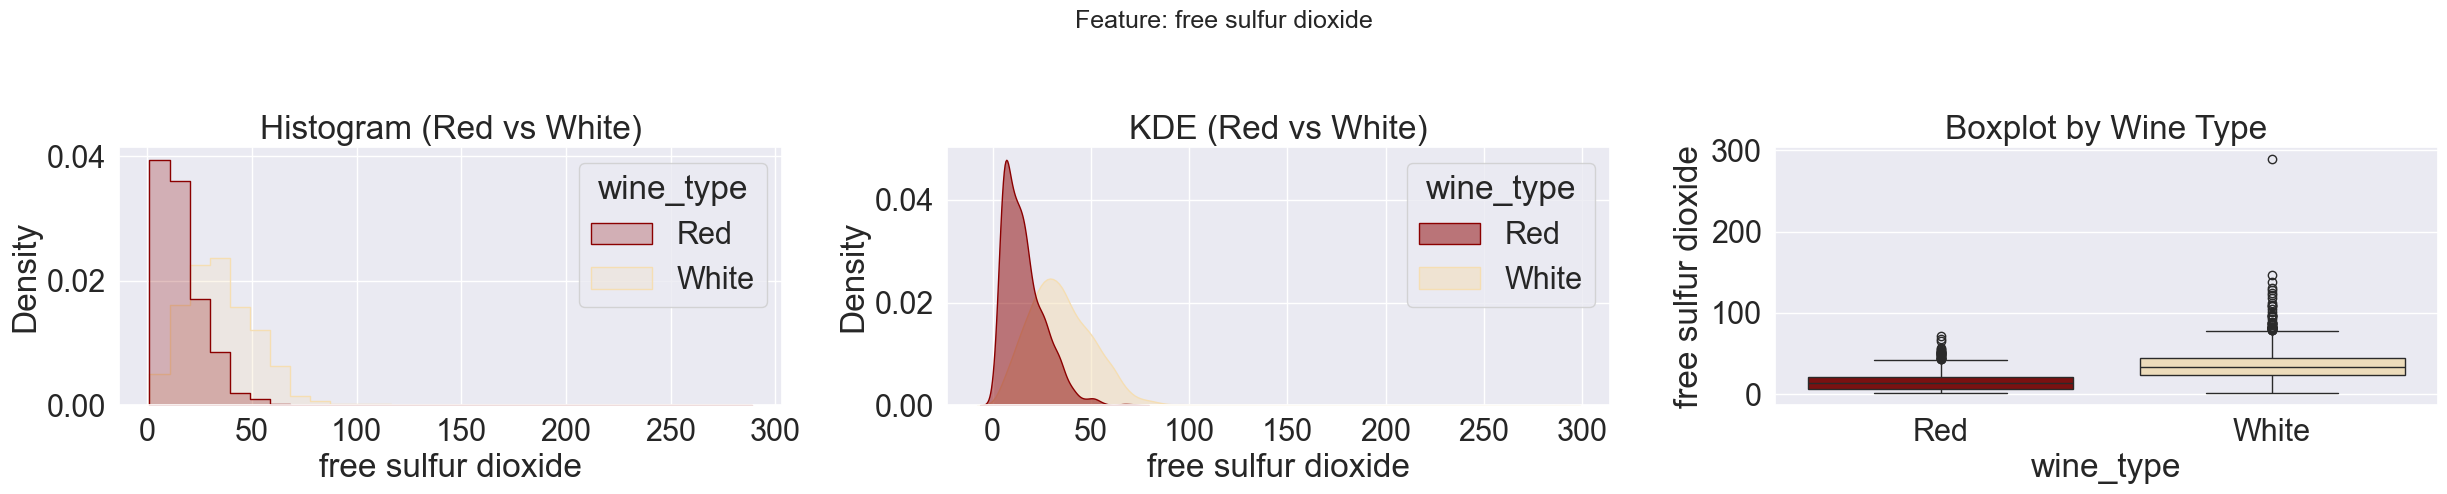

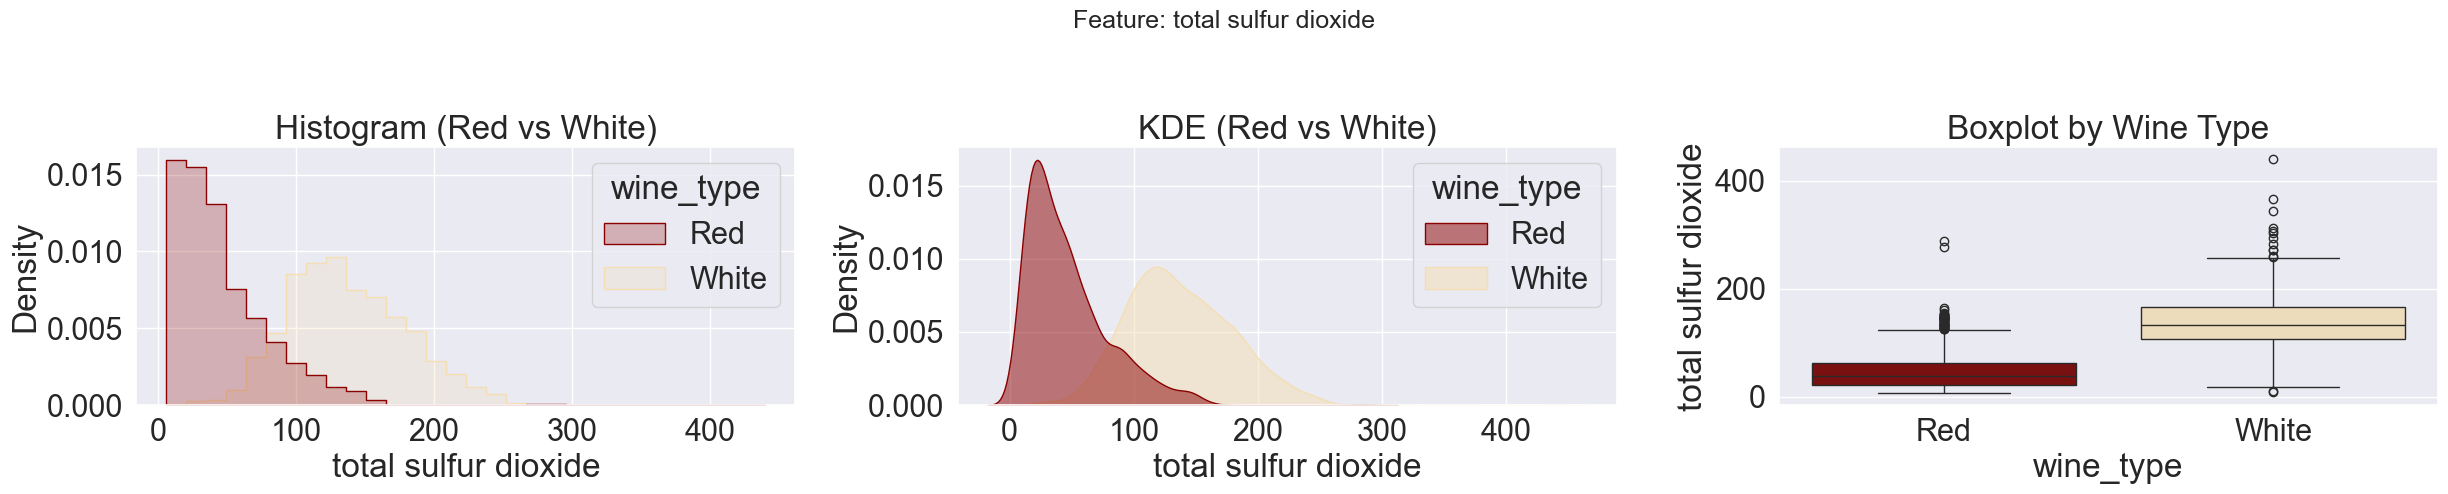

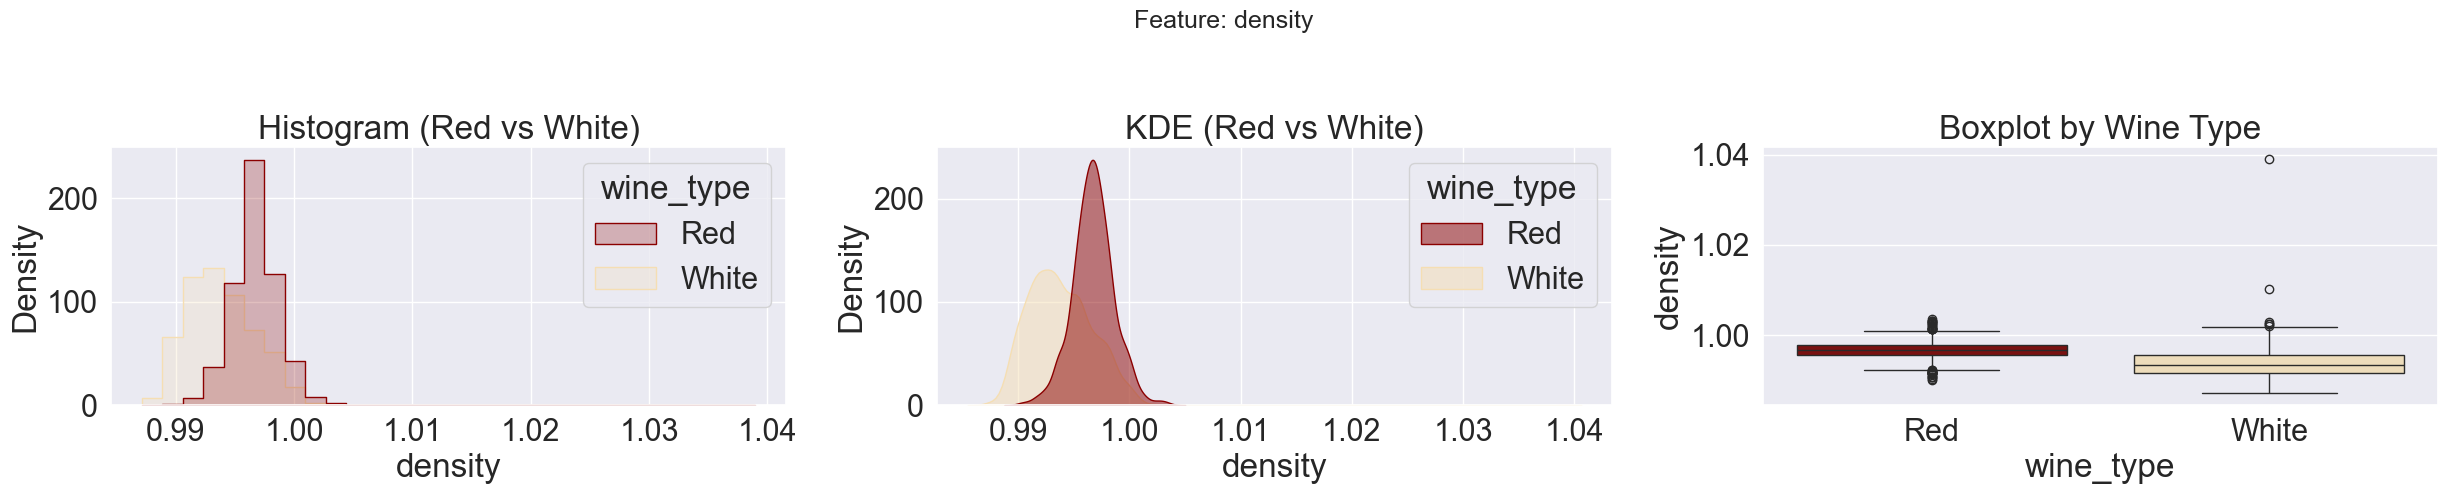

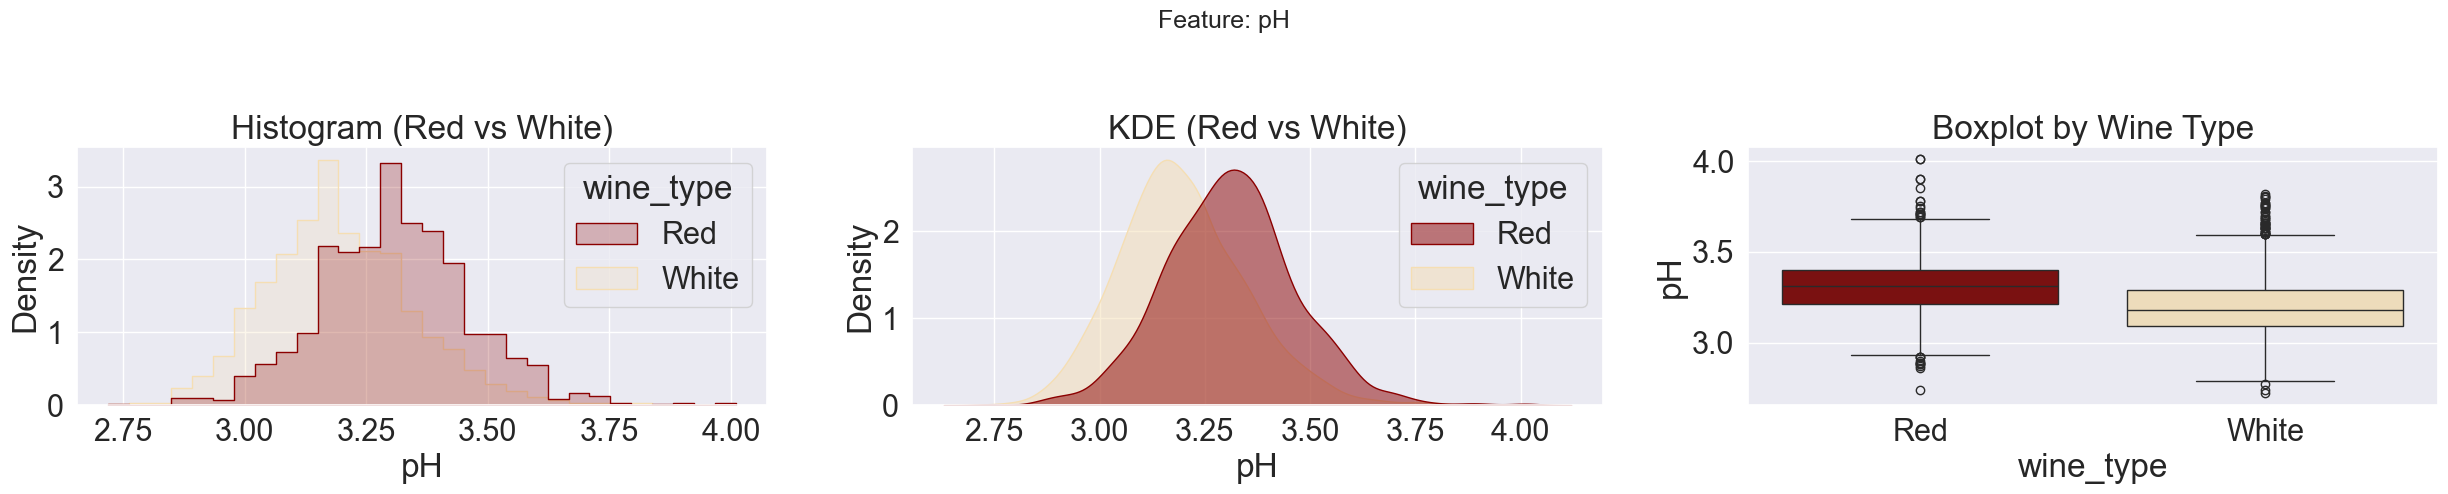

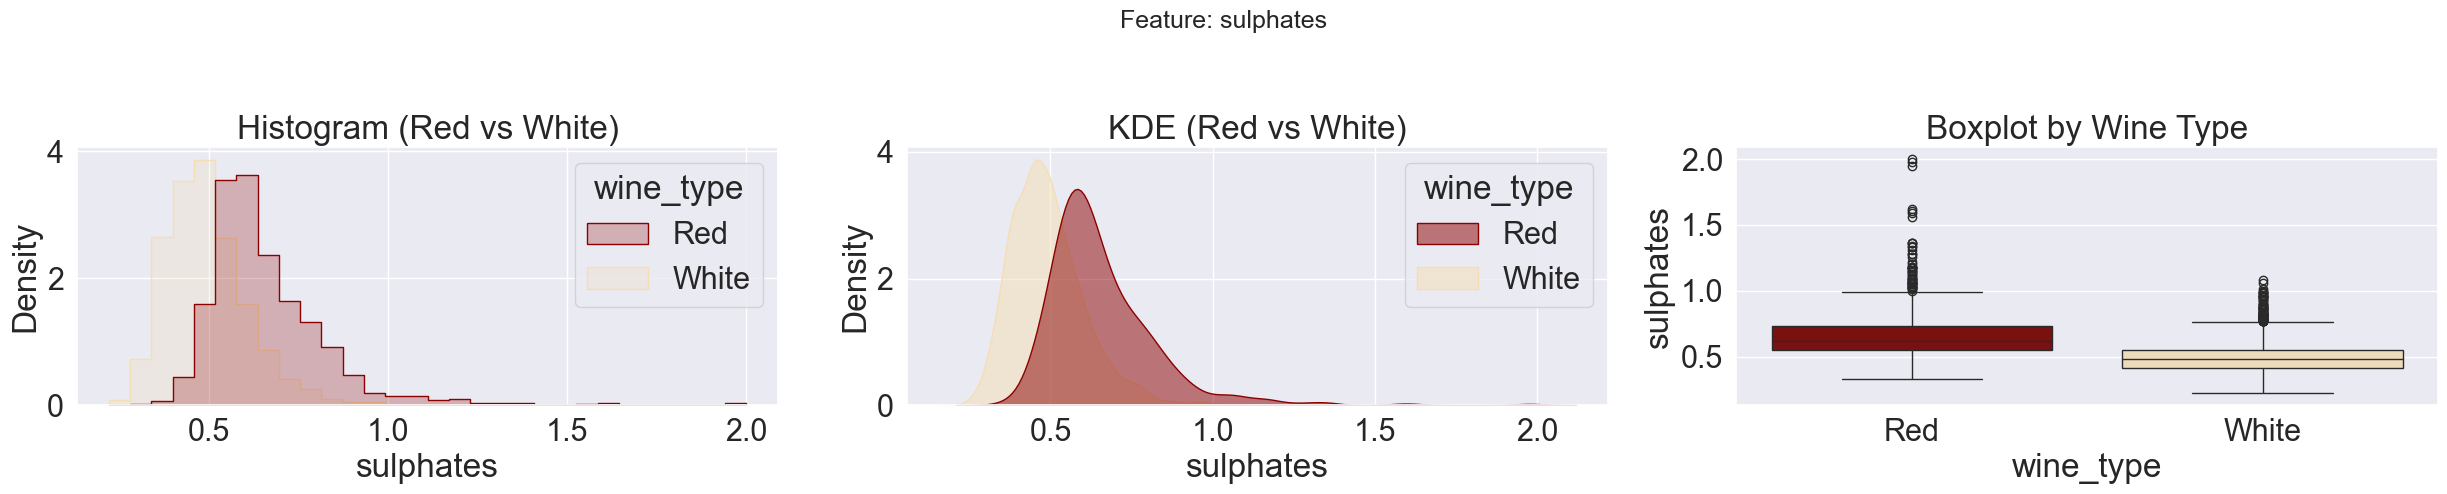

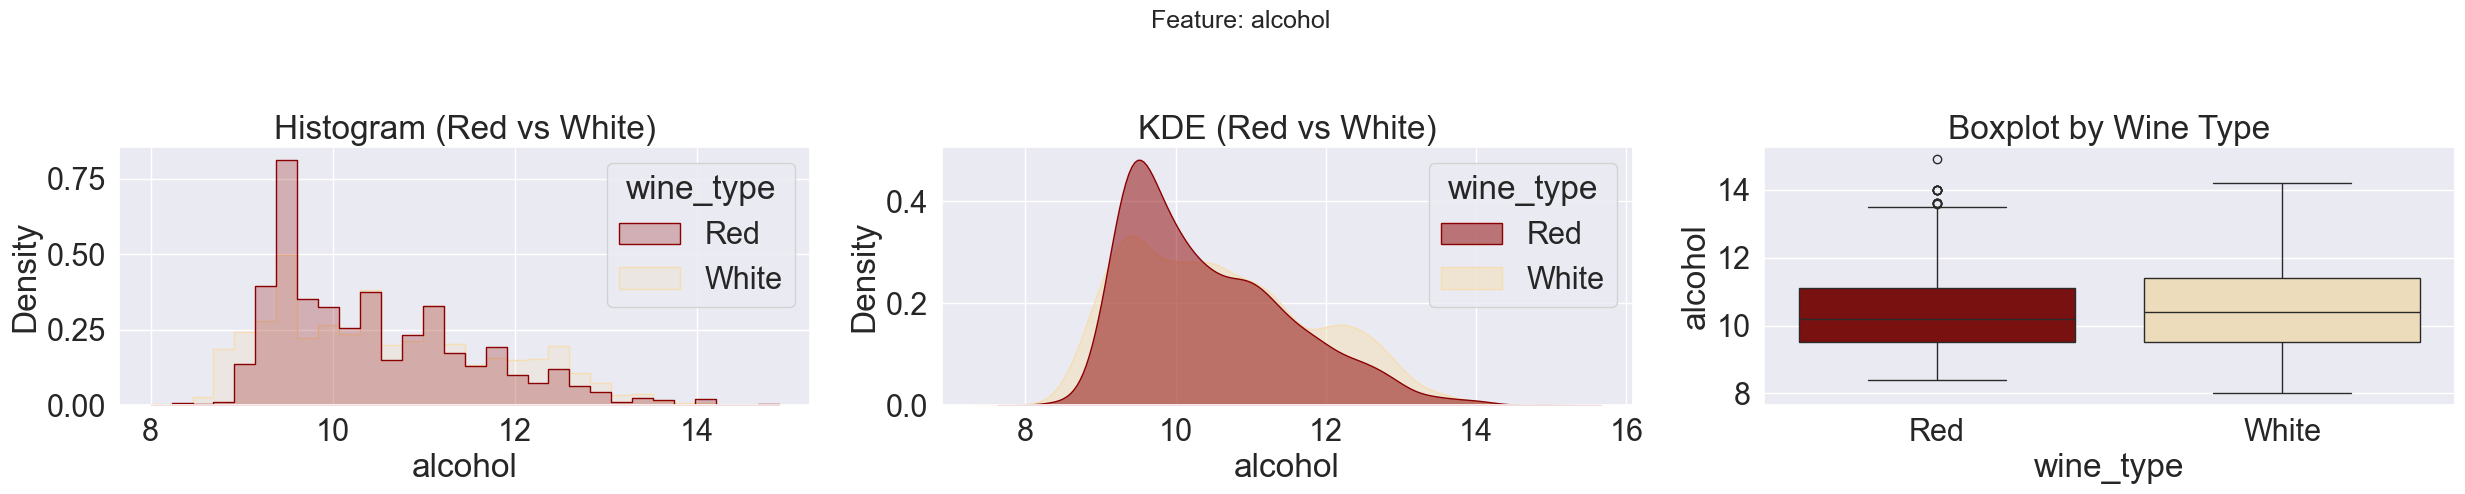

In [298]:
df_red = red_wine.copy()
df_white = white_wine.copy()

df_red['wine_type'] = 'Red'
df_white['wine_type'] = 'White'

# Combine datasets
combined_wine = pd.concat([df_red, df_white], axis=0)

numeric_features = combined_wine.select_dtypes(include=['float64', 'int64']).drop(columns=['quality']).columns

colors = {'Red': '#8B0000', 'White': '#F5DEB3'}

for feature in numeric_features:
    fig, axes = plt.subplots(1, 3, figsize=(25, 5))
    fig.suptitle(f"Feature: {feature}", fontsize=18, y=1.02)

    # Histogram
    seaborn.histplot(
        data=combined_wine, x=feature, hue='wine_type', bins=30, ax=axes[0],
        palette=colors, element="step", stat="density", common_norm=False
    )
    axes[0].set_title("Histogram (Red vs White)")

    # KDE Plot
    seaborn.kdeplot(
        data=combined_wine, x=feature, hue='wine_type', ax=axes[1],
        fill=True, common_norm=False, palette=colors, alpha=0.5
    )
    axes[1].set_title("KDE (Red vs White)")

    # Boxplot 
    seaborn.boxplot(
        data=combined_wine, x='wine_type', y=feature, hue='wine_type',
        ax=axes[2], palette=colors, legend=False
    )
    axes[2].set_title("Boxplot by Wine Type")

    plt.tight_layout()
    plt.show()

# Skewness Check
- Calculate and categorizes the skewness of each numeric feature in the combined red and white wine datasets, then visualizes the distributions of features with heavy skewness.
- Apply the Box-Cox transformation to heavily skewed numeric features in the dataset, then rechecks the skewness to assess the effectiveness of the transformation.

Addressing skewness ensures the data is more normally distributed, which is important for improving the performance of certain machine learning models that assume normality in the data.

Skewness Summary:
                   Column  Skewness      Skew Category
0              chlorides      5.34     Heavily Skewed
1              sulphates      1.81     Heavily Skewed
2         residual sugar      1.71     Heavily Skewed
3          fixed acidity      1.65     Heavily Skewed
4       volatile acidity      1.50     Heavily Skewed
5    free sulfur dioxide      1.36     Heavily Skewed
6                density      0.67  Moderately Skewed
7                alcohol      0.55  Moderately Skewed
8            citric acid      0.48       Light Skewed
9                     pH      0.39       Light Skewed
10               quality      0.15       Light Skewed
11  total sulfur dioxide      0.06       Light Skewed


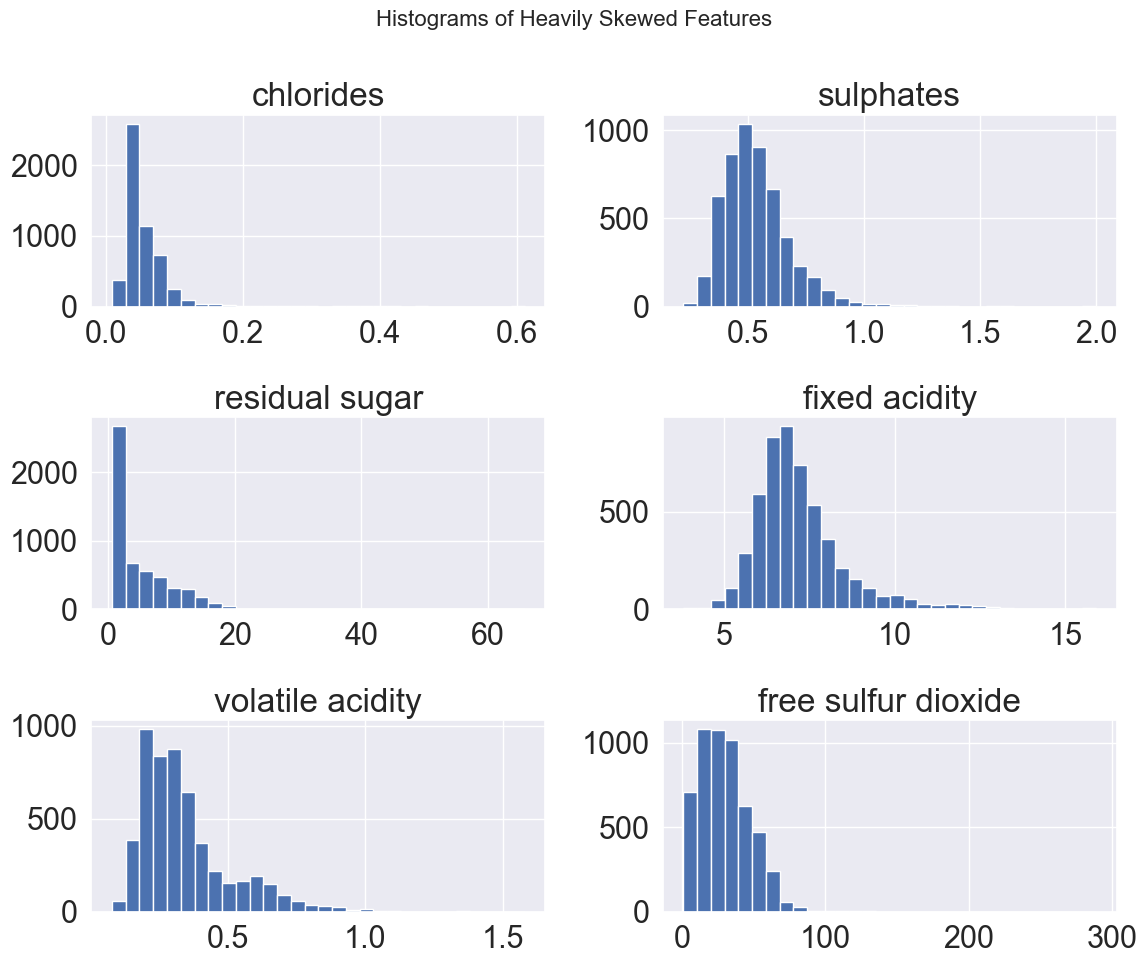

In [299]:
# Function to compute skewness and categorize
def skewness_check(data):
    skew_value = list(st.skew(data, nan_policy='omit'))
    skew_category = []

    for skew in skew_value:
        if -0.5 <= skew <= 0.5:
            skew_category.append("Light Skewed")
        elif -1 <= skew < -0.5 or 0.5 < skew <= 1:
            skew_category.append("Moderately Skewed")
        else:
            skew_category.append("Heavily Skewed")

    skew_df = pd.DataFrame({
        'Column': data.columns,
        'Skewness': skew_value,
        'Skew Category': skew_category
    })
    
    return skew_df.sort_values(by='Skewness', key=abs, ascending=False).reset_index(drop=True)

# Skewness analysis for combined_wine numeric features
numeric_cols = combined_wine.select_dtypes(include=[np.number])
skew_df = skewness_check(numeric_cols)

# Display skewness table
print("Skewness Summary:\n", skew_df)

# Filter and plot histograms for heavily skewed features only
heavily_skewed = skew_df[skew_df['Skew Category'] == "Heavily Skewed"]['Column']
combined_wine[heavily_skewed].hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Heavily Skewed Features", fontsize=16)
plt.tight_layout()
plt.show()

### Interpretation of the Skewness Summary:
- Heavily Skewed Variables: The variables chlorides, sulphates, residual sugar, fixed acidity, volatile acidity, and free sulfur dioxide exhibit significant skewness, with skewness values greater than 1. This suggests that these features have uneven distributions, where extreme values (outliers) are more frequent or are influencing the mean significantly. They may require transformations (like Box-Cox) to make their distributions more normal.
- Moderately Skewed Variables: Density and alcohol show moderate skewness. While not as extreme as the heavily skewed variables, they still show some level of asymmetry in their distributions, and transformations could be considered if needed for modeling.
- Lightly Skewed Variables: Citric acid, pH, quality, and total sulfur dioxide are relatively symmetric, with skewness values closer to zero. These features are likely to have more balanced distributions, making them suitable for modeling without requiring major transformations.

In [300]:
def boxcox_transform_skewed(df, skewness_threshold=0.5):
    transformed_df = df.copy()
    lambdas = {}
    for col in df.columns:
        skew = df[col].skew()
        if abs(skew) > skewness_threshold and (df[col] > 0).all():
            transformed_df[col], lam = boxcox(df[col])
            lambdas[col] = lam
            print(f"Applying Box-Cox on '{col}' with skewness {skew:.2f}")
        else:
            print(f"Skipping '{col}' (skewness: {skew:.2f})")
    return transformed_df, lambdas

numeric_cols = combined_wine.select_dtypes(include=[np.number]).columns
predictors = combined_wine[numeric_cols].drop(columns='quality')
transformed_predictors, lambda_dict = boxcox_transform_skewed(predictors)

skewness_check(transformed_predictors)

Applying Box-Cox on 'fixed acidity' with skewness 1.65
Applying Box-Cox on 'volatile acidity' with skewness 1.50
Skipping 'citric acid' (skewness: 0.48)
Applying Box-Cox on 'residual sugar' with skewness 1.71
Applying Box-Cox on 'chlorides' with skewness 5.34
Applying Box-Cox on 'free sulfur dioxide' with skewness 1.36
Skipping 'total sulfur dioxide' (skewness: 0.06)
Applying Box-Cox on 'density' with skewness 0.67
Skipping 'pH' (skewness: 0.39)
Applying Box-Cox on 'sulphates' with skewness 1.81
Applying Box-Cox on 'alcohol' with skewness 0.55


Column  Skewness Skew Category
0            citric acid      0.48  Light Skewed
1                     pH      0.39  Light Skewed
2         residual sugar      0.09  Light Skewed
3   total sulfur dioxide      0.06  Light Skewed
4                alcohol      0.06  Light Skewed
5              chlorides     -0.06  Light Skewed
6          fixed acidity     -0.05  Light Skewed
7    free sulfur dioxide     -0.04  Light Skewed
8                density     -0.02  Light Skewed
9       volatile acidity      0.01  Light Skewed
10             sulphates     -0.01  Light Skewed

###  Interpretation of the outcome after applying Box-Cox transformations:
- Features with Significant Skewness: Several features with high skewness values, such as fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, density, and sulphates, were successfully transformed using the Box-Cox method. The Box-Cox transformation aims to stabilize variance and make the data distribution more normal. After transformation, these features have drastically reduced skewness, resulting in values closer to zero, indicating a much more symmetrical distribution.
- Lightly Skewed Features: Features like citric acid, pH, total sulfur dioxide, alcohol, and quality were already lightly skewed or showed minimal skewness. These features did not require transformation as their distributions were already relatively balanced.
- Effectiveness of Box-Cox Transformation: The transformed features now exhibit much lower skewness, which should help improve the performance of machine learning models that assume normality in the input data. Features that were previously highly skewed now fall into the Light Skewed category, making the data more suitable for analysis.

# Checking Outliers
- Generate boxplots for the original wine predictors (before applying Box-Cox) to visually identify any potential outliers in the data.
- Apply the Box-Cox transformation, it generates boxplots again to assess the impact of the transformation on outliers and the overall distribution.

Visualizing outliers helps to understand extreme values in the dataset, which can affect the performance of certain models. Box-Cox transformations may reduce the influence of outliers by normalizing skewed data.

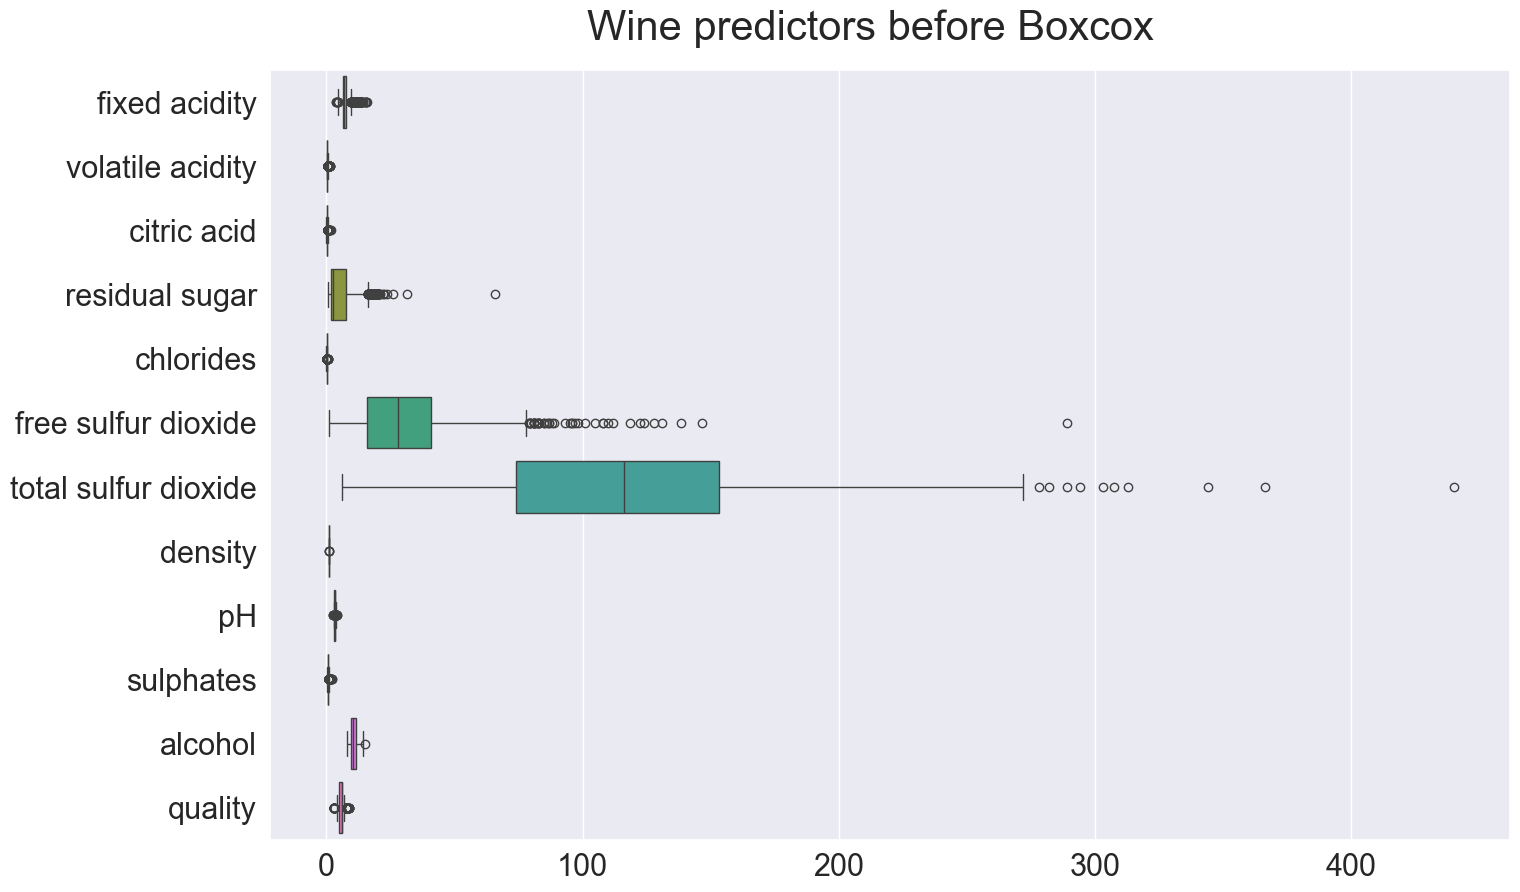

In [301]:
def box_plot(data, height = 10, width = 16, title = "Boxplot"):
    plt.figure(figsize=(width, height))
    plt.suptitle(title, y = 0.94, fontsize = 30)
    seaborn.set(font_scale = 2)
    seaborn.boxplot(data = data, orient = "h")

box_plot(data = combined_wine, title = "Wine predictors before Boxcox")

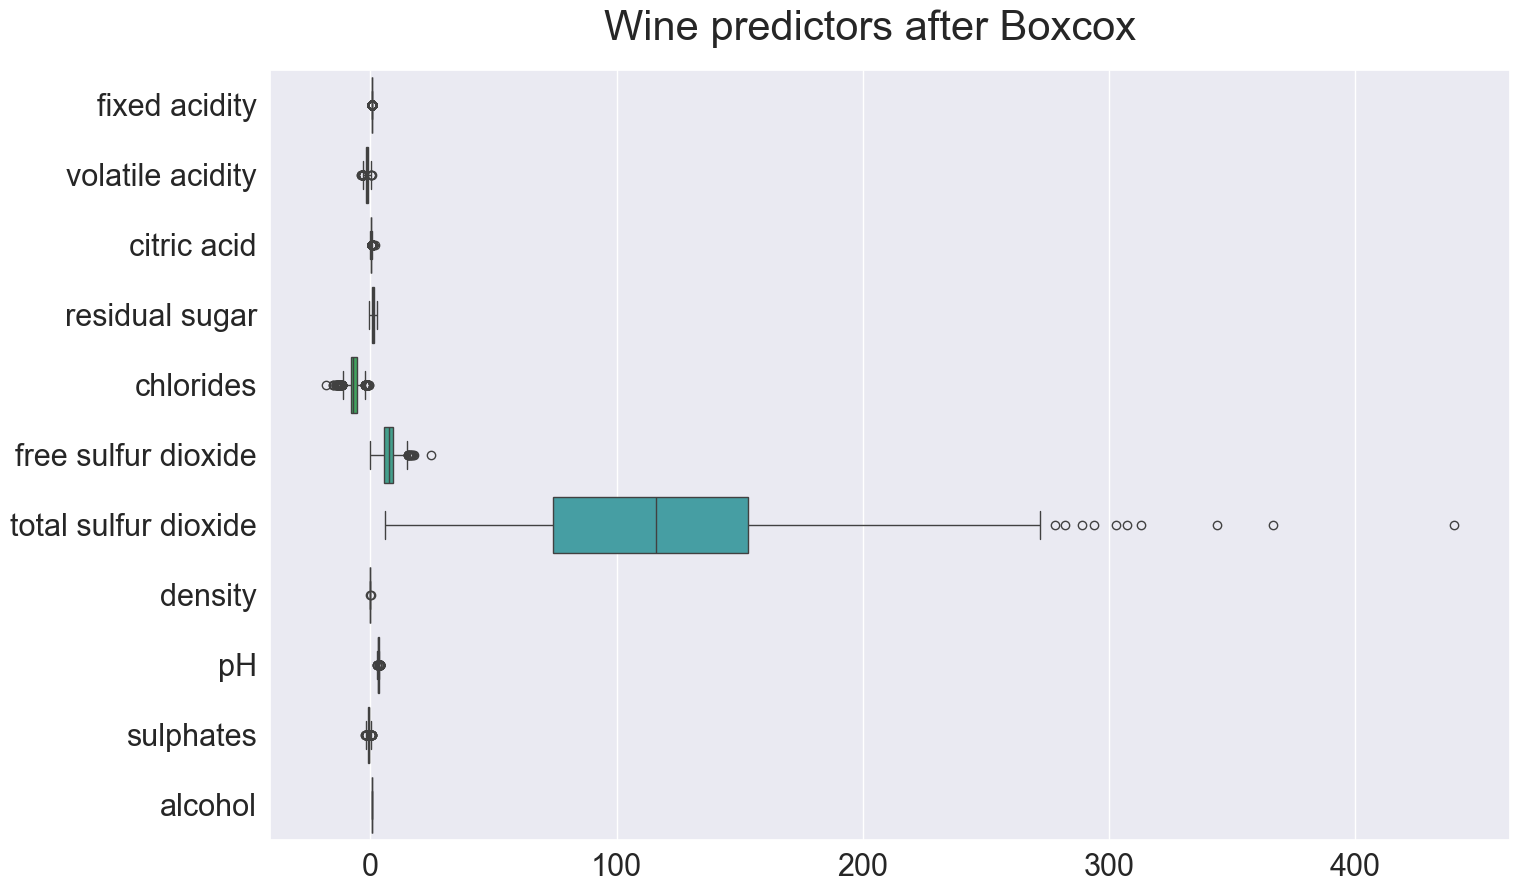

In [302]:
box_plot(data = transformed_predictors, title = "Wine predictors after Boxcox")

## Task 1 
### Part A
Describe the distribution of wine quality across all samples, separately for red and white, and compare the quality distributions between reds and whites. Create suitable plots to illustrate.

In [303]:
print("Red Wine Quality: ")
print(red_wine['quality'].value_counts(normalize=True).sort_index())

print("\nWhite Wine Quality: ")
print(white_wine['quality'].value_counts(normalize=True).sort_index())


Red Wine Quality: 
quality
3   0.01
4   0.04
5   0.42
6   0.39
7   0.12
8   0.01
Name: proportion, dtype: float64

White Wine Quality: 
quality
3   0.01
4   0.04
5   0.30
6   0.45
7   0.17
8   0.03
9   0.00
Name: proportion, dtype: float64


### Interpretation
- Red Wine: Most wines are rated 5 (42%) and 6 (39%), indicating a concentration of average quality wines. Very few are rated at the extremes (3, 4, 7, or 8).
- White Wine: Similar to red, most wines are rated 6 (45%) and 5 (30%). Very few are rated at the extremes (3, 4, 7, or 8), with no wines rated 9.

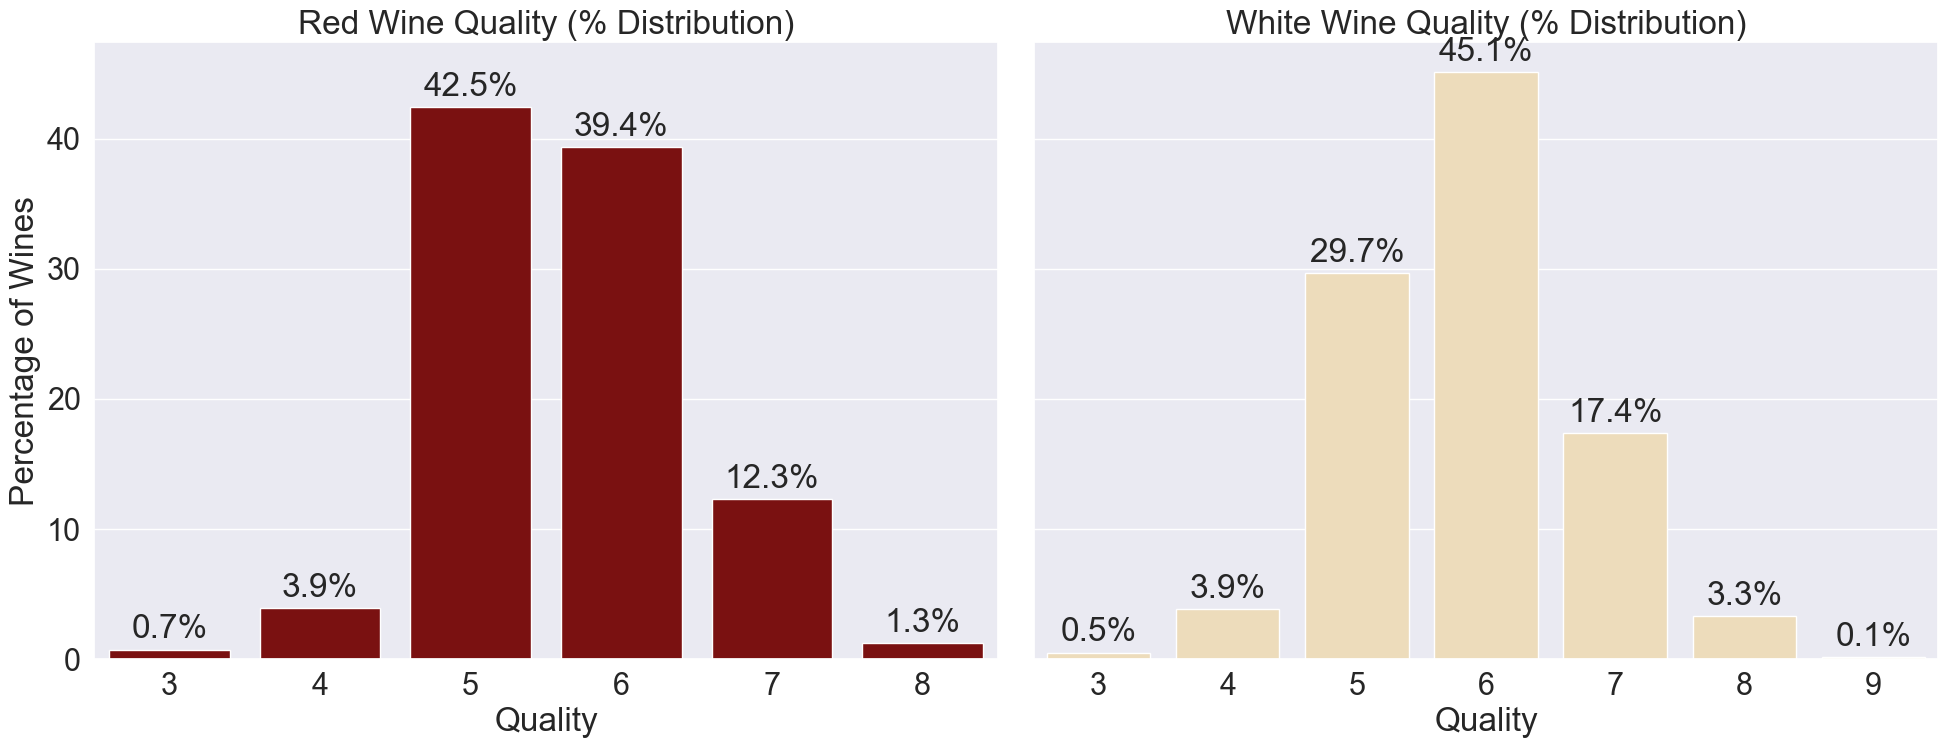

In [304]:
# Calculate percentage distribution for red wine
red_quality_counts = red_wine['quality'].value_counts(normalize=True).sort_index() * 100
red_quality_df = red_quality_counts.reset_index()
red_quality_df.columns = ['quality', 'percentage']

# Calculate percentage distribution for white wine
white_quality_counts = white_wine['quality'].value_counts(normalize=True).sort_index() * 100
white_quality_df = white_quality_counts.reset_index()
white_quality_df.columns = ['quality', 'percentage']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Red wine plot
seaborn.barplot(data=red_quality_df, x='quality', y='percentage', ax=axes[0], color='#8B0000')
axes[0].set_title("Red Wine Quality (% Distribution)")
axes[0].set_xlabel("Quality")
axes[0].set_ylabel("Percentage of Wines")
axes[0].bar_label(axes[0].containers[0], fmt='%.1f%%', padding=3)

# White wine plot
seaborn.barplot(data=white_quality_df, x='quality', y='percentage', ax=axes[1], color='#F5DEB3')
axes[1].set_title("White Wine Quality (% Distribution)")
axes[1].set_xlabel("Quality")
axes[1].set_ylabel("")
axes[1].bar_label(axes[1].containers[0], fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()


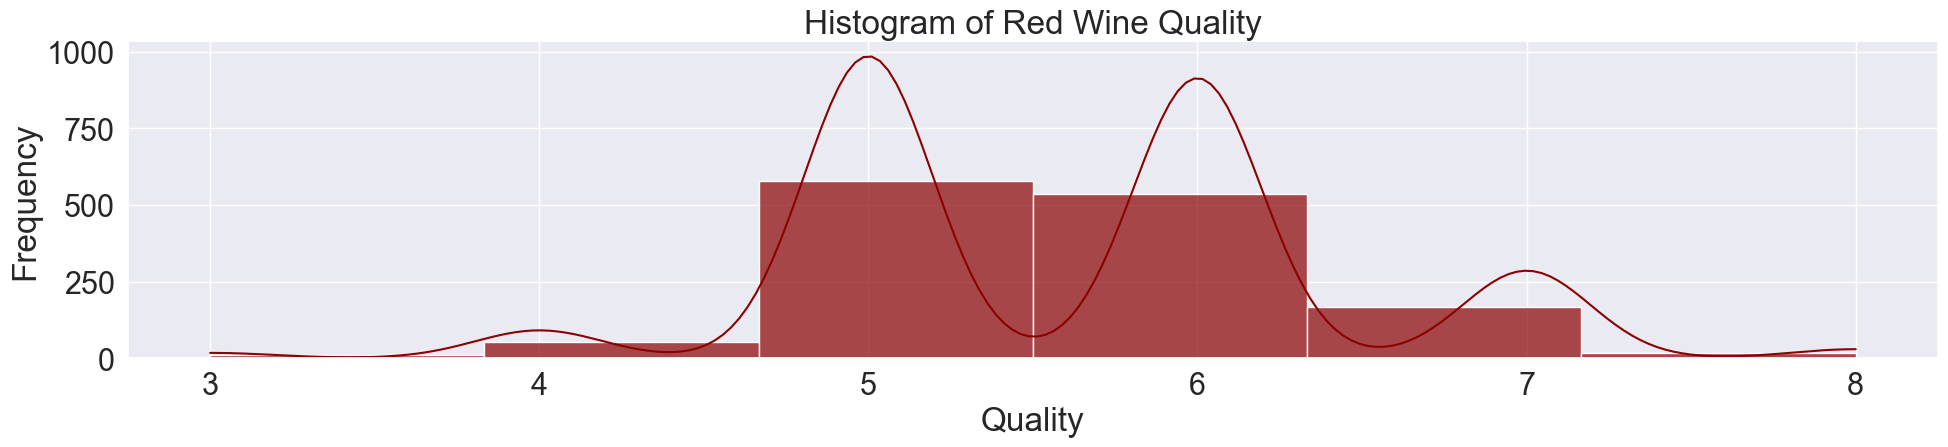

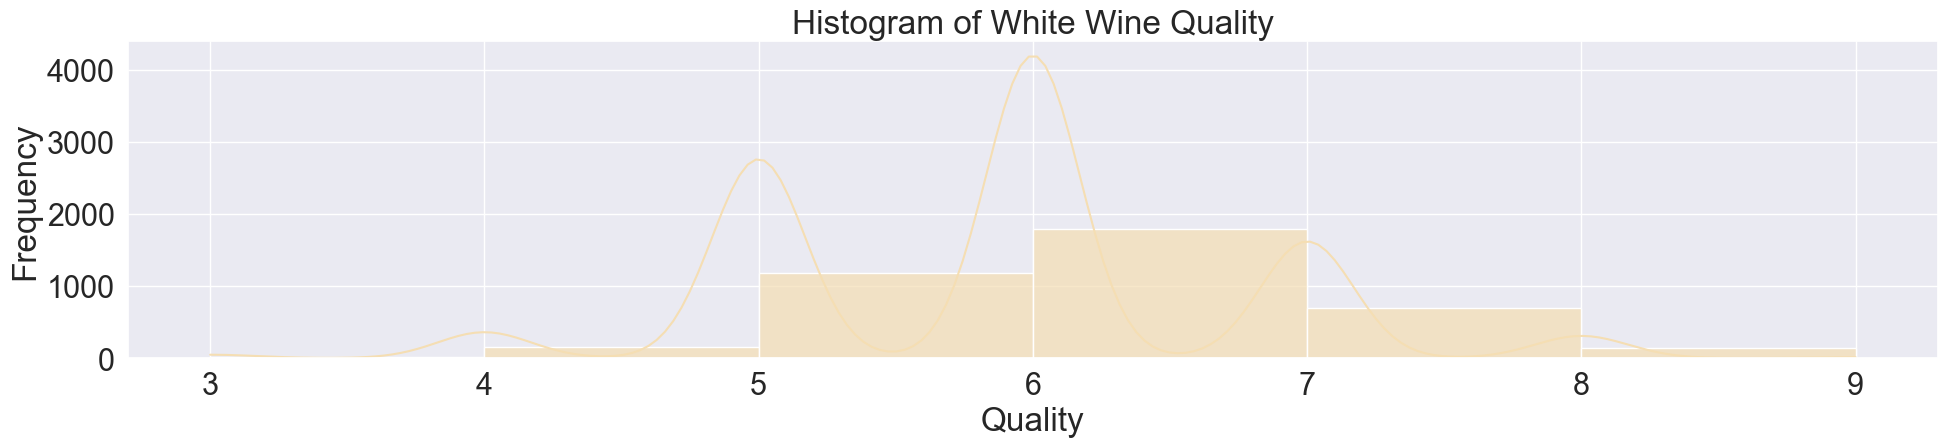

In [305]:
# Histogram for Red Wine
plt.figure(figsize=(20, 5))
seaborn.histplot(red_wine['quality'], color='#8B0000', kde=True, bins=6, alpha=0.7)
plt.title("Histogram of Red Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Histogram for White Wine
plt.figure(figsize=(20, 5))
seaborn.histplot(white_wine['quality'], color='#F5DEB3', kde=True, bins=6, alpha=0.7)
plt.title("Histogram of White Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [306]:
# Mean Quality of both wine types
print("Average quality - Red:", red_wine['quality'].mean())
print("Average quality - White:", white_wine['quality'].mean())

print("\nRed wines rated 7 or above:", (red_wine['quality'] >= 7).mean() * 100, "%")
print("White wines rated 7 or above:", (white_wine['quality'] >= 7).mean() * 100, "%")

Average quality - Red: 5.6232523914643116
Average quality - White: 5.854834637717748

Red wines rated 7 or above: 13.539367181751288 %
White wines rated 7 or above: 20.82807371875789 %


### Interpretation
- Average Quality:
    - Red wine: 5.62 (slightly below average).
    - White wine: 5.85 (slightly above average).

- Quality 7 or above:
    - Red wines: About 13.54% are rated 7 or higher.
    - White wines: About 20.83% are rated 7 or higher, showing better quality compared to red wines.

### Part B 
Discretise the alcohol content variables (separately for whites and reds) into low, mid, high based on its distribution. Create a 3-valued "alcohol_cat" variable to represent this. low < (average - stddev) | (average - stddev) < mid < (average + stddev) | high > (average + stddev). 

Getting the mean and standard deviation of alcohol content. Breakpoints Based on Statistics
Rule used:
- low < (mean − stddev)
- mid = between (mean − stddev) and (mean + stddev)
- high > (mean + stddev)

In [307]:
red_alcohol_mean = red_wine['alcohol'].mean()
red_alcohol_std = red_wine['alcohol'].std()

print("Red Wine - Alcohol Mean:", round(red_alcohol_mean, 2))
print("Red Wine - Alcohol Std Dev:", round(red_alcohol_std, 2))

white_alcohol_mean = white_wine['alcohol'].mean()
white_alcohol_std = white_wine['alcohol'].std()

print("White Wine - Alcohol Mean:", round(white_alcohol_mean, 2))
print("White Wine - Alcohol Std Dev:", round(white_alcohol_std, 2))

Red Wine - Alcohol Mean: 10.43
Red Wine - Alcohol Std Dev: 1.08
White Wine - Alcohol Mean: 10.59
White Wine - Alcohol Std Dev: 1.22


### Interpretation
- Red Wine Alcohol:
    - Mean: 10.43%
    - Std Dev: 1.08%
Slightly lower alcohol content with lower variability.

- White Wine Alcohol:
    - Mean: 10.59%
    - Std Dev: 1.22%
Slightly higher alcohol content with more variability.

In [308]:
# Red Wine
low_red = red_alcohol_mean - red_alcohol_std
high_red = red_alcohol_mean + red_alcohol_std

# White Wine
low_white = white_alcohol_mean - white_alcohol_std
high_white = white_alcohol_mean + white_alcohol_std

# Red wine categories
conditions_red = [
    red_wine['alcohol'] < low_red,
    red_wine['alcohol'] > high_red,
]
choice_red = ['low', 'high']
red_wine['alcohol_cat'] = np.select(conditions_red, choice_red, default='mid')

# White wine categories
conditions_white = [
    white_wine['alcohol'] < low_white,
    white_wine['alcohol'] > high_white,
]
choice_white = ['low', 'high']
white_wine['alcohol_cat'] = np.select(conditions_white, choice_white, default='mid')

print("Red Wine - Alcohol Category Distribution:")
print(red_wine['alcohol_cat'].value_counts(normalize=True).round(3))

print("\nWhite Wine - Alcohol Category Distribution:")
print(white_wine['alcohol_cat'].value_counts(normalize=True).round(3))

Red Wine - Alcohol Category Distribution:
alcohol_cat
mid    0.71
high   0.16
low    0.13
Name: proportion, dtype: float64

White Wine - Alcohol Category Distribution:
alcohol_cat
mid    0.64
high   0.19
low    0.17
Name: proportion, dtype: float64


### Interpretation
Red Wine - Alcohol Category Distribution:
- Low Alcohol: A small proportion of red wines fall into this category.
- Mid Alcohol: Majority of red wines have average alcohol content.
- High Alcohol: Small percentage of red wines have higher alcohol content.

White Wine - Alcohol Category Distribution:
- Low Alcohol: A small proportion of white wines fall into this category.
- Mid Alcohol: Most white wines have average alcohol content.
- High Alcohol: Small percentage of white wines have higher alcohol content, with a slightly higher percentage than red wines.

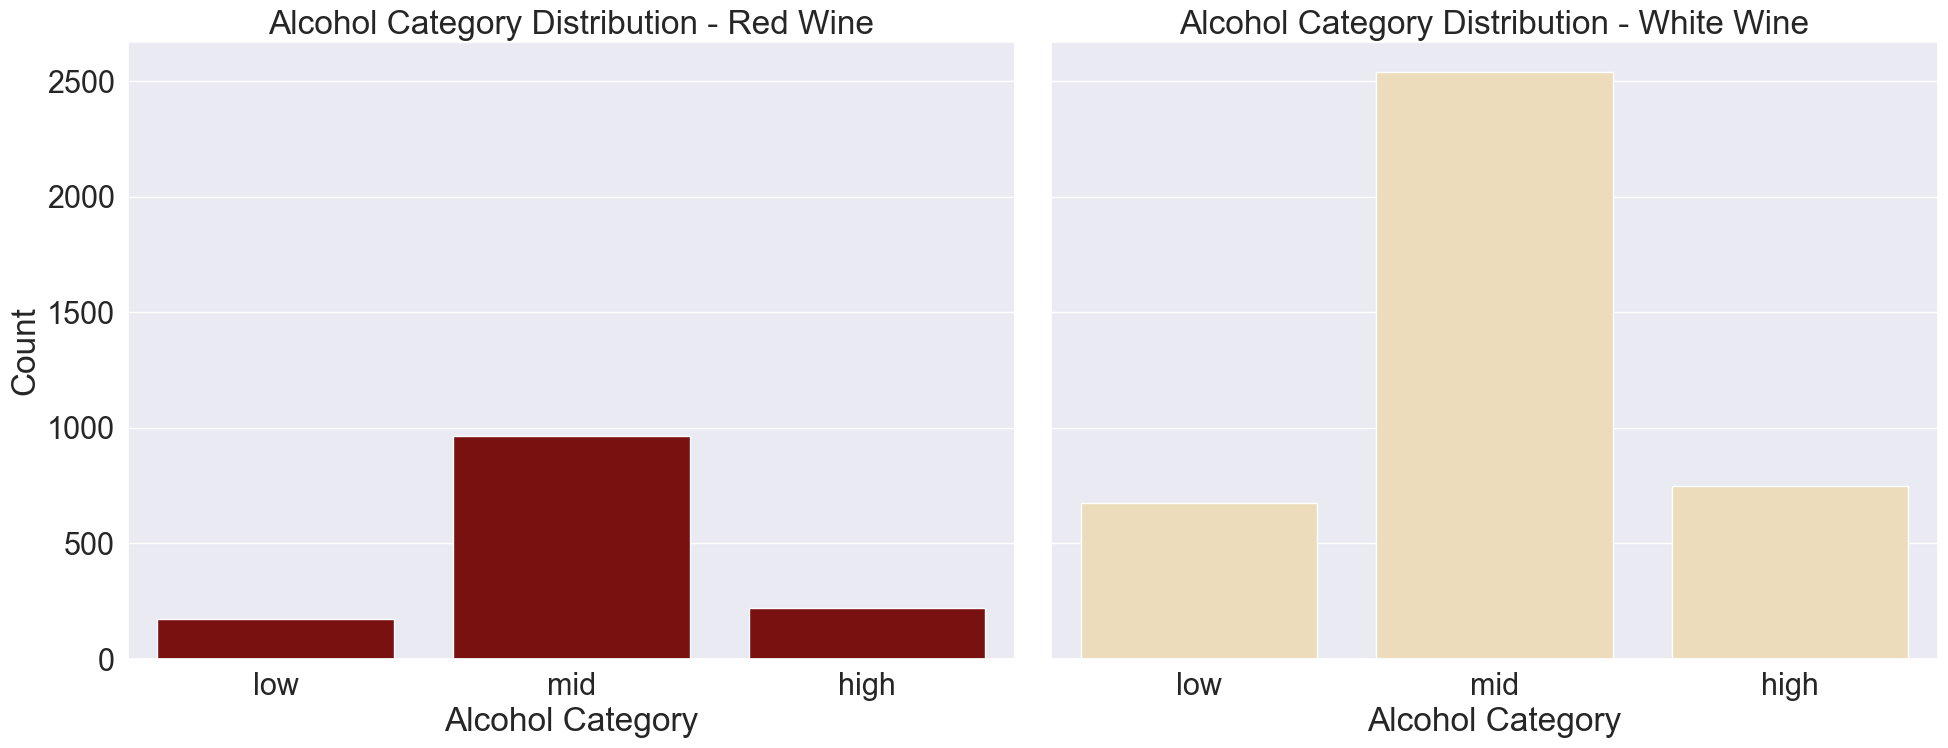

In [309]:
# Consistent category ordering
cat_order = CategoricalDtype(categories=["low", "mid", "high"], ordered=True)
red_wine['alcohol_cat'] = red_wine['alcohol_cat'].astype(cat_order)
white_wine['alcohol_cat'] = white_wine['alcohol_cat'].astype(cat_order)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Red wine plot
seaborn.countplot(data=red_wine, x='alcohol_cat', ax=axes[0], color='#8B0000')
axes[0].set_title("Alcohol Category Distribution - Red Wine")
axes[0].set_xlabel("Alcohol Category")
axes[0].set_ylabel("Count")

# White wine plot
seaborn.countplot(data=white_wine, x='alcohol_cat', ax=axes[1], color='#F5DEB3')
axes[1].set_title("Alcohol Category Distribution - White Wine")
axes[1].set_xlabel("Alcohol Category")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

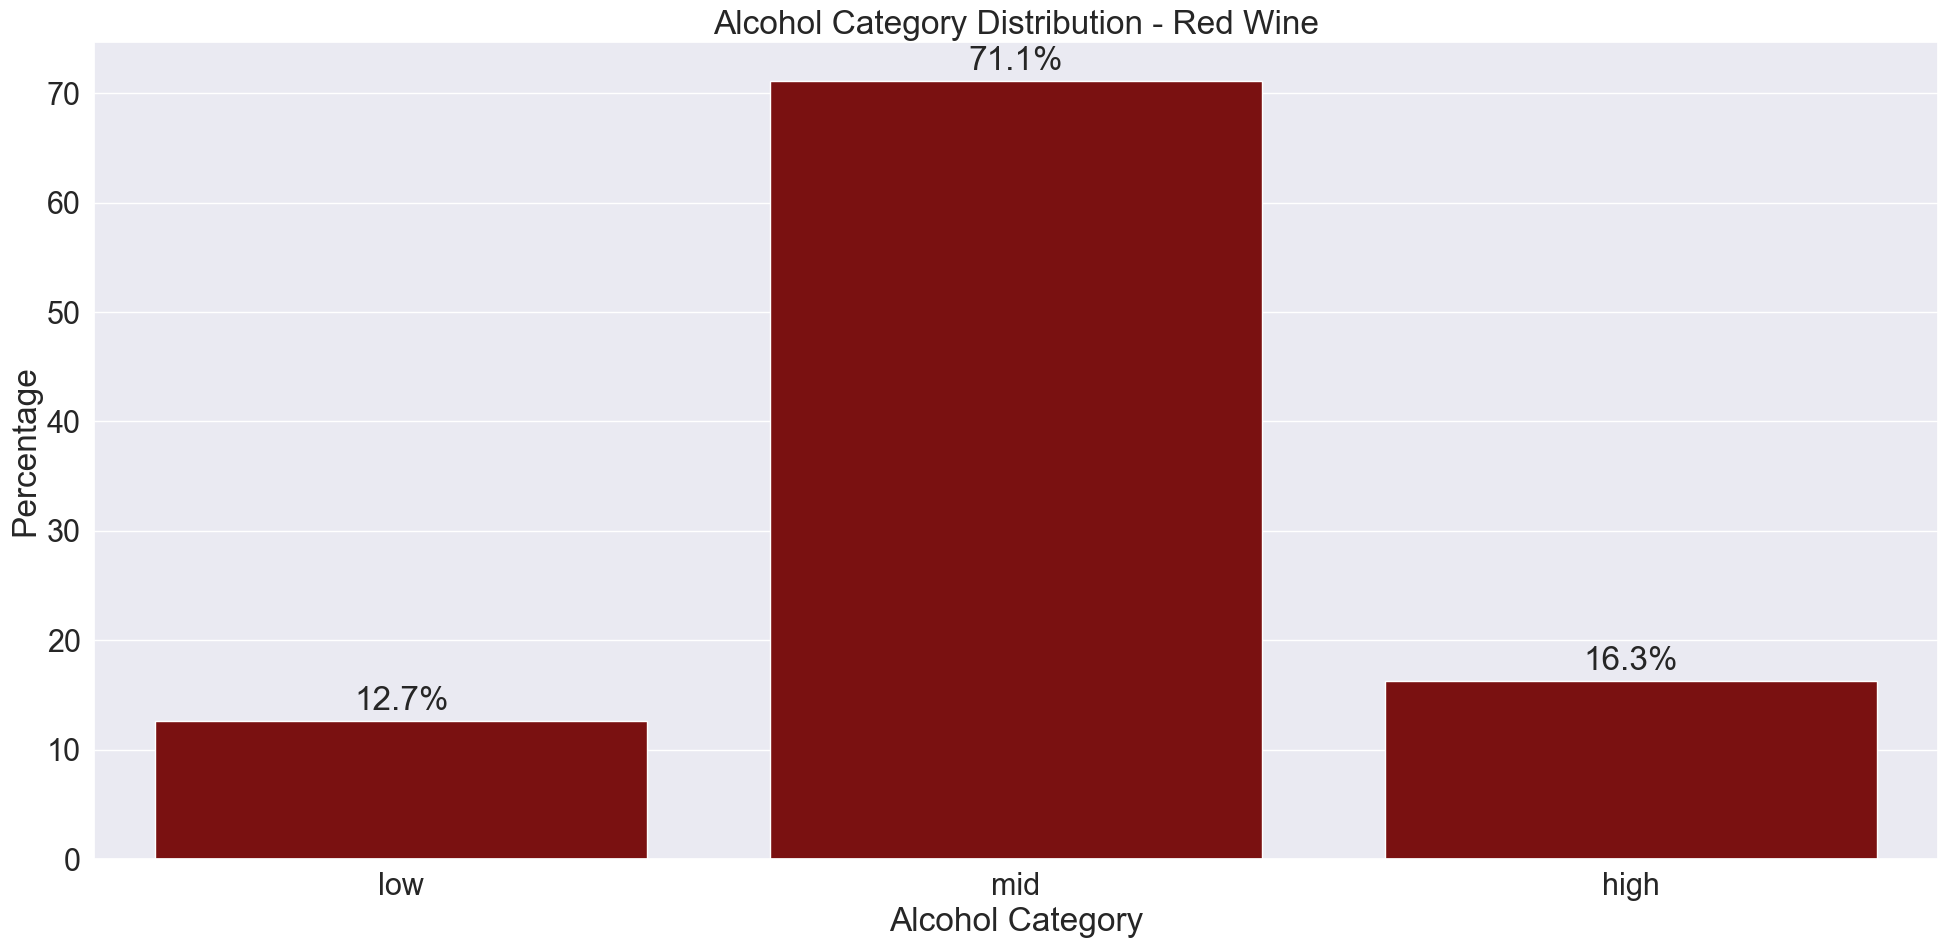

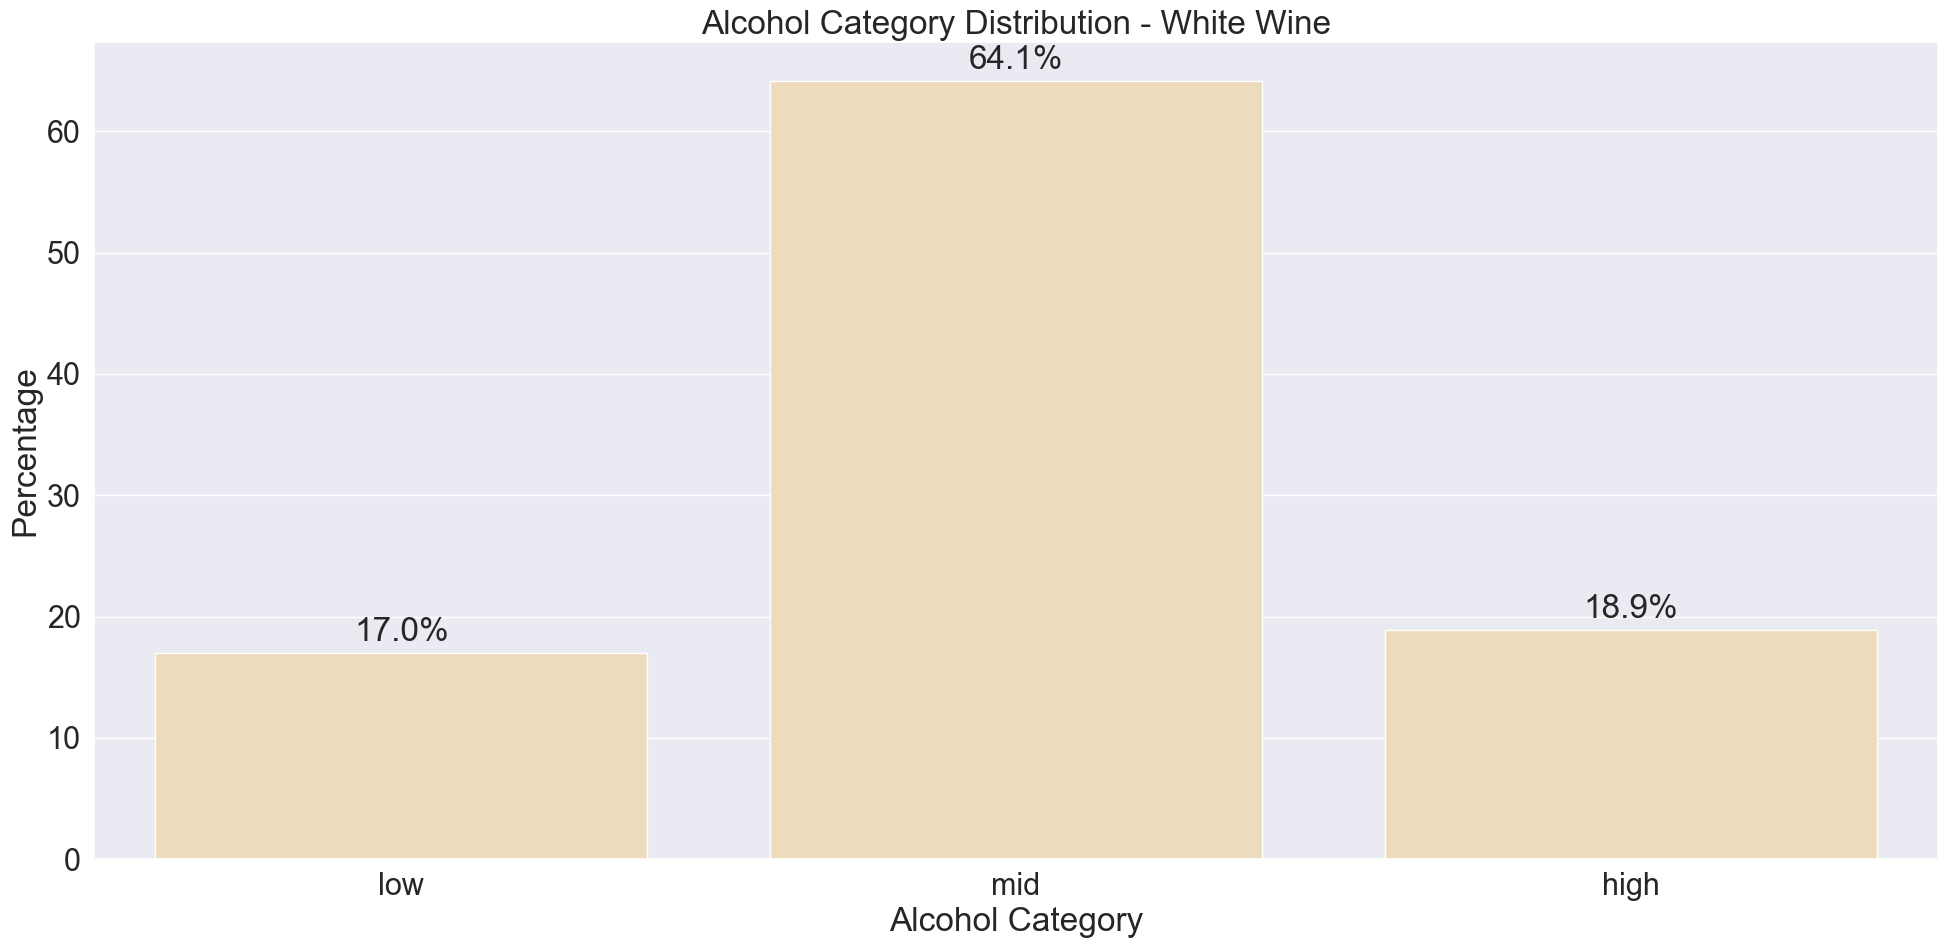

In [310]:
# Red Wine Alcohol Category Distribution
red_counts = red_wine['alcohol_cat'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(20, 10))
bars = seaborn.barplot(x=red_counts.index, y=red_counts.values, color='#8B0000')
plt.title("Alcohol Category Distribution - Red Wine")
plt.xlabel("Alcohol Category")
plt.ylabel("Percentage")

# Add percentage labels
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# White Wine Alcohol Category Distribution
white_counts = white_wine['alcohol_cat'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(20, 10))
bars = seaborn.barplot(x=white_counts.index, y=white_counts.values, color='#F5DEB3')
plt.title("Alcohol Category Distribution - White Wine")
plt.xlabel("Alcohol Category")
plt.ylabel("Percentage")

# Add percentage labels
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center')

plt.tight_layout()
plt.show()

In [311]:
# Average quality by alcohol category
print("Red Wine - Avg Quality by Alcohol Category:")
print(red_wine.groupby('alcohol_cat')['quality'].mean())

print("\nWhite Wine - Avg Quality by Alcohol Category:")
print(white_wine.groupby('alcohol_cat')['quality'].mean())

Red Wine - Avg Quality by Alcohol Category:
alcohol_cat
low    5.18
mid    5.53
high   6.38
Name: quality, dtype: float64

White Wine - Avg Quality by Alcohol Category:
alcohol_cat
low    5.40
mid    5.77
high   6.54
Name: quality, dtype: float64


### Interpretation
Red Wine:
- Low Alcohol: The average quality is 5.18, indicating that red wines with low alcohol content tend to have slightly lower quality ratings.
- Mid Alcohol: The average quality is 5.53, which is slightly higher than low alcohol wines.
- High Alcohol: The average quality increases to 6.38, suggesting that red wines with higher alcohol content tend to have better quality ratings.

White Wine:
- Low Alcohol: The average quality is 5.40, slightly better than red wines in the same category.
- Mid Alcohol: The average quality is 5.77, higher than low alcohol wines and in line with the trend seen in red wines.
- High Alcohol: The highest average quality at 6.54, showing that white wines with high alcohol content generally have the best ratings.

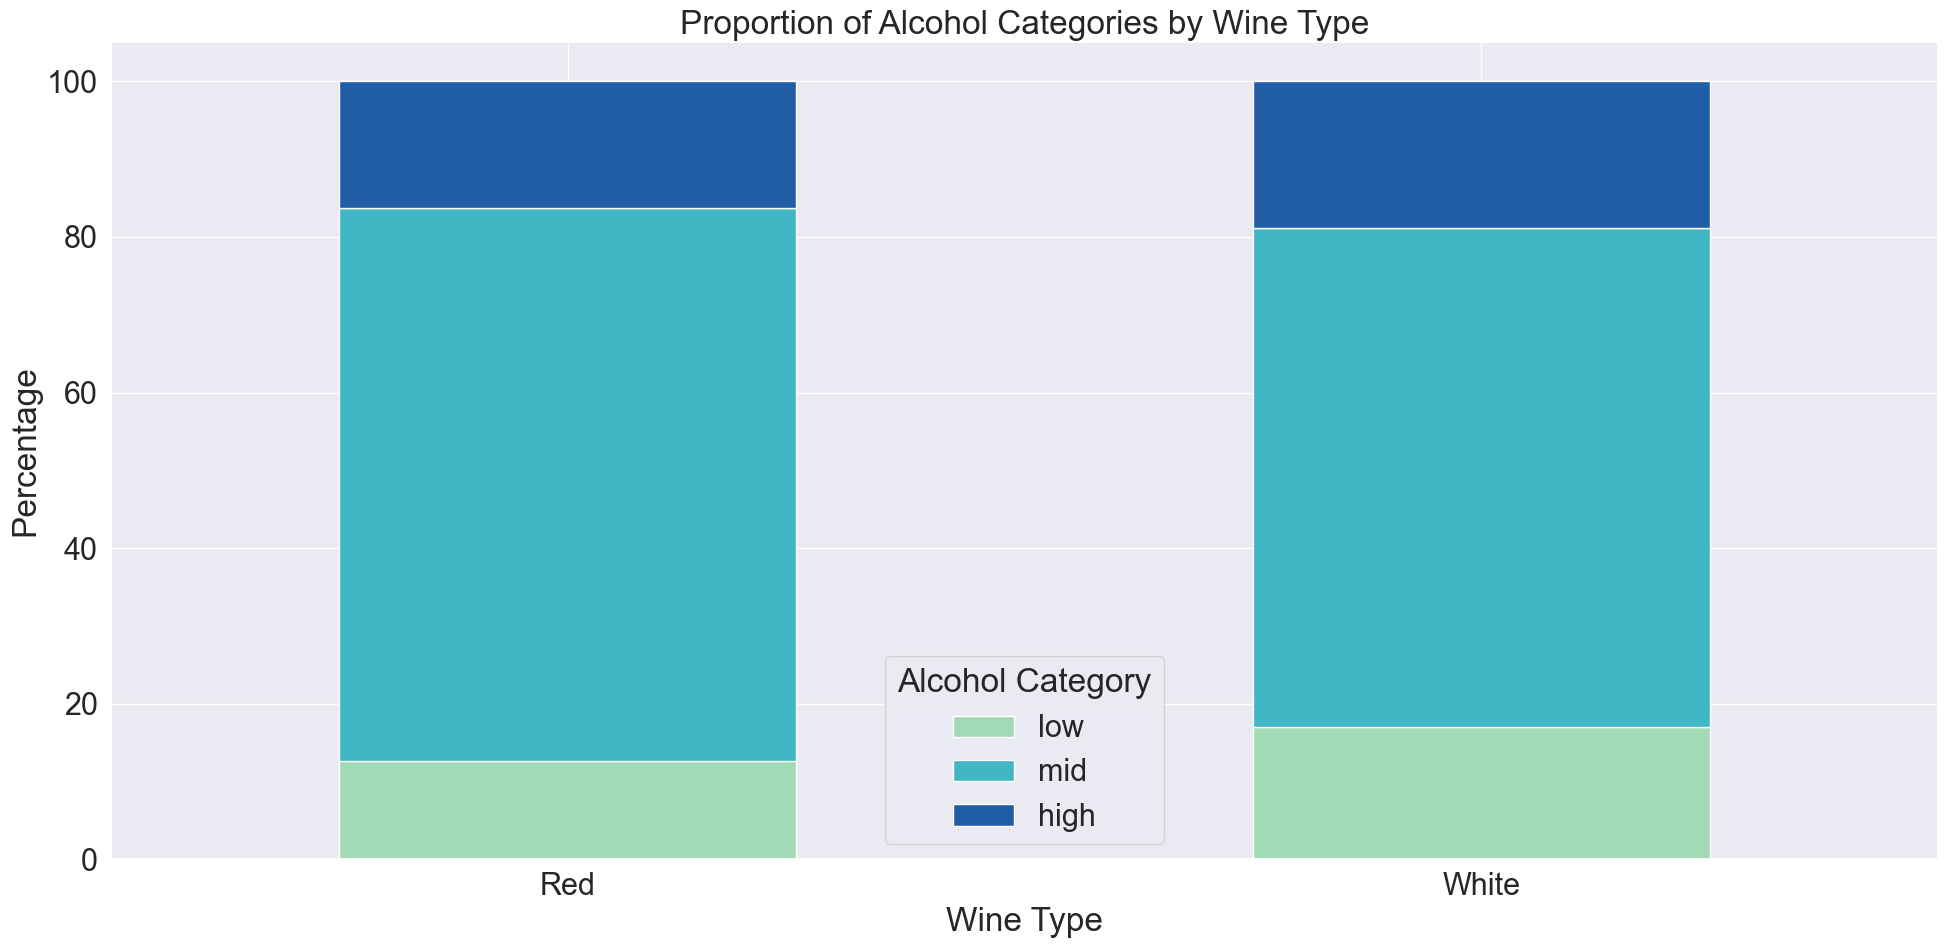

In [312]:
# Percentage breakdown for red wine
red_dist = (
    red_wine['alcohol_cat'].value_counts(normalize=True)
    .reindex(["low", "mid", "high"], fill_value=0) * 100
)

# Percentage breakdown for white wine
white_dist = (
    white_wine['alcohol_cat'].value_counts(normalize=True)
    .reindex(["low", "mid", "high"], fill_value=0) * 100
)

# Combine into a DataFrame
alcohol_cat_dist = pd.DataFrame({
    'Red': red_dist,
    'White': white_dist
}).T  # Transpose to get types as index

# Ensure correct column order
alcohol_cat_dist = alcohol_cat_dist[["low", "mid", "high"]]

# Plot
alcohol_cat_dist.plot(kind='bar', stacked=True, color=['#a1dab4', '#41b6c4', '#225ea8'], figsize=(20, 10))

plt.title("Proportion of Alcohol Categories by Wine Type")
plt.ylabel("Percentage")
plt.xlabel("Wine Type")
plt.xticks(rotation=0)
plt.legend(title='Alcohol Category')
plt.tight_layout()
plt.show()


## Part C
Describe the distribution of wine quality as in (1.A), but separately for low-, mid-, and high-alcohol content. Create suitable plots to illustrate. Can you draw any conclusions on the relationship between alcohol content and quality?


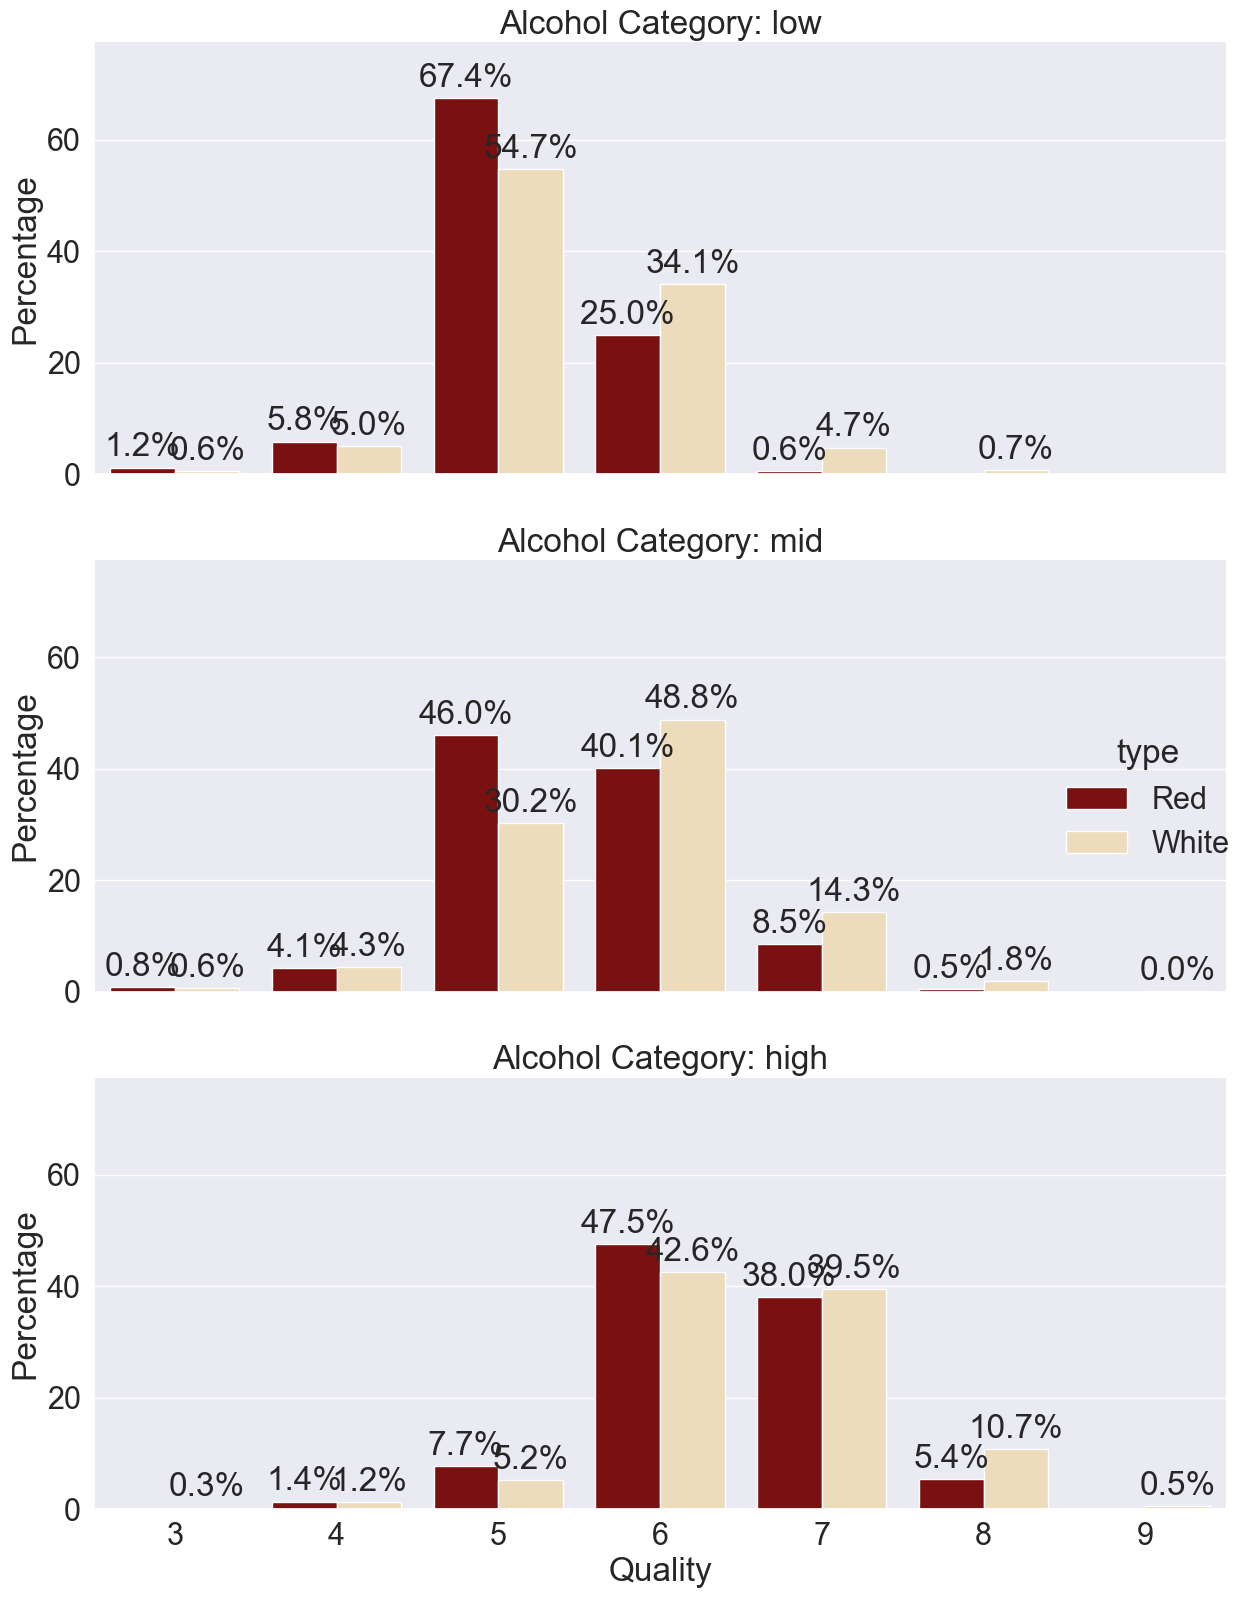

In [313]:
# Prepare red wine quality percentage by alcohol category
red_quality_dist = (
    red_wine.groupby(['alcohol_cat', 'quality'], observed=True).size()
    .groupby(level=0)
    .transform(lambda x: 100 * x / x.sum())
    .reset_index(name='percentage')
)
red_quality_dist['type'] = 'Red'

# Prepare white wine quality percentage by alcohol category
white_quality_dist = (
    white_wine.groupby(['alcohol_cat', 'quality'], observed=True).size()
    .groupby(level=0)
    .transform(lambda x: 100 * x / x.sum())
    .reset_index(name='percentage')
)
white_quality_dist['type'] = 'White'

# Combine both
quality_dist = pd.concat([red_quality_dist, white_quality_dist], ignore_index=True)

# Plotting
graph = seaborn.catplot(
    data=quality_dist,
    x='quality',
    y='percentage',
    hue='type',
    col='alcohol_cat',
    kind='bar',
    palette={'Red': '#8B0000', 'White': '#F5DEB3'},
    height=5.5,
    aspect=2,
    col_wrap=1
)

graph.set_titles("Alcohol Category: {col_name}")
graph.set_axis_labels("Quality", "Percentage")
graph.set(ylim=(0, quality_dist['percentage'].max() + 10))

for ax in graph.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()


Conclusions Drawn from Task 1 Part C results
TODO

## Part D -
 Plot the residual sugar variable and identify a suitable threshold to separate "sweet" from "dry" wines*. Create a new "isSweet" binary variable to represent these two classes. The distributions of residual sugar are skewed for both reds and whites (in fact most wines in this dataset are dry according to the official definition, e.g., https://winefolly.com/deep-dive/sugar-in-wine-chart/)Links to an external site.. A practical approach in this case is to pick a threshold that splits the dataset (almost) evenly, as that will give you two balanced classes for your classifier. So your task is to find a threshold such that each class has approximately the same number of records.

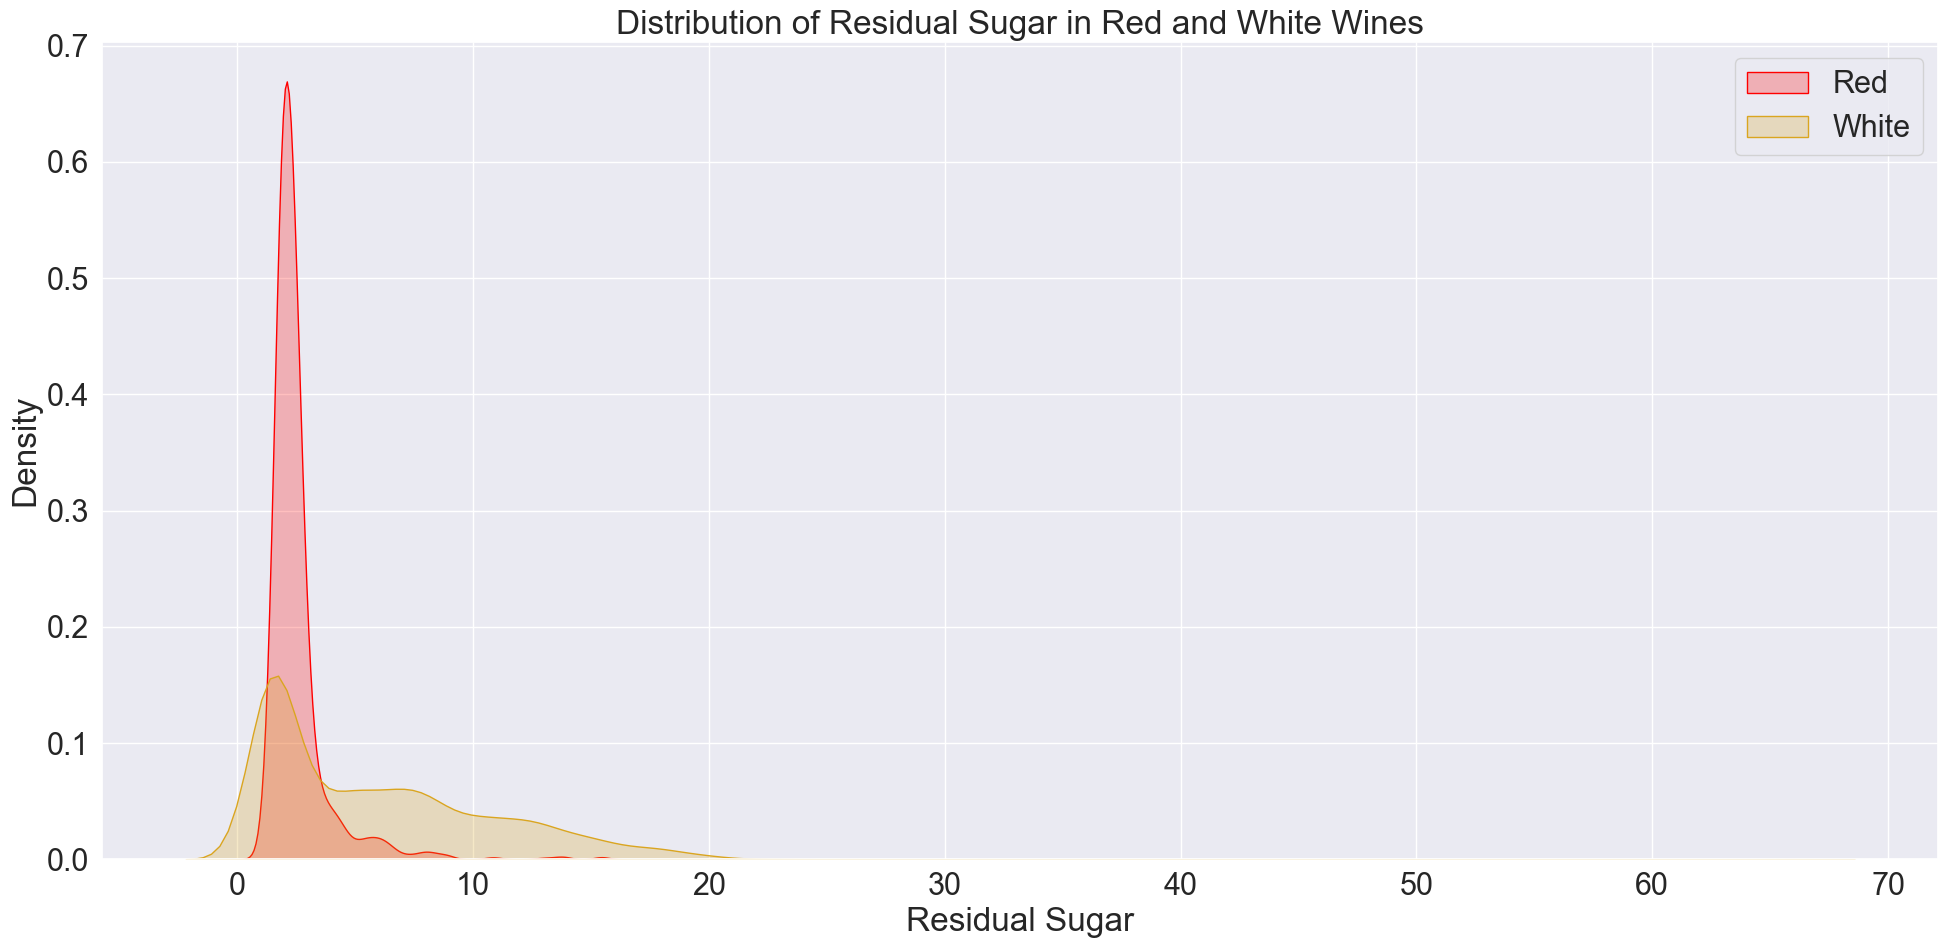

In [314]:
# Residual Sugar distribution Plot
plt.figure(figsize=(20, 10))
seaborn.kdeplot(red_wine['residual sugar'], label='Red', fill=True, color='red')
seaborn.kdeplot(white_wine['residual sugar'], label='White', fill=True, color='goldenrod')
plt.title("Distribution of Residual Sugar in Red and White Wines")
plt.xlabel("Residual Sugar")
plt.legend()
plt.tight_layout()
plt.show()

In [315]:
# Red wine sweetness
red_threshold = red_wine['residual sugar'].median()
print("Red wine sweetness threshold:", round(red_threshold, 2))

red_wine['isSweet'] = (red_wine['residual sugar'] > red_threshold).astype(int)
print("\nRed Wine - Sweet vs Dry Distribution:")
print(red_wine['isSweet'].value_counts(normalize=True))

Red wine sweetness threshold: 2.2

Red Wine - Sweet vs Dry Distribution:
isSweet
0   0.55
1   0.45
Name: proportion, dtype: float64


In [316]:
# White wine sweetness
white_threshold = white_wine['residual sugar'].median()
print("\nWhite wine sweetness threshold:", round(white_threshold, 2))

white_wine['isSweet'] = (white_wine['residual sugar'] > white_threshold).astype(int)
print("\nWhite Wine - Sweet vs Dry Distribution:")
print(white_wine['isSweet'].value_counts(normalize=True))


White wine sweetness threshold: 4.7

White Wine - Sweet vs Dry Distribution:
isSweet
0   0.50
1   0.50
Name: proportion, dtype: float64


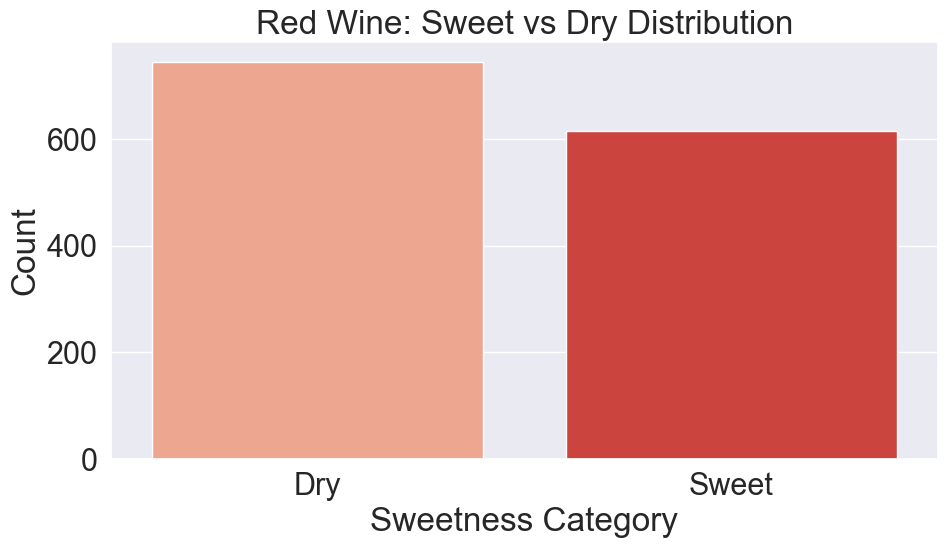

In [317]:
# Plot for red wine
plt.figure(figsize=(10, 6))
seaborn.countplot(data=red_wine, x='isSweet', hue='isSweet', palette='Reds', legend=False)
plt.title("Red Wine: Sweet vs Dry Distribution")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.ylabel("Count")
plt.xlabel("Sweetness Category")
plt.tight_layout()
plt.show()

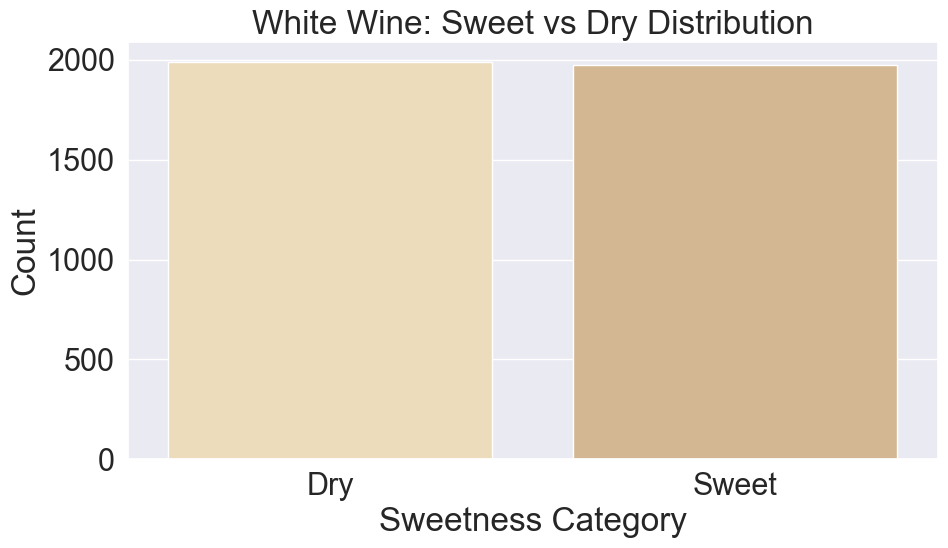

In [318]:
plt.figure(figsize=(10, 6))
seaborn.countplot(
    data=white_wine,
    x='isSweet',
    hue='isSweet',
    palette=["#F5DEB3", "#DEB887"],
    legend=False
)
plt.title("White Wine: Sweet vs Dry Distribution")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.ylabel("Count")
plt.xlabel("Sweetness Category")
plt.tight_layout()
plt.show()


### Interpretation
Red Wine Sweetness: The sweetness threshold for red wine is set at a residual sugar value of 2.2. This means that wines with residual sugar values greater than 2.2 are categorized as sweet, and those below or equal to 2.2 are categorized as dry.
- Sweet vs Dry Distribution:
    - 55% of the red wines are categorized as dry (residual sugar ≤ 2.2).
    - 45% of the red wines are categorized as sweet (residual sugar > 2.2).
This indicates that nearly half of the red wines have higher residual sugar and thus can be classified as sweet, while the rest are more on the dry side.

White Wine Sweetness: The sweetness threshold for white wine is set at a residual sugar value of 4.7. This means that wines with residual sugar values greater than 4.7 are categorized as sweet, and those below or equal to 4.7 are categorized as dry.
- Sweet vs Dry Distribution:
    - 50% of the white wines are categorized as dry (residual sugar ≤ 4.7).
    - 50% of the white wines are categorized as sweet (residual sugar > 4.7).
This suggests a balanced distribution between sweet and dry white wines, with an equal proportion falling into each category.

## Part E 
Using the threshold from (1.D), repeat the distribution analysis of quality vs isSweet. Are sweet wines perceived as lower or higher quality than dry wines?

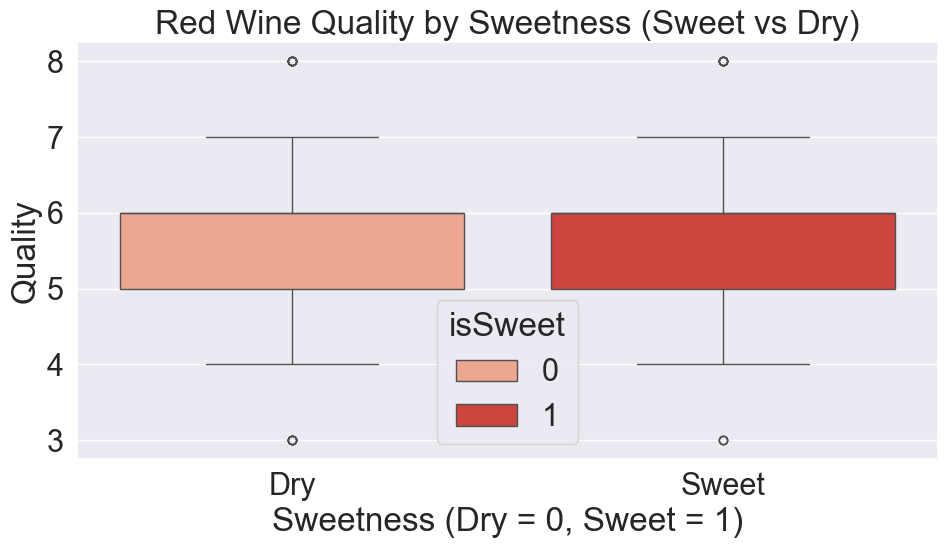

In [319]:
# Red Wine: Quality by Sweetness
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=red_wine, x='isSweet', y='quality', hue='isSweet', palette='Reds')
plt.title("Red Wine Quality by Sweetness (Sweet vs Dry)")
plt.xlabel("Sweetness (Dry = 0, Sweet = 1)")
plt.ylabel("Quality")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.tight_layout()
plt.show()


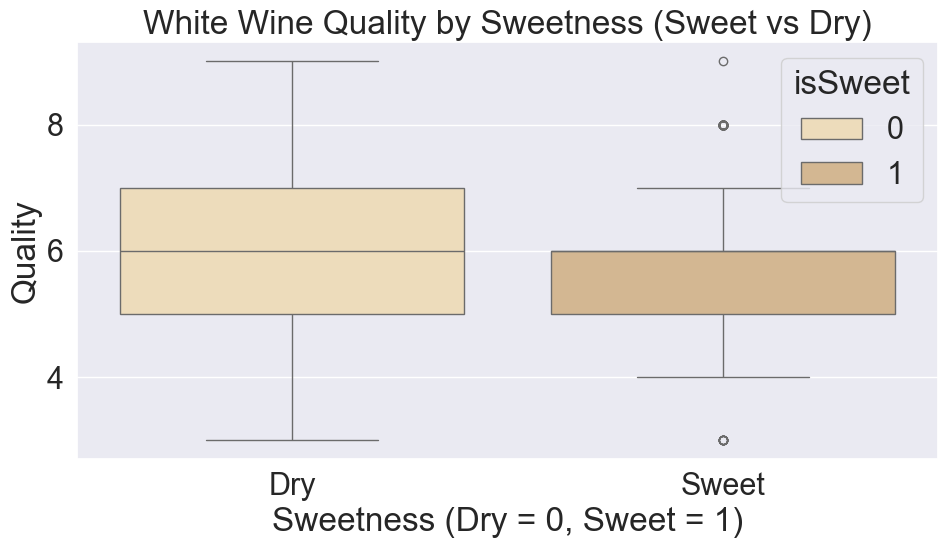

In [320]:
# White Wine: Quality by Sweetness
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=white_wine, x='isSweet', y='quality', hue='isSweet', palette=["#F5DEB3", "#DEB887"])
plt.title("White Wine Quality by Sweetness (Sweet vs Dry)")
plt.xlabel("Sweetness (Dry = 0, Sweet = 1)")
plt.ylabel("Quality")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.tight_layout()
plt.show()

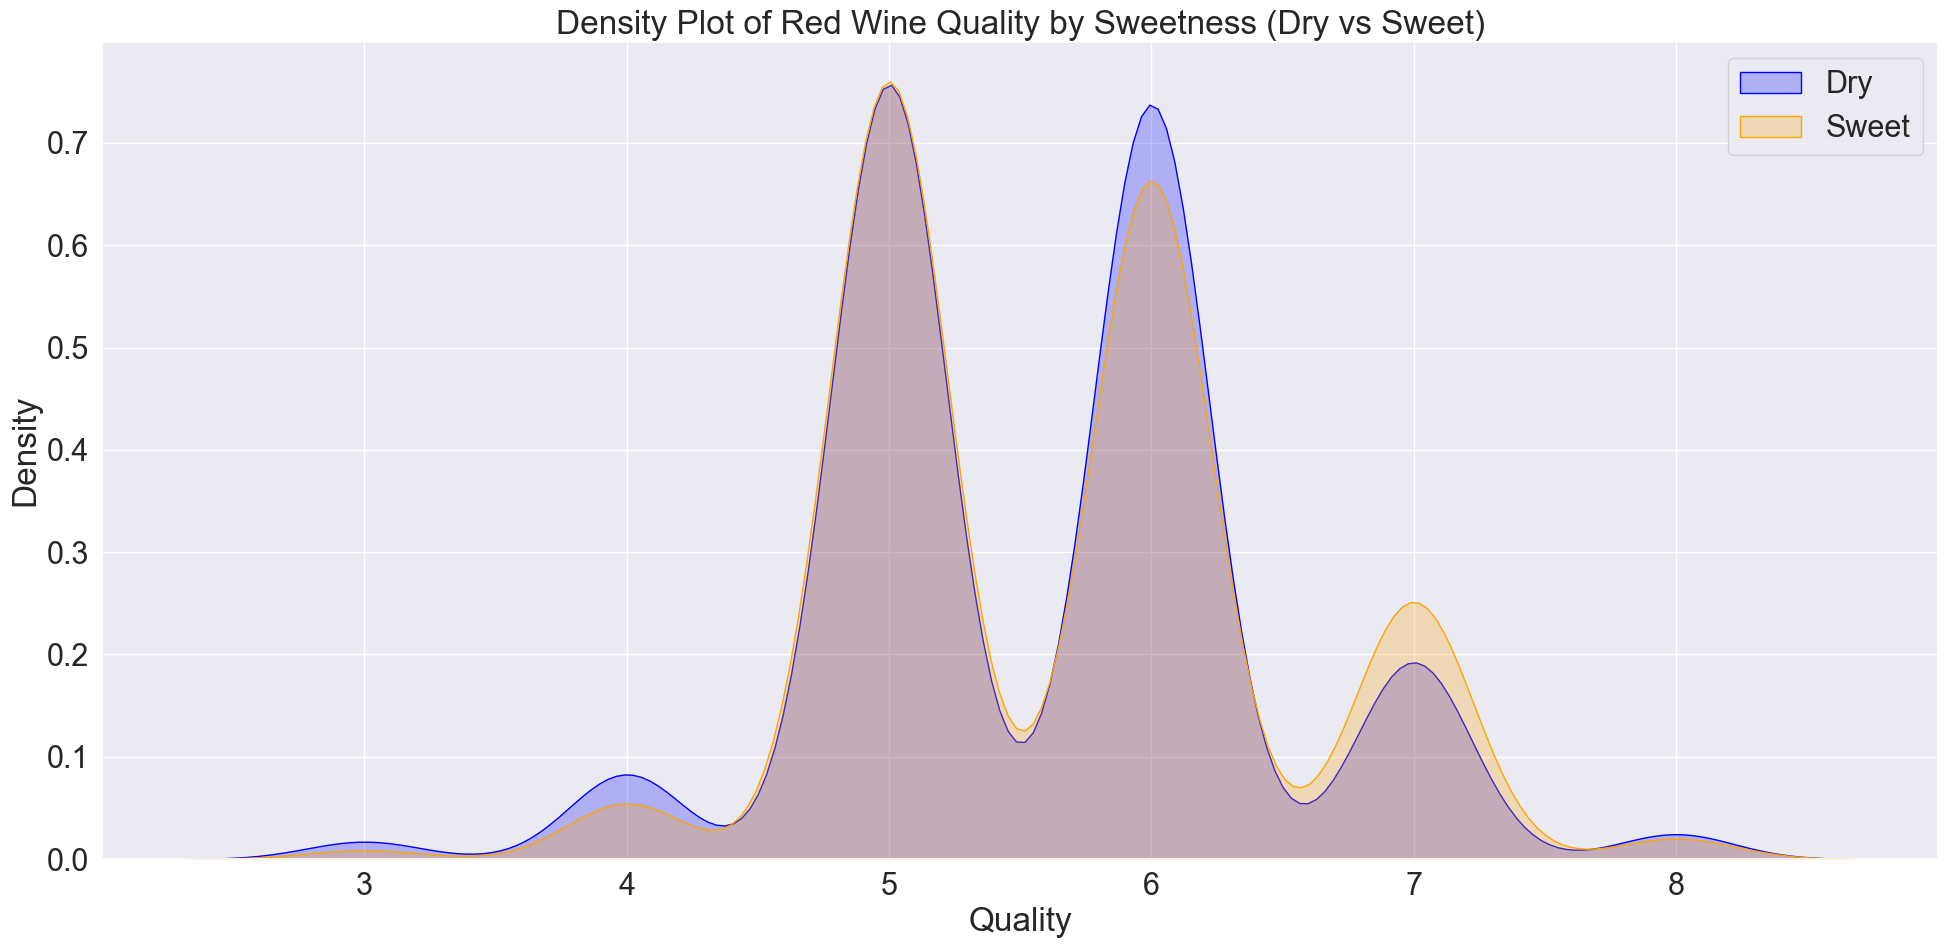

In [321]:
# Density plot for red wine (Dry vs Sweet)
plt.figure(figsize=(20, 10))

# Red Wine - Dry
seaborn.kdeplot(data=red_wine[red_wine['isSweet'] == 0], x='quality', label='Dry', fill=True, color='blue')

# Red Wine - Sweet
seaborn.kdeplot(data=red_wine[red_wine['isSweet'] == 1], x='quality', label='Sweet', fill=True, color='orange')

plt.title("Density Plot of Red Wine Quality by Sweetness (Dry vs Sweet)")
plt.xlabel("Quality")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


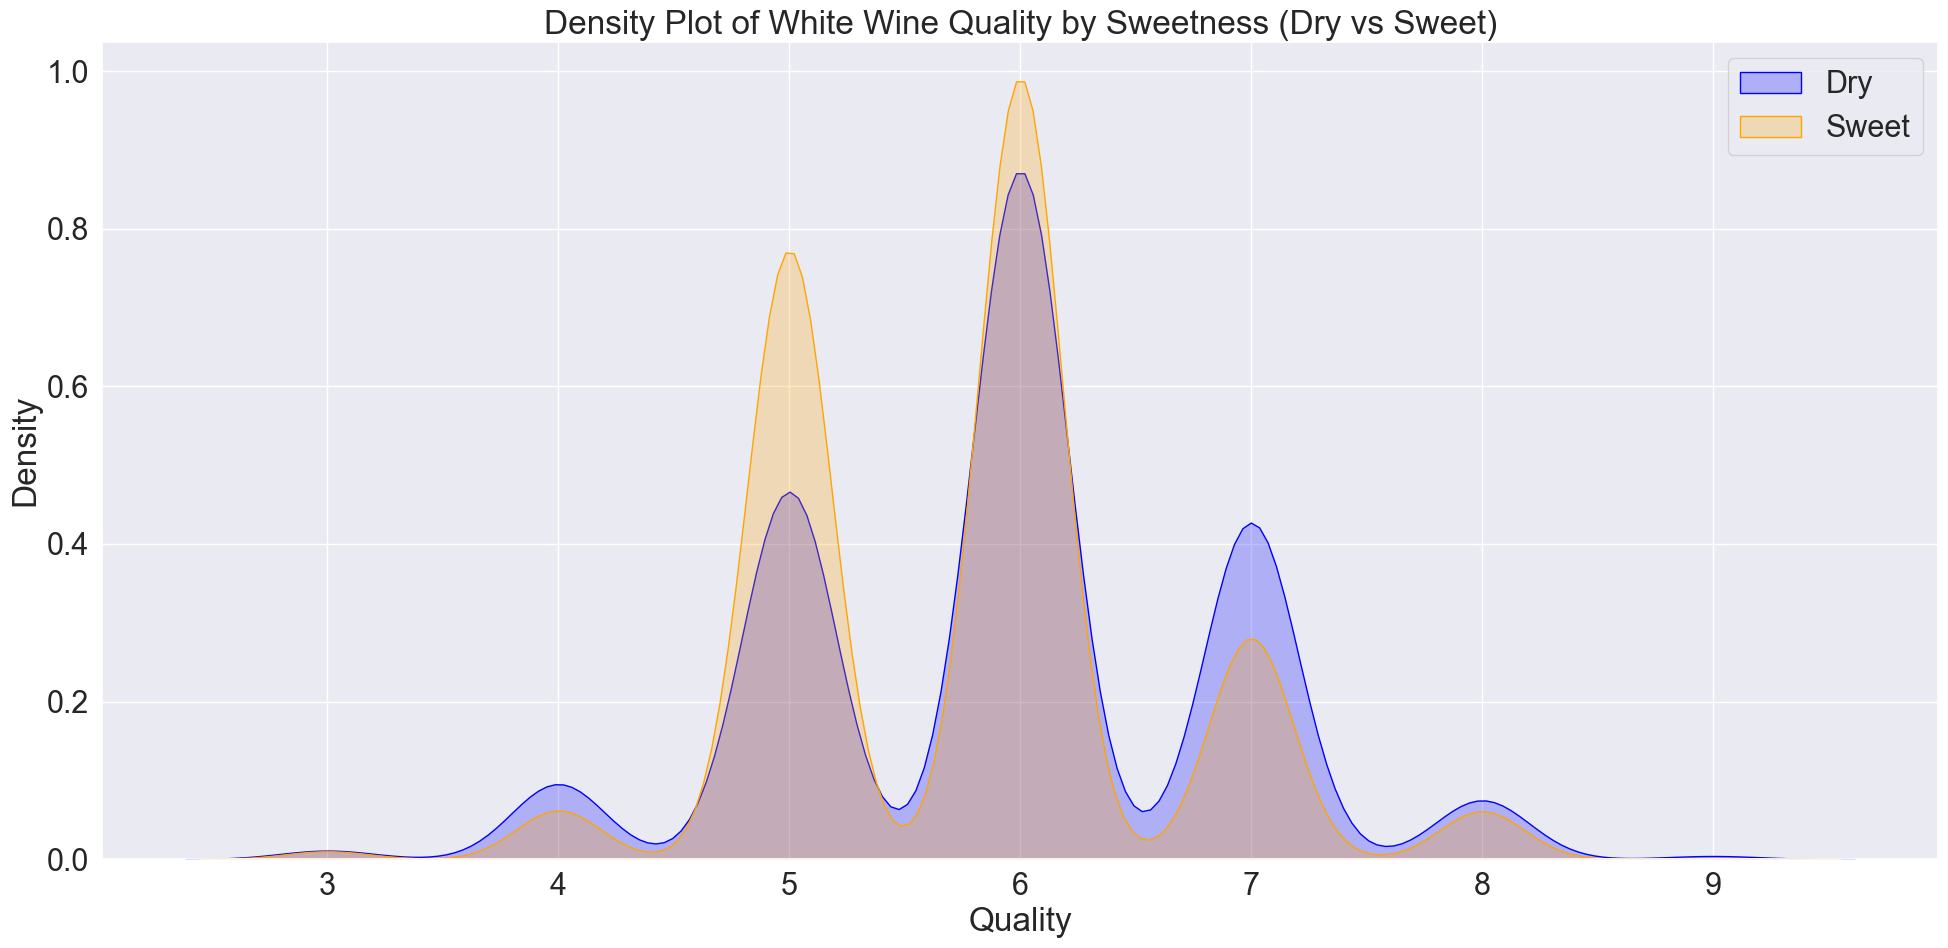

In [322]:
# Density plot for white wine (Dry vs Sweet)
plt.figure(figsize=(20, 10))

# White Wine - Dry
seaborn.kdeplot(data=white_wine[white_wine['isSweet'] == 0], x='quality', label='Dry', fill=True, color='blue')

# White Wine - Sweet
seaborn.kdeplot(data=white_wine[white_wine['isSweet'] == 1], x='quality', label='Sweet', fill=True, color='orange')

plt.title("Density Plot of White Wine Quality by Sweetness (Dry vs Sweet)")
plt.xlabel("Quality")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [323]:
# Mean and median quality comparison for red wine
mean_quality_by_sweetness_red = red_wine.groupby('isSweet')['quality'].mean()
median_quality_by_sweetness_red = red_wine.groupby('isSweet')['quality'].median()

print("Red Wine - Average Quality by Sweetness (Dry = 0, Sweet = 1):")
print(mean_quality_by_sweetness_red)

print("\nRed Wine - Median Quality by Sweetness (Dry = 0, Sweet = 1):")
print(median_quality_by_sweetness_red)

# Conclusion for red wine
print("\nRed Wine Analysis:")
if mean_quality_by_sweetness_red[1] > mean_quality_by_sweetness_red[0]:
    print("Sweet red wines tend to have a higher average quality than dry red wines.")
else:
    print("Dry red wines tend to have a higher average quality than sweet red wines.")


Red Wine - Average Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0   5.60
1   5.66
Name: quality, dtype: float64

Red Wine - Median Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0   6.00
1   6.00
Name: quality, dtype: float64

Red Wine Analysis:
Sweet red wines tend to have a higher average quality than dry red wines.


In [324]:
# Mean and median quality comparison for white wine
mean_quality_by_sweetness_white = white_wine.groupby('isSweet')['quality'].mean()
median_quality_by_sweetness_white = white_wine.groupby('isSweet')['quality'].median()

print("\nWhite Wine - Average Quality by Sweetness (Dry = 0, Sweet = 1):")
print(mean_quality_by_sweetness_white)

print("\nWhite Wine - Median Quality by Sweetness (Dry = 0, Sweet = 1):")
print(median_quality_by_sweetness_white)

# Conclusion for white wine
print("\nWhite Wine Analysis:")
if mean_quality_by_sweetness_white[1] > mean_quality_by_sweetness_white[0]:
    print("Sweet white wines tend to have a higher average quality than dry white wines.")
else:
    print("Dry white wines tend to have a higher average quality than sweet white wines.")


White Wine - Average Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0   5.95
1   5.76
Name: quality, dtype: float64

White Wine - Median Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0   6.00
1   6.00
Name: quality, dtype: float64

White Wine Analysis:
Dry white wines tend to have a higher average quality than sweet white wines.


Are sweet wines perceived as lower or higher quality than dry wines?

Interpretation:
Very similar average and median quality: This suggests that sweet wines are, on average, not higher or lower quality than dry wines. The quality ratings are very similar, both on average and at the median.

Given the close average and median, it appears that there isn’t a strong correlation between sweetness and wine quality based on this dataset. This is interesting as one might expect that sweetness could influence how wine is perceived (with sweet wines potentially having higher quality ratings in some cases). But in this case, it looks quite balanced.

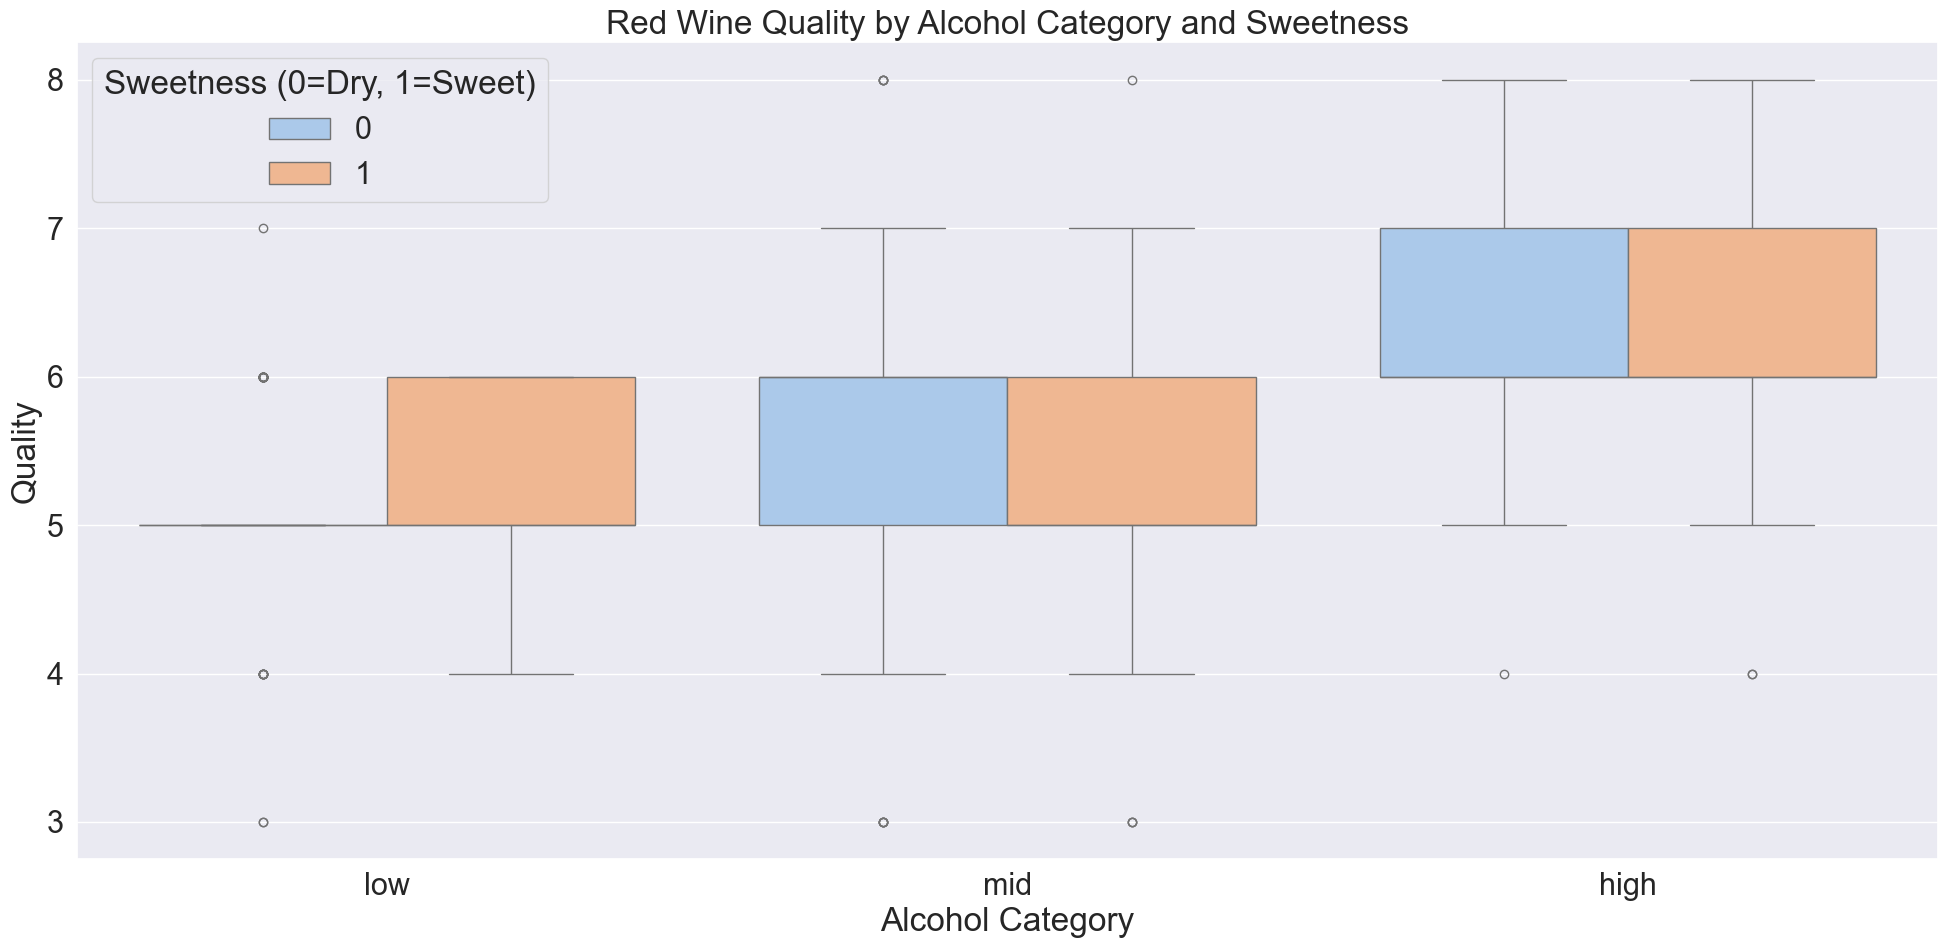

In [325]:
# Extension: Additional Descriptive Analysis
# Extension: Quality by Alcohol Category and Sweetness
plt.figure(figsize=(20, 10))
seaborn.boxplot(data=red_wine, x='alcohol_cat', y='quality', hue='isSweet', palette='pastel')
plt.title("Red Wine Quality by Alcohol Category and Sweetness")
plt.xlabel("Alcohol Category")
plt.ylabel("Quality")
plt.legend(title="Sweetness (0=Dry, 1=Sweet)")
plt.tight_layout()
plt.show()

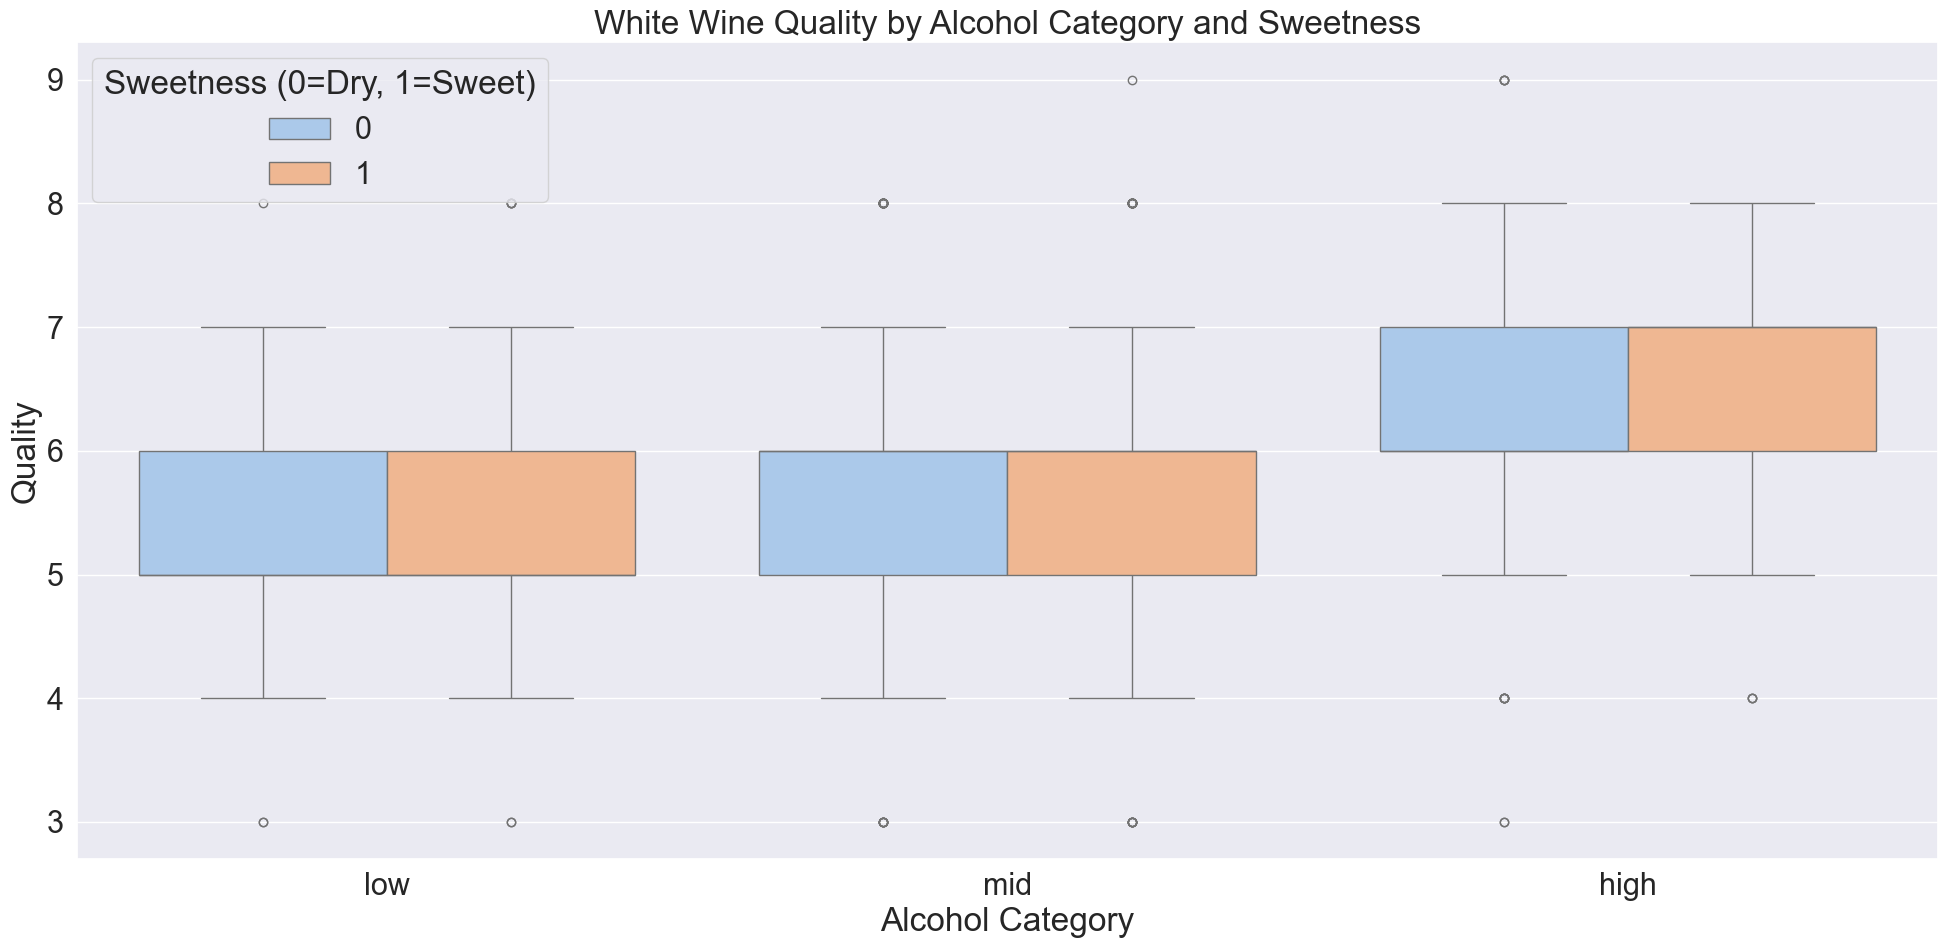

In [326]:
# Extension: Additional Descriptive Analysis
# Extension: Quality by Alcohol Category and Sweetness
plt.figure(figsize=(20, 10))
seaborn.boxplot(data=white_wine, x='alcohol_cat', y='quality', hue='isSweet', palette='pastel')
plt.title("White Wine Quality by Alcohol Category and Sweetness")
plt.xlabel("Alcohol Category")
plt.ylabel("Quality")
plt.legend(title="Sweetness (0=Dry, 1=Sweet)")
plt.tight_layout()
plt.show()

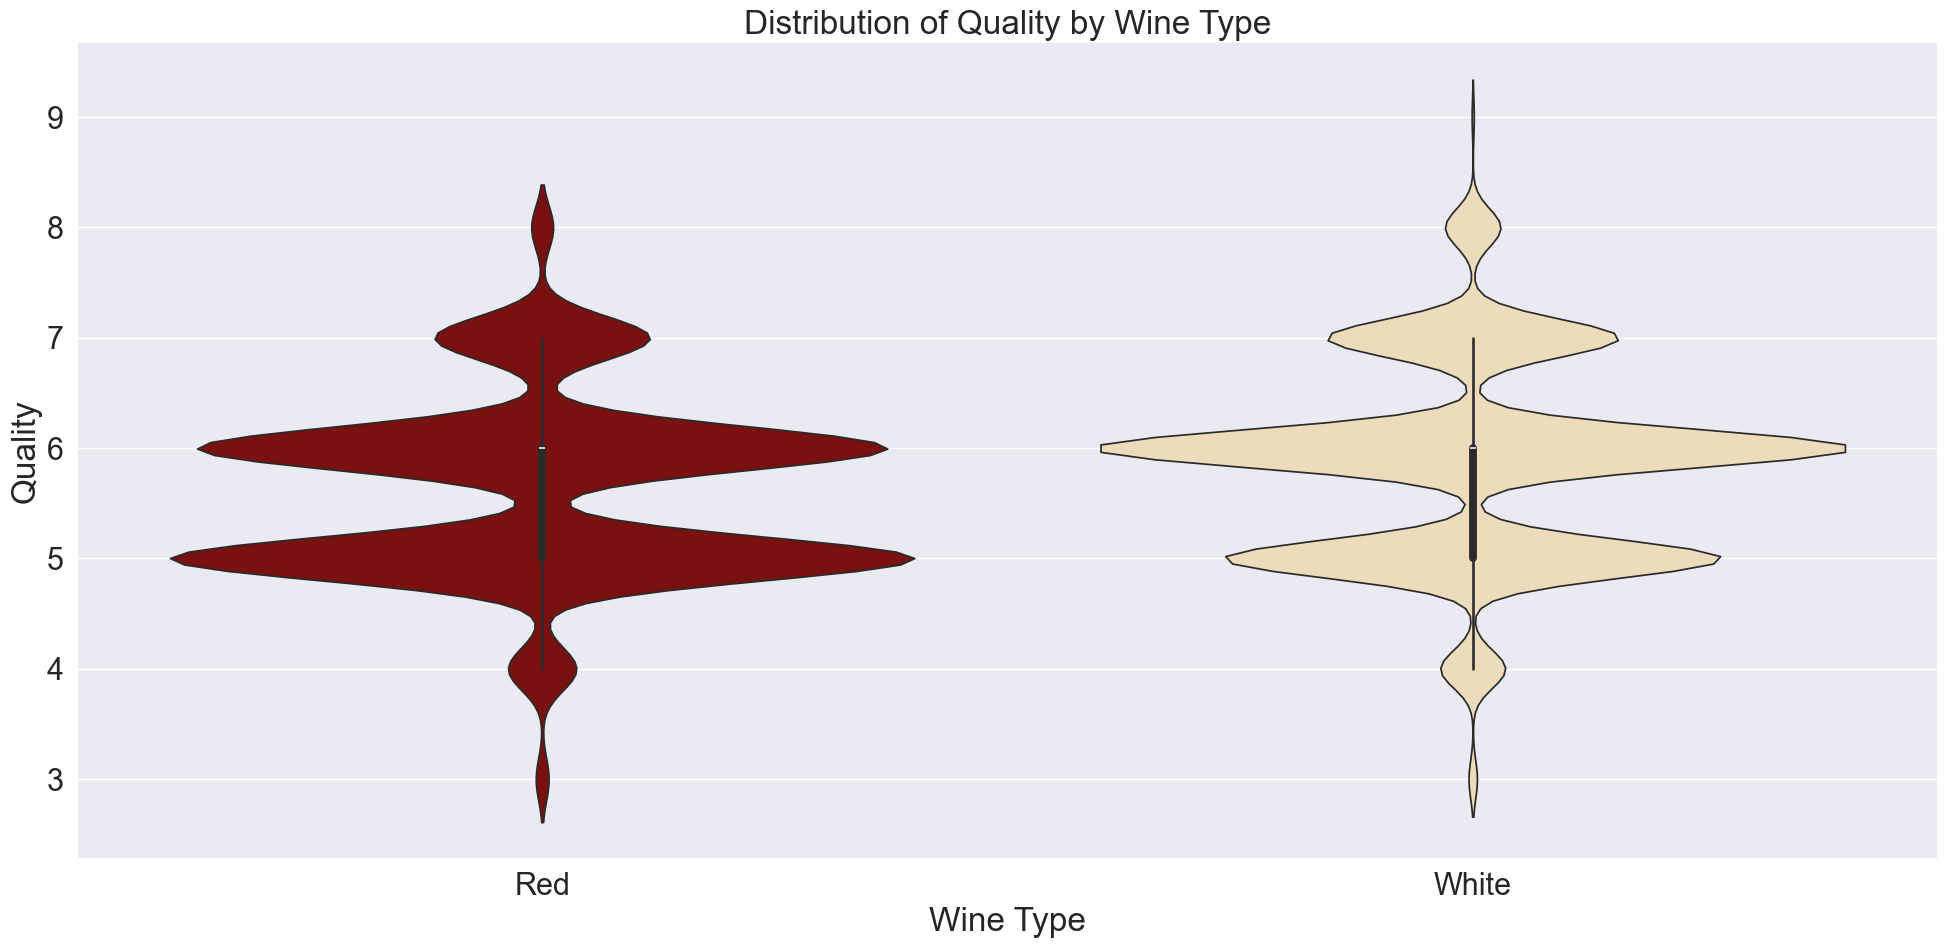

In [327]:
# Extension: Quality Comparison Between Red and White Wines
plt.figure(figsize=(20, 10))
seaborn.violinplot(data=combined_wine, x='type', y='quality', palette={'Red': '#8B0000', 'White': '#F5DEB3'})
plt.title("Distribution of Quality by Wine Type")
plt.xlabel("Wine Type")
plt.ylabel("Quality")
plt.tight_layout()
plt.show()

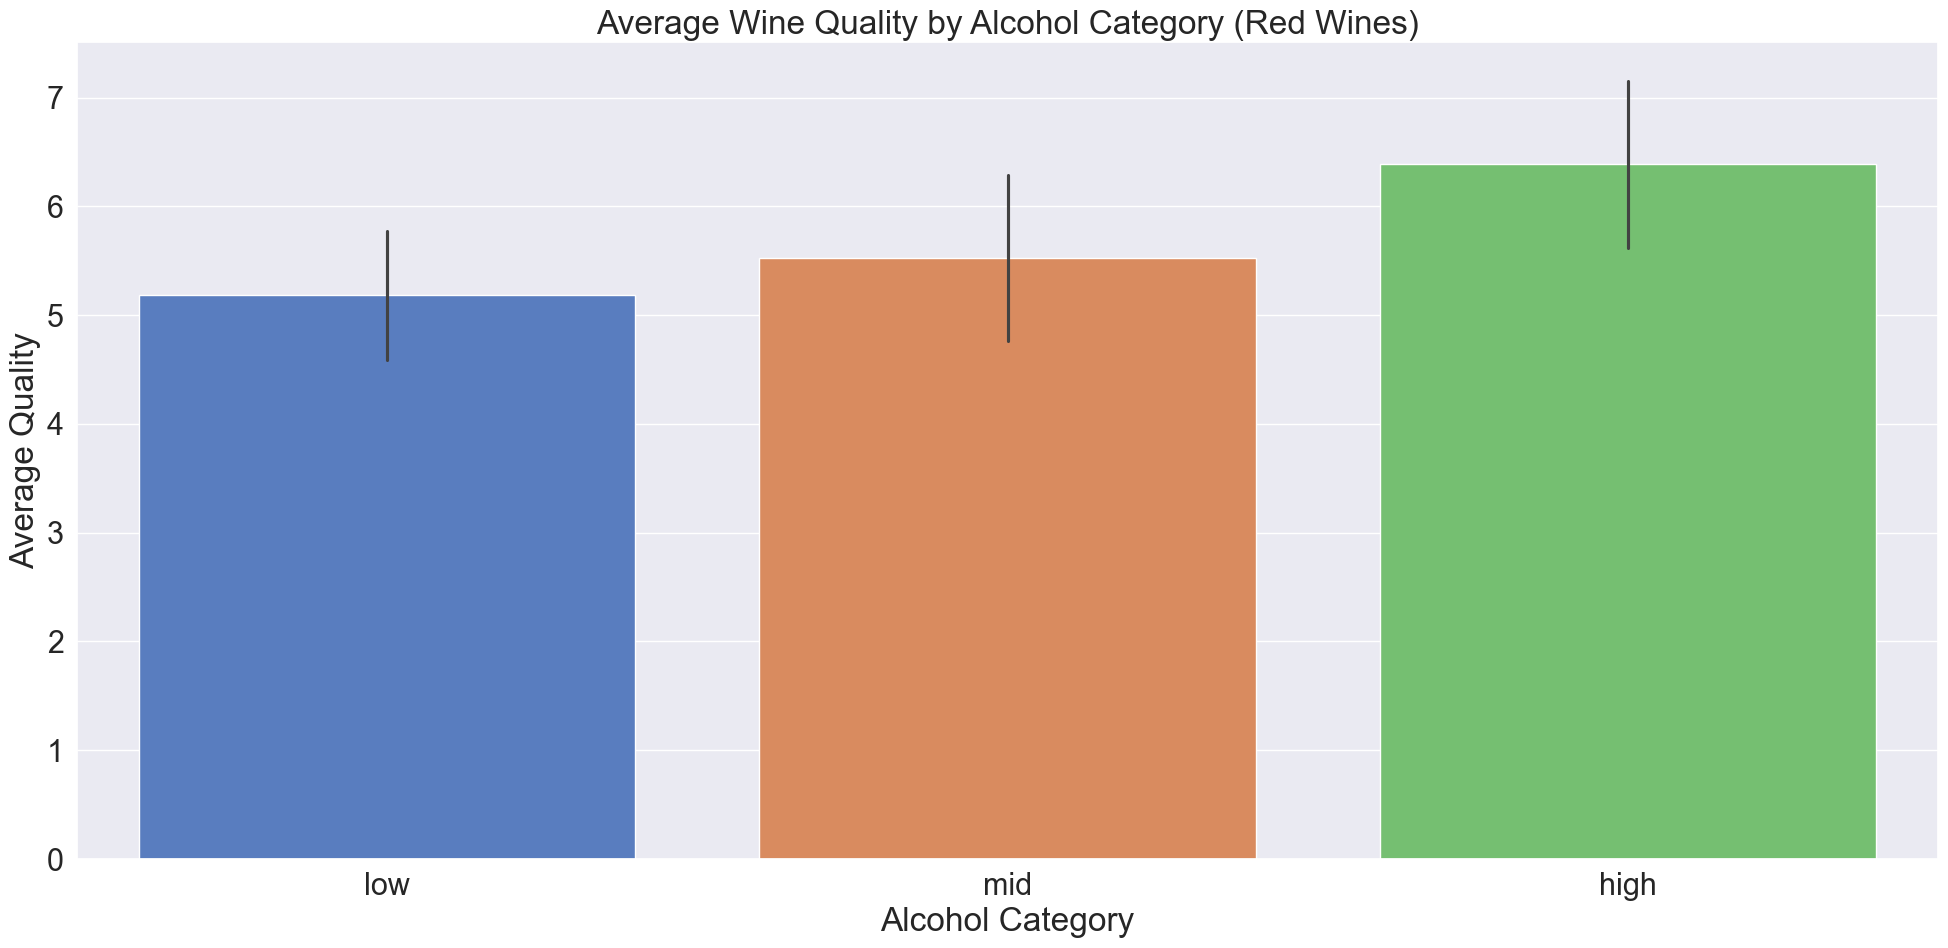

In [328]:
# Extension: Quality by Alcohol Category (Disregarding Wine Type)
plt.figure(figsize=(20, 10))
seaborn.barplot(data=red_wine, x='alcohol_cat', y='quality', ci='sd', palette='muted')
plt.title("Average Wine Quality by Alcohol Category (Red Wines)")
plt.xlabel("Alcohol Category")
plt.ylabel("Average Quality")
plt.tight_layout()
plt.show()

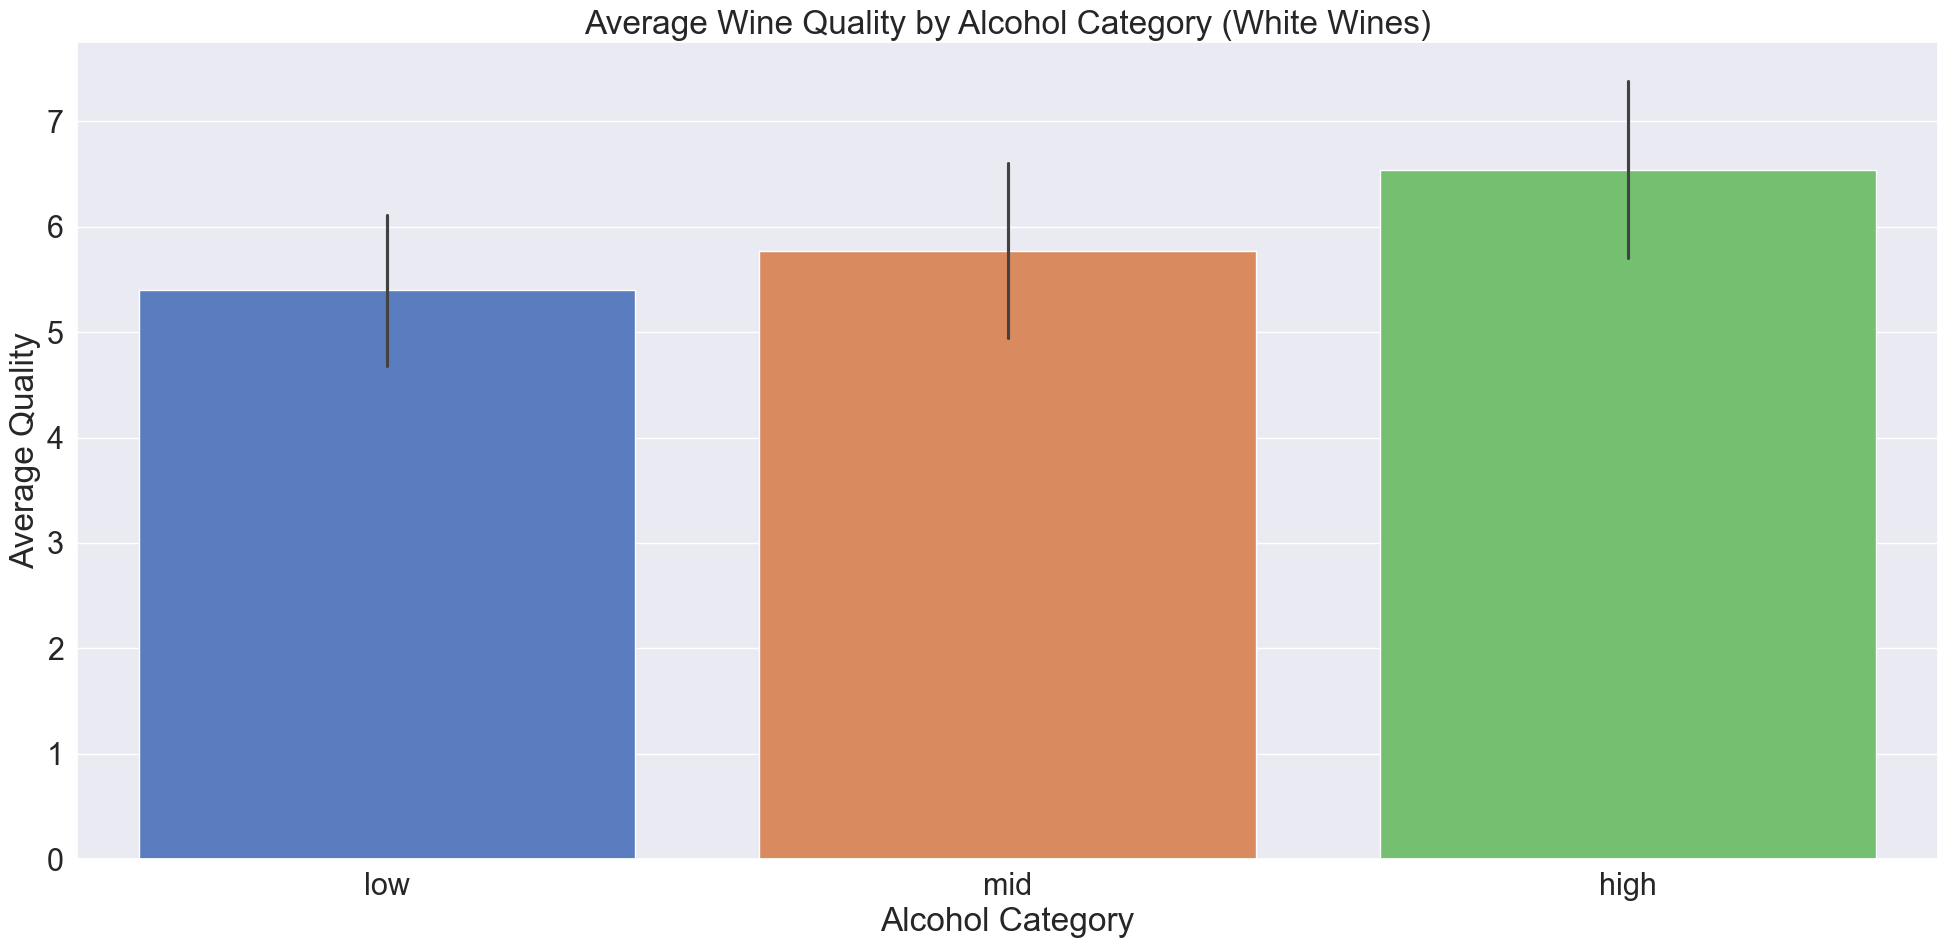

In [329]:
plt.figure(figsize=(20, 10))
seaborn.barplot(data=white_wine, x='alcohol_cat', y='quality', ci='sd', palette='muted')
plt.title("Average Wine Quality by Alcohol Category (White Wines)")
plt.xlabel("Alcohol Category")
plt.ylabel("Average Quality")
plt.tight_layout()
plt.show()

# Task 2
Try and determine which subset of your variables can be most useful for learning
This is in preparation to applying machine learning to create your model. To do this, analyse correlations between:

- Each pair of variables
- Each variable and the outcome (quality)
-Produce a visual representation of the Correlation Matrix, using  seaborn, matplotlib, or AltairLinks to an external site.
Comment on how some of the variables may relate to others. For this task, you may use Pandas methods to automatically create correlation matrices, for example
 DataFrame.corr. Take care when using the correct metrics, i.e. you must choose between {‘pearson’, ‘kendall’, ‘spearman’}. Consult the documentation to 
 learn about these metrics.


Combined Wine Correlation Matrix:
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00              0.21         0.28   
volatile acidity               0.21              1.00        -0.30   
citric acid                    0.28             -0.30         1.00   
residual sugar                -0.03             -0.02         0.07   
chlorides                      0.36              0.43        -0.06   
free sulfur dioxide           -0.27             -0.37         0.12   
total sulfur dioxide          -0.25             -0.34         0.16   
density                        0.45              0.31         0.06   
pH                            -0.26              0.18        -0.31   
sulphates                      0.23              0.26         0.03   
alcohol                       -0.11             -0.06         0.02   
quality                       -0.10             -0.25         0.12   

                      residual sugar  chlorides  free

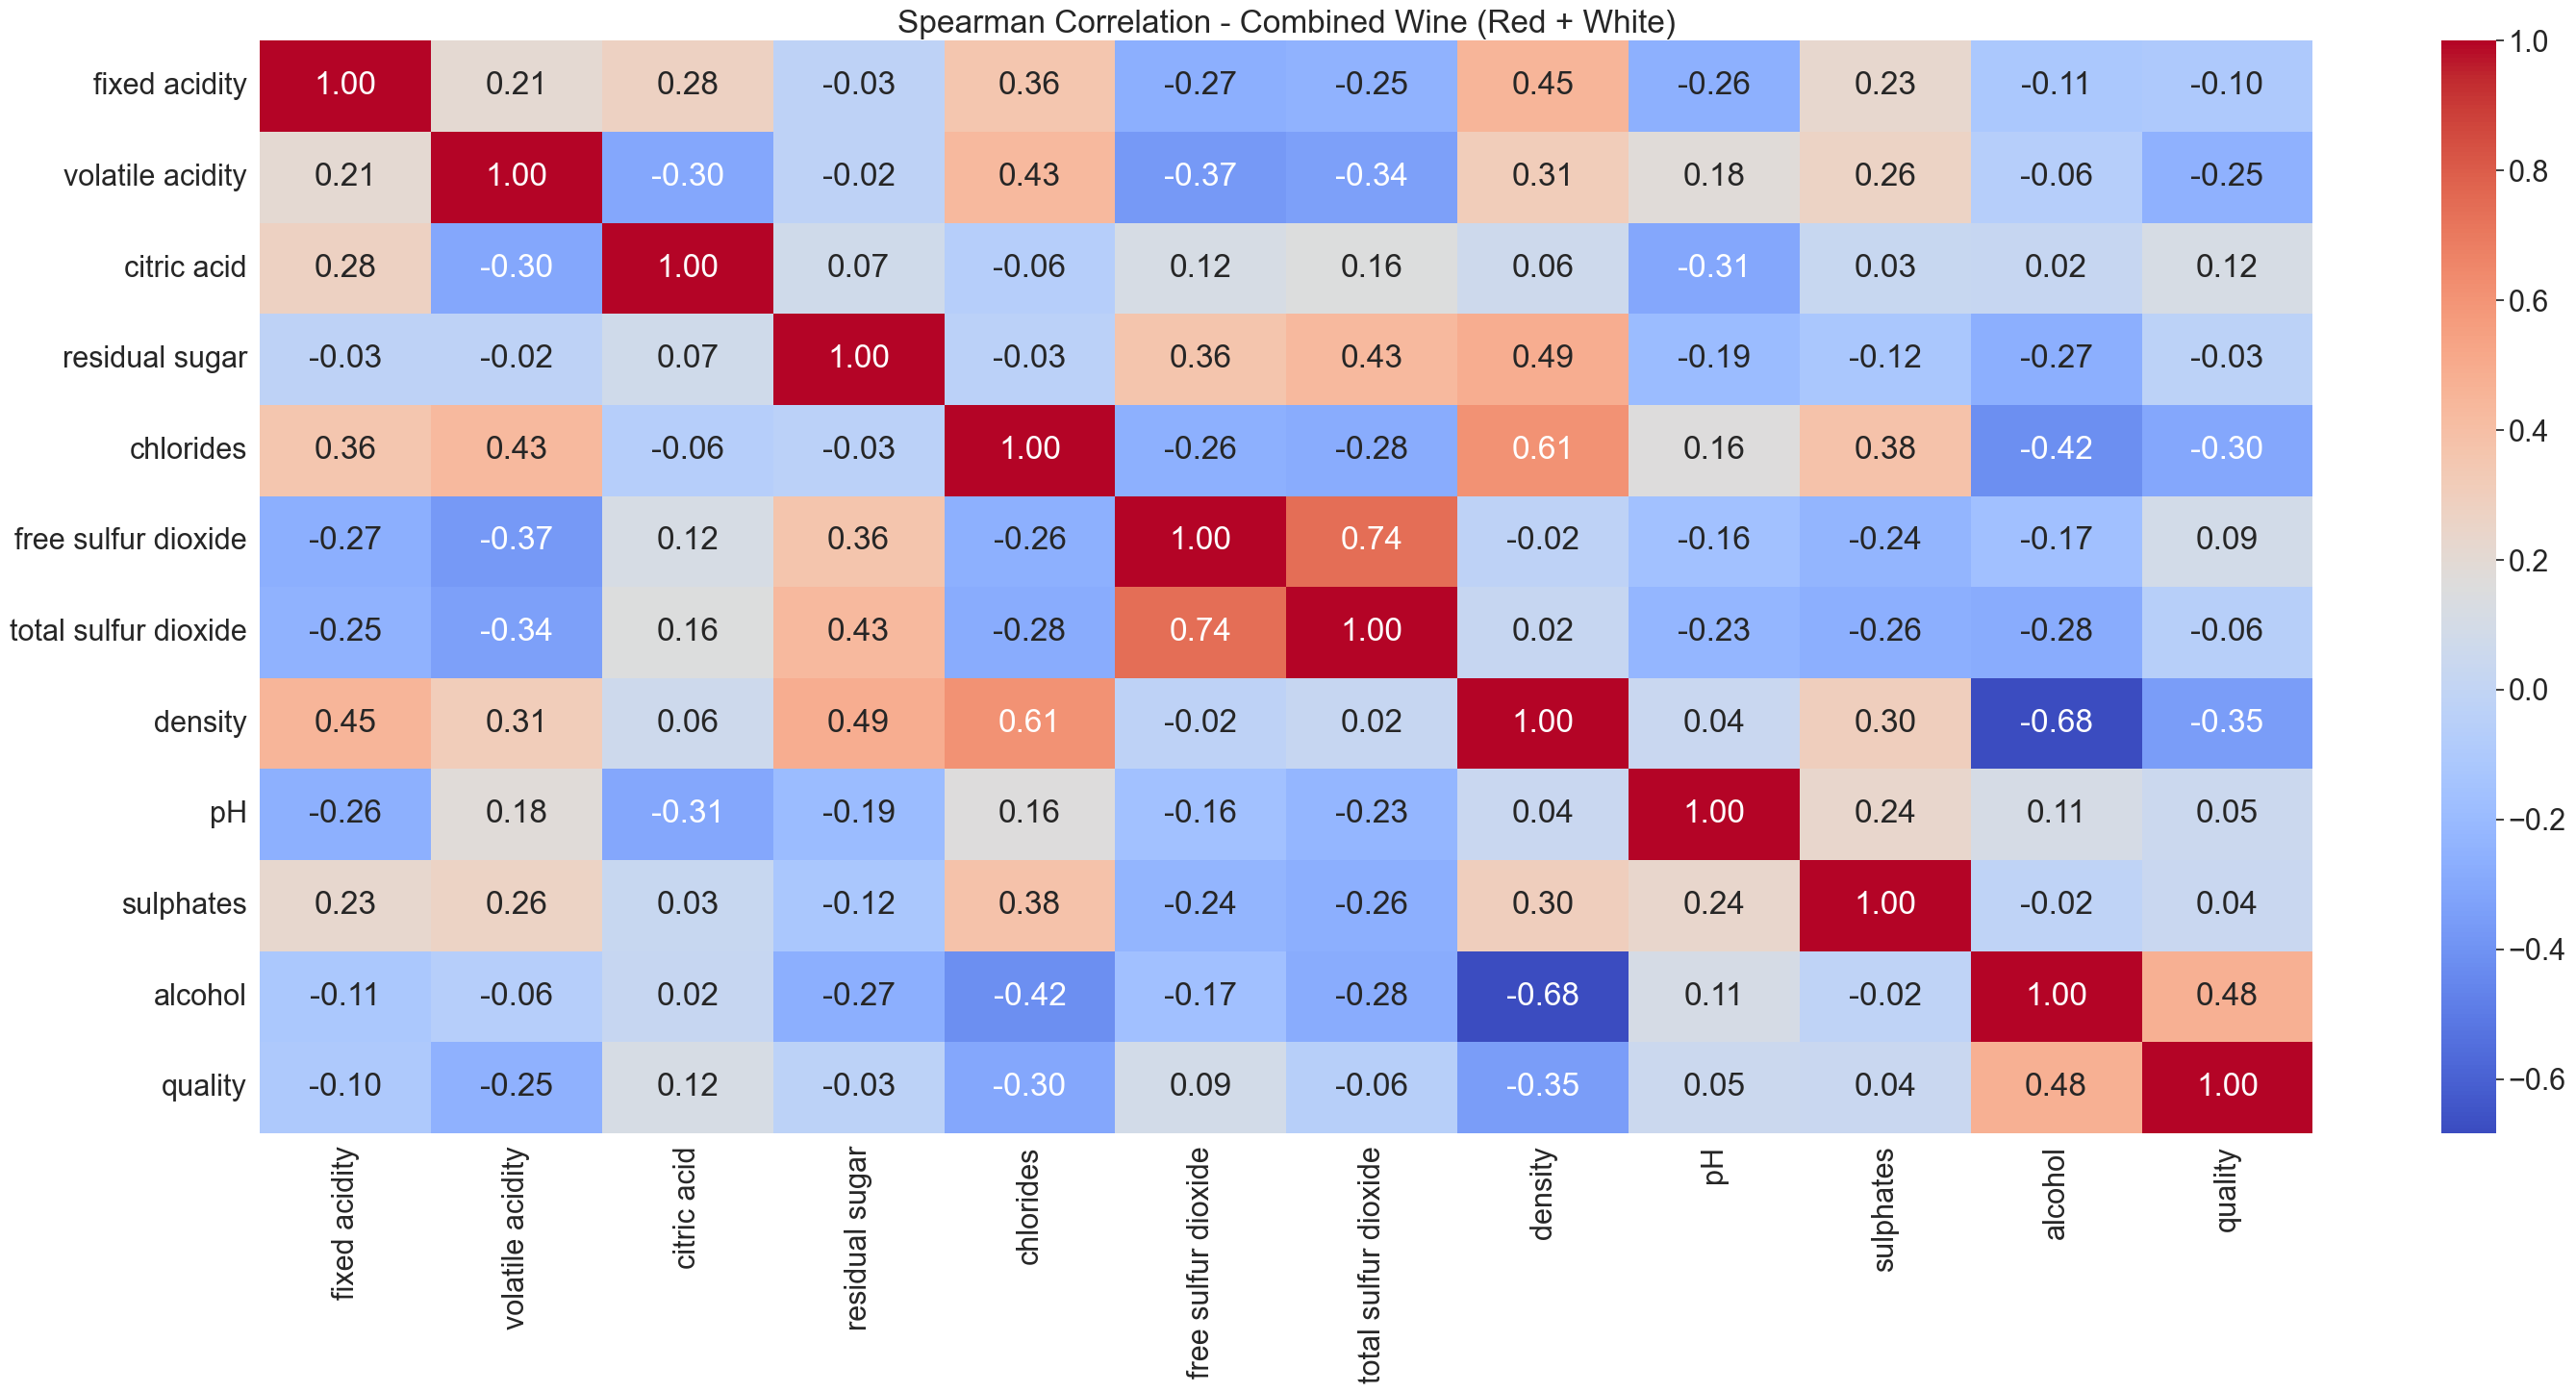

In [330]:
# Correlation Heatmap - Spearmans Correlation 

combined_corr = combined_wine.select_dtypes(include='number').corr(method='spearman')

print("\nCombined Wine Correlation Matrix:\n", combined_corr)

plt.figure(figsize=(30, 15))
seaborn.heatmap(combined_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation - Combined Wine (Red + White)')
plt.tight_layout()
plt.show()

If two variables carry too much of the same signal, it may confuse or overfit your model — so this helps in feature selection.
Good Predictors of Quality:
- alcohol → 0.45 correlation with quality → moderate positive.
- volatile acidity → -0.26 → inverse relationship (more acidity = lower quality).
- density → -0.32 → Higher density, generally lower quality.
- chlorides → -0.30 → More saltiness = worse perception.


Combined Wine - Correlation with Quality:
 quality                 1.00
alcohol                 0.48
density                -0.35
chlorides              -0.30
volatile acidity       -0.25
citric acid             0.12
fixed acidity          -0.10
free sulfur dioxide     0.09
total sulfur dioxide   -0.06
pH                      0.05
sulphates               0.04
residual sugar         -0.03
Name: quality, dtype: float64


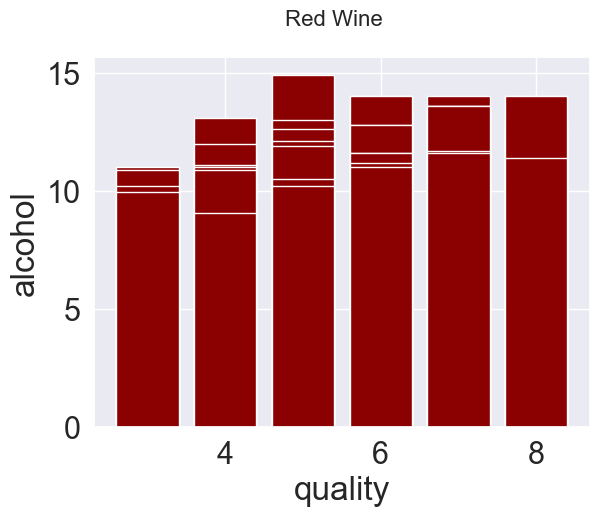

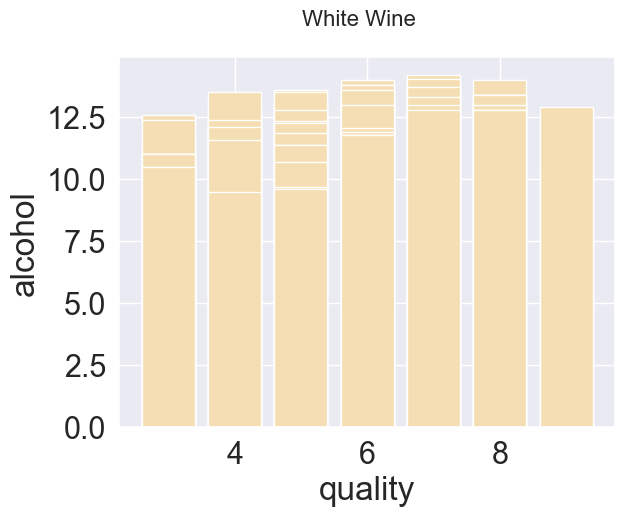

In [331]:
# Filter correlations with 'quality' only
combined_quality_corr = combined_corr['quality'].sort_values(key=abs, ascending=False)

print("\nCombined Wine - Correlation with Quality:\n", combined_quality_corr)

plt.bar(red_wine['quality'], red_wine['alcohol'], color='#8B0000')
plt.suptitle("Red Wine", fontsize=16)
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

plt.bar(white_wine['quality'], white_wine['alcohol'], color='#F5DEB3')
plt.suptitle("White Wine", fontsize=16)
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

After analyzing the Spearman correlation matrix for the combined wine dataset, several variables showed meaningful relationships with wine quality. Alcohol content demonstrated a moderate positive correlation with quality (~0.48), while density (-0.35), volatile acidity (-0.25), and chlorides (-0.30) exhibited moderate negative correlations. Features such as residual sugar and isSweet were highly correlated (0.87), indicating redundancy, and similar multicollinearity was observed between free and total sulfur dioxide (0.74). These insights will guide the feature selection process for model building, focusing on variables that are informative yet not overly redundant.

In [332]:
# Feature Extraction

# Calculate mean and standard deviation for each feature
feature_stats = combined_wine.describe().transpose()[['mean', 'std']]

# Print the feature name, mean, and standard deviation
print(feature_stats)


                       mean   std
fixed acidity          7.22  1.32
volatile acidity       0.34  0.17
citric acid            0.32  0.15
residual sugar         5.05  4.50
chlorides              0.06  0.04
free sulfur dioxide   30.04 17.81
total sulfur dioxide 114.11 56.77
density                0.99  0.00
pH                     3.22  0.16
sulphates              0.53  0.15
alcohol               10.55  1.19
quality                5.80  0.88


In [333]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Feature Reduction using PCA

# Convert string columns to numeric before scaling
# Check each column for string/object data types
for column in combined_wine.columns:
    if combined_wine[column].dtype == 'object':
        print(f"Converting column '{column}' from {combined_wine[column].dtype} to numeric")
        le = LabelEncoder()
        combined_wine[column] = le.fit_transform(combined_wine[column])

# Double-check that all columns are now numeric
# print(combined_wine.dtypes)

# Prepare data
X = combined_wine.drop(columns=['quality'])  # Features
y = (combined_wine['quality'] >= 6).astype(int)  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Reduce to 5 components
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio for each component
print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Show the first few rows of the transformed data (PCA components)
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print("\nPCA Transformed Data (First few rows):")
print(pca_df.head())

# Optionally, you can look at which features contribute most to each principal component
print("\nPCA Components (feature contributions):")
loadings_df = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=X.columns
)
print(loadings_df)

Converting column 'type' from object to numeric
Converting column 'wine_type' from object to numeric
Explained Variance Ratio for each component:
[0.35864239 0.1917309  0.12272285 0.07335679 0.058017  ]
Total variance explained: 80.45%

PCA Transformed Data (First few rows):
    PC1   PC2   PC3   PC4   PC5
0 -4.04 -0.45 -2.57 -0.81  0.02
1 -4.01  0.28 -1.86 -0.79  1.17
2 -3.98  0.04 -1.57 -0.81  0.76
3 -3.03  1.70  2.54 -0.36 -0.64
4 -3.89 -0.42 -2.53 -0.70  0.00

PCA Components (feature contributions):
                       PC1   PC2   PC3   PC4   PC5
fixed acidity        -0.24  0.25  0.45 -0.20 -0.16
volatile acidity     -0.32  0.00 -0.28 -0.24  0.12
citric acid           0.09  0.24  0.57  0.25 -0.18
residual sugar        0.19  0.42 -0.19 -0.18 -0.40
chlorides            -0.27  0.21  0.03  0.28  0.62
free sulfur dioxide   0.29  0.22 -0.17  0.34  0.05
total sulfur dioxide  0.36  0.24 -0.15  0.20  0.08
density              -0.19  0.53 -0.16 -0.10 -0.26
pH                   -0.15 -0.21

Top predictors: Focus on alcohol, density, and chlorides, which have the strongest correlations with quality.

Negligible predictors: Variables like isSweet (0.00) and cluster (0.01) show very little predictive power for quality.

Moderate predictors: volatile acidity (-0.25) and citric acid (0.12) have weaker correlations but could still be useful in a machine learning model.

## Task 3

Experiment with one or more machine learning approaches
 
This creates a predictive model for quality. Some options are:
Consider this as a classification problem. You can do this by considering the quality labels, ie. '5', '6', ... '9' and reducing the number of possible labels to two (binary classification). You should experiment with different thresholds and compare results, for instance define "low" to be quality <6, "high" >=6, then change the threshold to 5 or 7, etc. 
Consider this a regression problem, where quality is now a continuous variable.

&

## Task 4
Evaluate each model using k-fold cross validation
Report the model's performance on both the training set and test set, using appropriate metrics for the kind of model chosen. For example, a binary classifier can be evaluated using F1-score, ROC curve, AUC. A regression model is usually evaluated using MSE, RMSE and related "error" metrics.


--- Threshold: 5 ---
Confusion Matrix:
 [[   7   40]
 [   6 1011]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.15      0.23        47
           1       0.96      0.99      0.98      1017

    accuracy                           0.96      1064
   macro avg       0.75      0.57      0.61      1064
weighted avg       0.94      0.96      0.94      1064

Accuracy Score: 0.96


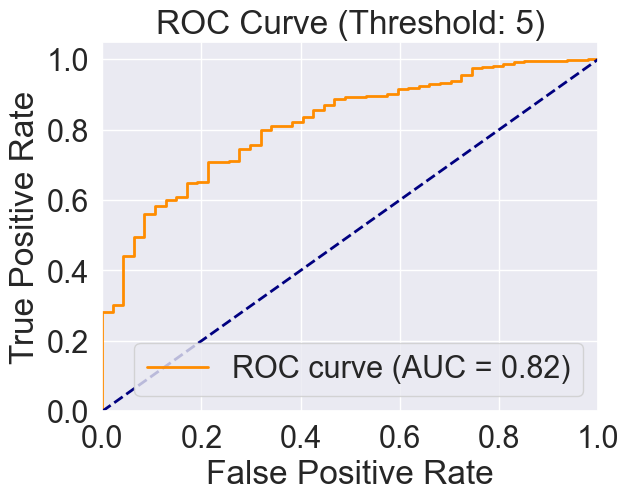

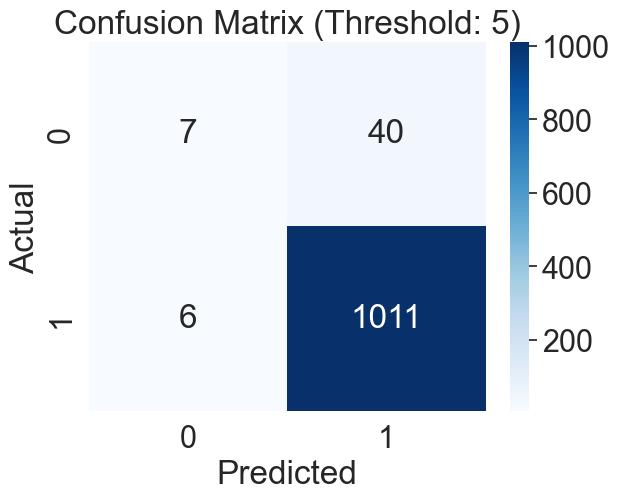


--- Threshold: 6 ---
Confusion Matrix:
 [[237 161]
 [110 556]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.60      0.64       398
           1       0.78      0.83      0.80       666

    accuracy                           0.75      1064
   macro avg       0.73      0.72      0.72      1064
weighted avg       0.74      0.75      0.74      1064

Accuracy Score: 0.75


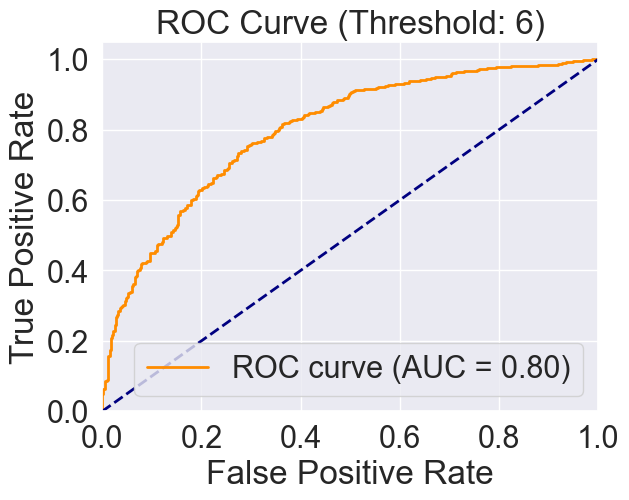

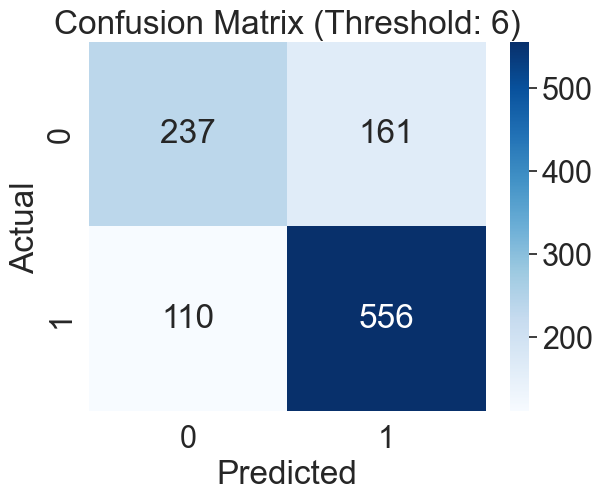


--- Threshold: 7 ---
Confusion Matrix:
 [[801  61]
 [130  72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       862
           1       0.54      0.36      0.43       202

    accuracy                           0.82      1064
   macro avg       0.70      0.64      0.66      1064
weighted avg       0.80      0.82      0.81      1064

Accuracy Score: 0.82


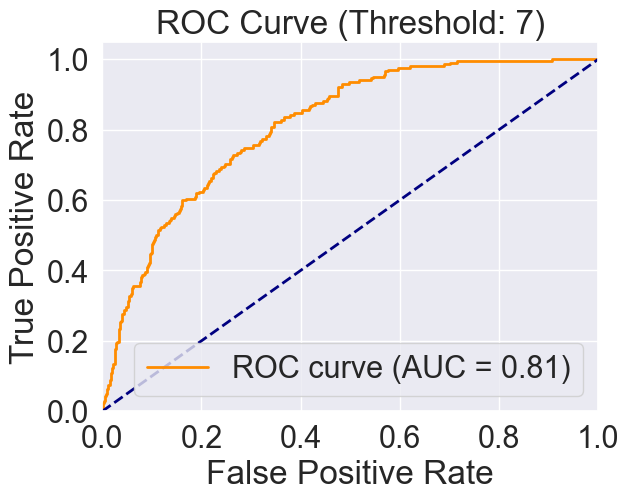

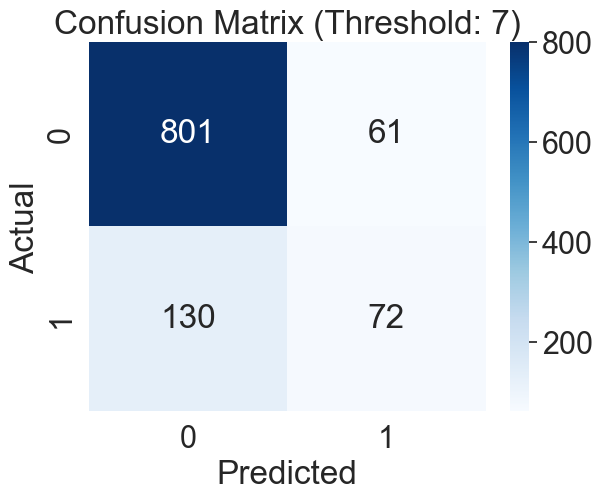


--- Threshold: 9 ---
Confusion Matrix:
 [[1063    0]
 [   1    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1063
           1       1.00      0.00      0.00         1

    accuracy                           1.00      1064
   macro avg       1.00      0.50      0.50      1064
weighted avg       1.00      1.00      1.00      1064

Accuracy Score: 1.0


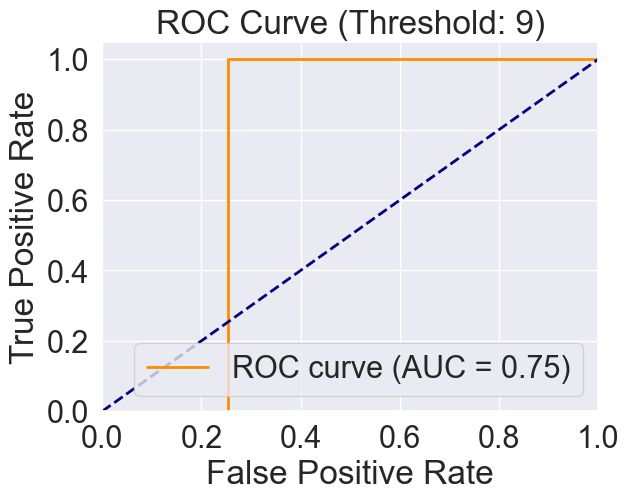

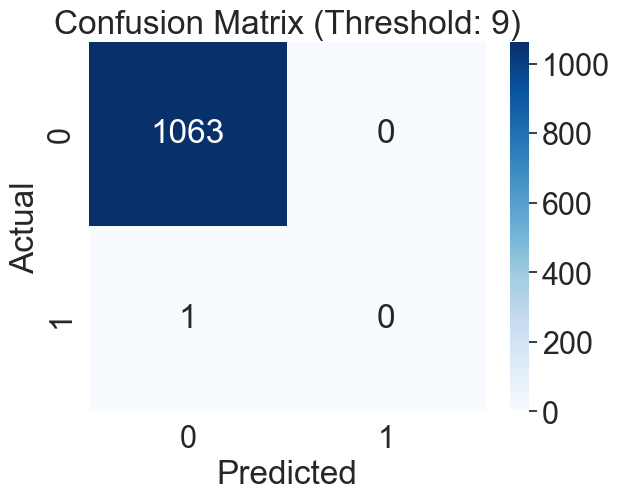


--- Summary Results ---

Threshold: 5
Accuracy: 0.96
F1 Score: 0.98
AUC: 0.82

Threshold: 6
Accuracy: 0.75
F1 Score: 0.80
AUC: 0.80

Threshold: 7
Accuracy: 0.82
F1 Score: 0.43
AUC: 0.81

Threshold: 9
Accuracy: 1.00
F1 Score: 0.00
AUC: 0.75


In [334]:
# XGBoost

# Selected features
features = [
    'alcohol', 'density', 'volatile acidity', 'citric acid', 'fixed acidity',
    'free sulfur dioxide', 'total sulfur dioxide'
]

# Threshold for classification
thresholds = [5, 6, 7, 9]

results = {}

for threshold in thresholds:
    print(f"\n--- Threshold: {threshold} ---")

    # Binary target
    combined_wine_binary = combined_wine.copy()
    combined_wine_binary['quality_binary'] = (combined_wine_binary['quality'] >= threshold).astype(int)

    X = combined_wine_binary[features]
    y = combined_wine_binary['quality_binary']

    # Skip if only one class present
    if len(y.unique()) < 2:
        print(f"Skipping threshold {threshold}: only one class present in the data.")
        continue
    
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    # Train/test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
    )

    # XGBoost model
    xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False)
    xgb_model.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = xgb_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    results[threshold] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'report': report
    }

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print("Accuracy Score:", round(acc, 2))

    # Get probability scores for ROC curve
    y_prob = xgb_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Store AUC in results
    results[threshold]['roc_auc'] = roc_auc

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Threshold: {threshold})')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


    seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("\n--- Summary Results ---")
for threshold, res in results.items():
    print(f"\nThreshold: {threshold}")
    print(f"Accuracy: {res['accuracy']:.2f}")
    print(f"F1 Score: {res['report']['1']['f1-score']:.2f}")
    print(f"AUC: {res.get('roc_auc', 'N/A'):.2f}")




--- Threshold: 5 ---
Confusion Matrix:
 [[   0   47]
 [   0 1017]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        47
           1       0.96      1.00      0.98      1017

    accuracy                           0.96      1064
   macro avg       0.98      0.50      0.49      1064
weighted avg       0.96      0.96      0.93      1064

Accuracy Score: 0.9558


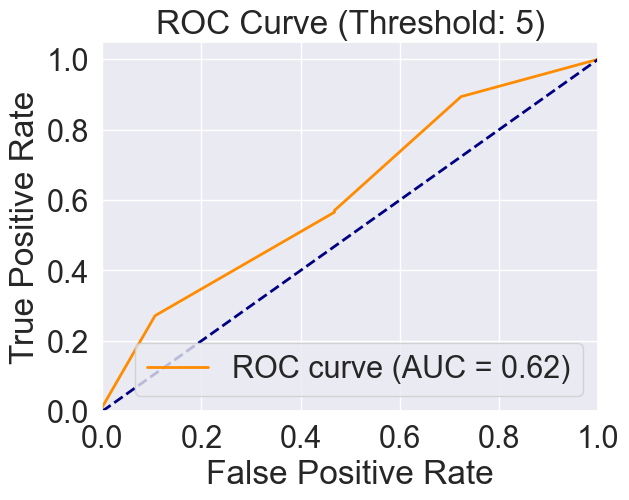

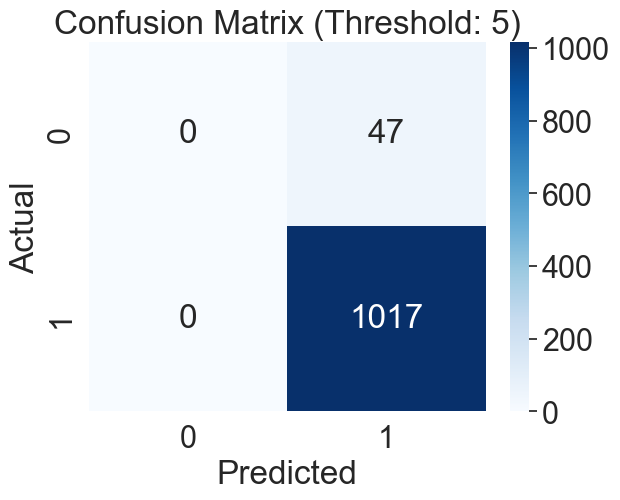


--- Threshold: 6 ---
Confusion Matrix:
 [[220 178]
 [ 97 569]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.55      0.62       398
           1       0.76      0.85      0.81       666

    accuracy                           0.74      1064
   macro avg       0.73      0.70      0.71      1064
weighted avg       0.74      0.74      0.73      1064

Accuracy Score: 0.7415


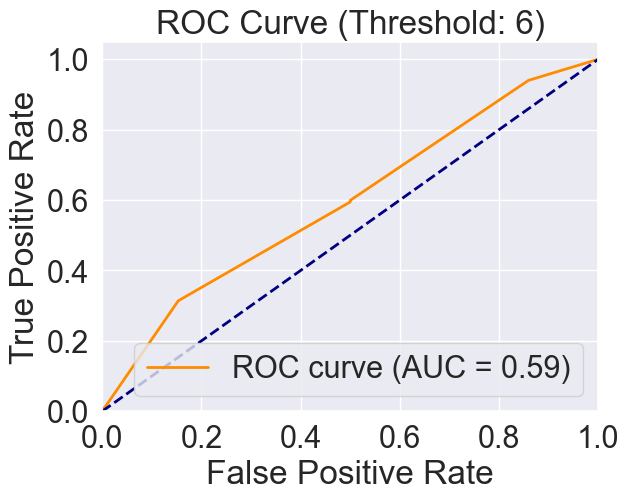

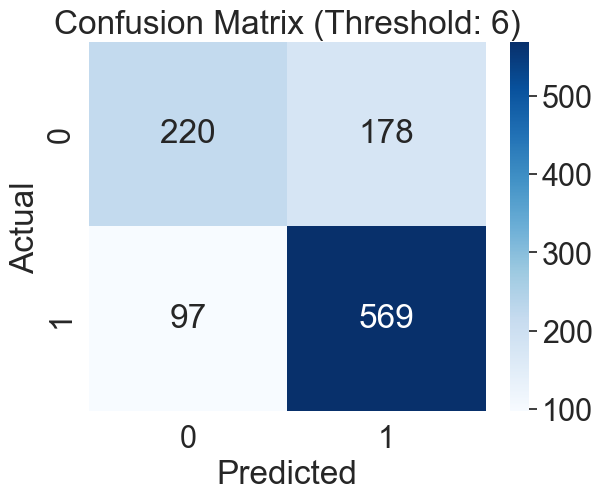


--- Threshold: 7 ---
Confusion Matrix:
 [[801  61]
 [147  55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89       862
           1       0.47      0.27      0.35       202

    accuracy                           0.80      1064
   macro avg       0.66      0.60      0.62      1064
weighted avg       0.77      0.80      0.78      1064

Accuracy Score: 0.8045


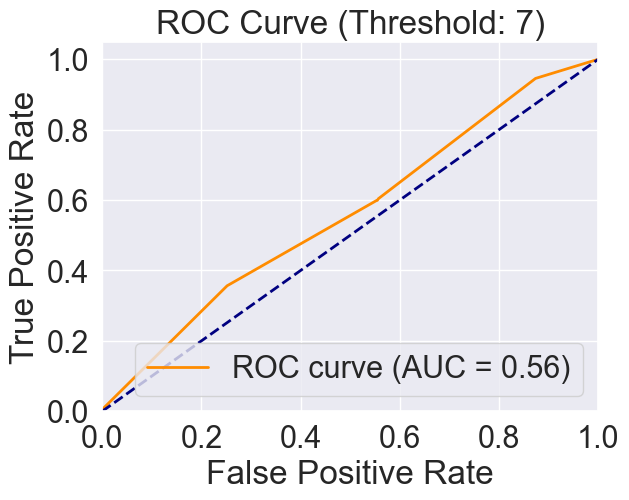

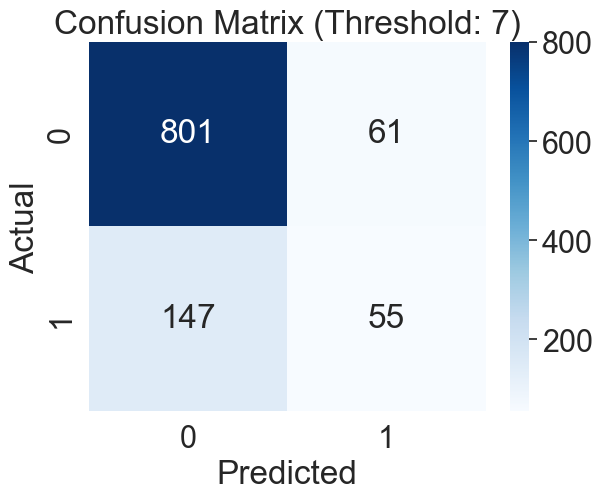


--- Threshold: 9 ---
Confusion Matrix:
 [[1063    0]
 [   1    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1063
           1       1.00      0.00      0.00         1

    accuracy                           1.00      1064
   macro avg       1.00      0.50      0.50      1064
weighted avg       1.00      1.00      1.00      1064

Accuracy Score: 0.9991


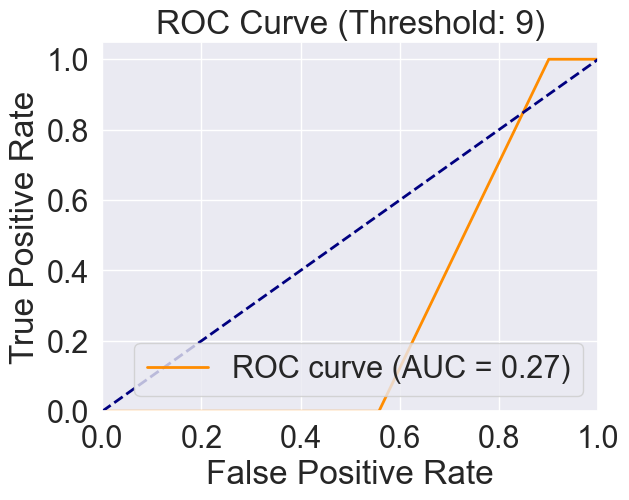

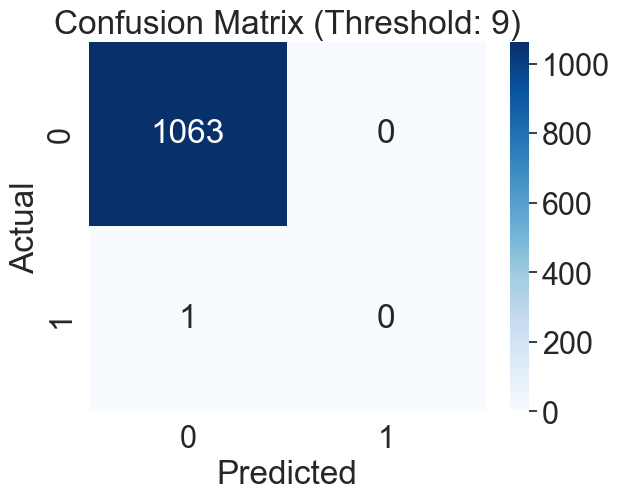


--- Summary Results ---

Threshold: 5
Accuracy: 0.96
F1 Score: 0.98
AUC: 0.62

Threshold: 6
Accuracy: 0.74
F1 Score: 0.81
AUC: 0.59

Threshold: 7
Accuracy: 0.80
F1 Score: 0.35
AUC: 0.56

Threshold: 9
Accuracy: 1.00
F1 Score: 0.00
AUC: 0.27


In [335]:
# Logistic Regression for Binary Classification

# Selected features
features = [
    'alcohol', 'density', 'volatile acidity', 'citric acid', 'fixed acidity',
    'free sulfur dioxide', 'total sulfur dioxide'
]

# thresholds = [5, 6, 7, 9] | 6 came out as the best
thresholds = [5, 6, 7, 9]

results = {}

for threshold in thresholds:
    print(f"\n--- Threshold: {threshold} ---")

    # Binary target
    combined_wine_binary = combined_wine.copy()
    combined_wine_binary['quality_binary'] = (combined_wine_binary['quality'] >= threshold).astype(int)

    X = combined_wine_binary[features]
    y = combined_wine_binary['quality_binary']

    # Skip if only one class present
    if len(y.unique()) < 2:
        print(f"Skipping threshold {threshold}: only one class present in the data.")
        continue
    
    scaler = StandardScaler()
    scaler.fit(X)
    x_standard = scaler.transform(X)
    
    # Train/test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Model
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = logreg.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

  
    results[threshold] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'report': report
    }

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print("Accuracy Score:", round(acc, 4))

    # Get probability scores for ROC curve
    y_prob = xgb_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Store AUC in results
    results[threshold]['roc_auc'] = roc_auc

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Threshold: {threshold})')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("\n--- Summary Results ---")
for threshold, res in results.items():
    print(f"\nThreshold: {threshold}")
    print(f"Accuracy: {res['accuracy']:.2f}")
    print(f"F1 Score: {res['report']['1']['f1-score']:.2f}")
    print(f"AUC: {res.get('roc_auc', 'N/A'):.2f}")



--- Threshold: 5 ---
Confusion Matrix:
 [[   4   43]
 [   1 1016]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.09      0.15        47
           1       0.96      1.00      0.98      1017

    accuracy                           0.96      1064
   macro avg       0.88      0.54      0.57      1064
weighted avg       0.95      0.96      0.94      1064

Accuracy Score: 0.9586


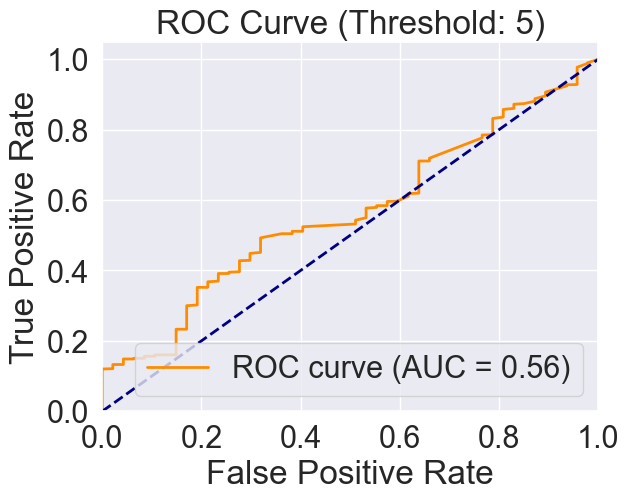

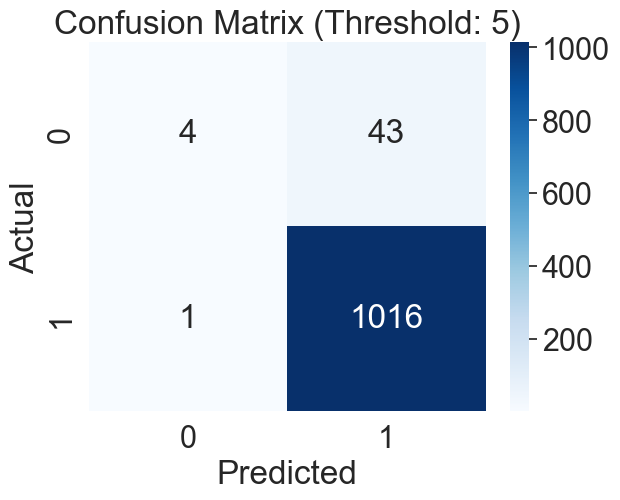

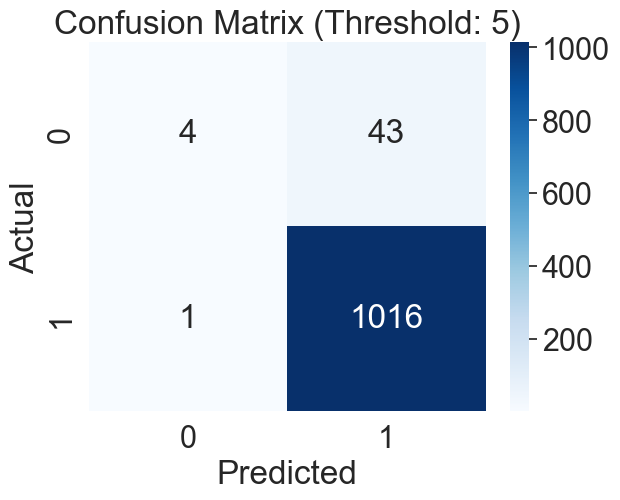


--- Threshold: 6 ---
Confusion Matrix:
 [[251 147]
 [105 561]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.63      0.67       398
           1       0.79      0.84      0.82       666

    accuracy                           0.76      1064
   macro avg       0.75      0.74      0.74      1064
weighted avg       0.76      0.76      0.76      1064

Accuracy Score: 0.7632


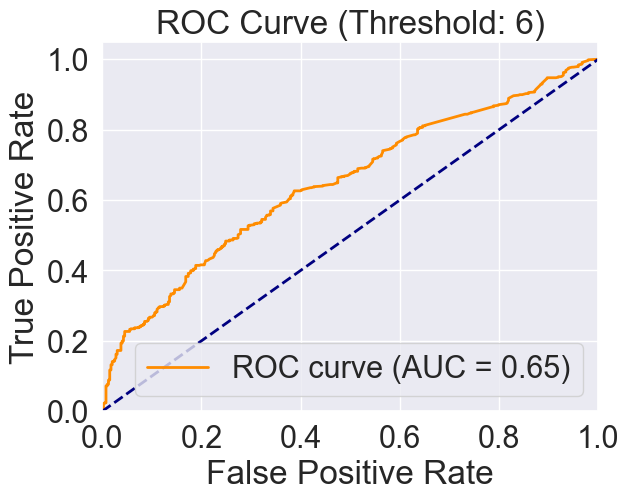

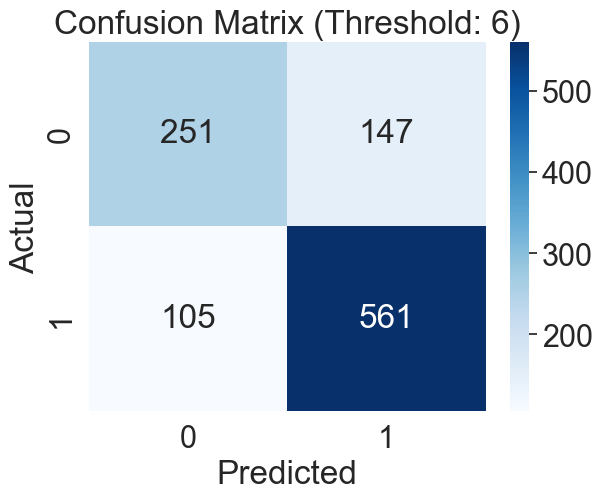

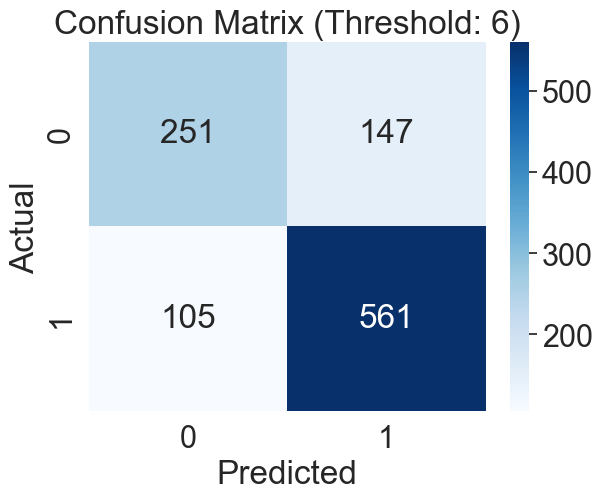


--- Threshold: 7 ---
Confusion Matrix:
 [[824  38]
 [141  61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       862
           1       0.62      0.30      0.41       202

    accuracy                           0.83      1064
   macro avg       0.74      0.63      0.65      1064
weighted avg       0.81      0.83      0.81      1064

Accuracy Score: 0.8318


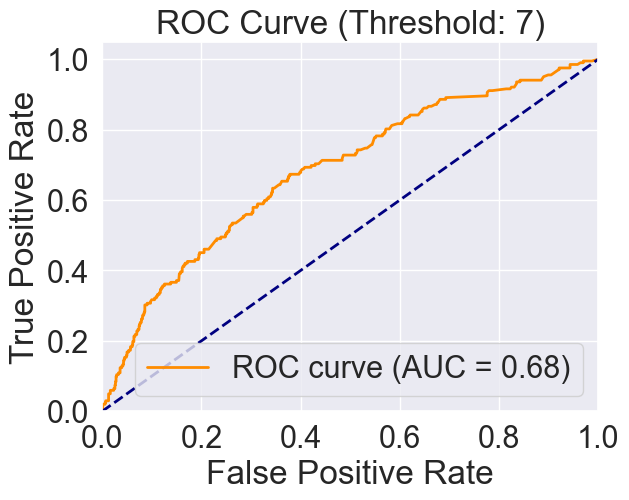

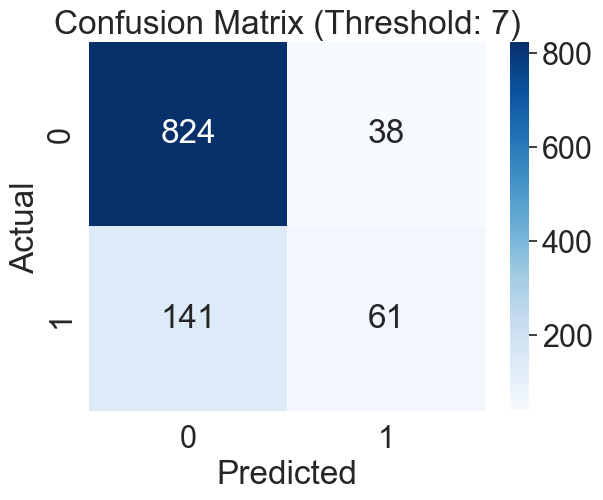

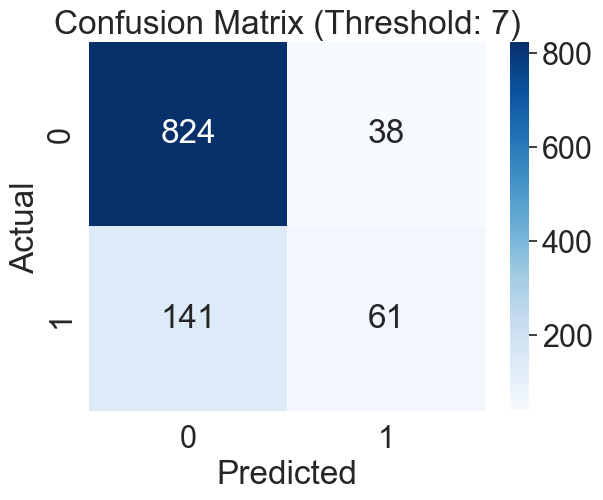


--- Threshold: 9 ---
Confusion Matrix:
 [[1063    0]
 [   1    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1063
           1       1.00      0.00      0.00         1

    accuracy                           1.00      1064
   macro avg       1.00      0.50      0.50      1064
weighted avg       1.00      1.00      1.00      1064

Accuracy Score: 0.9991


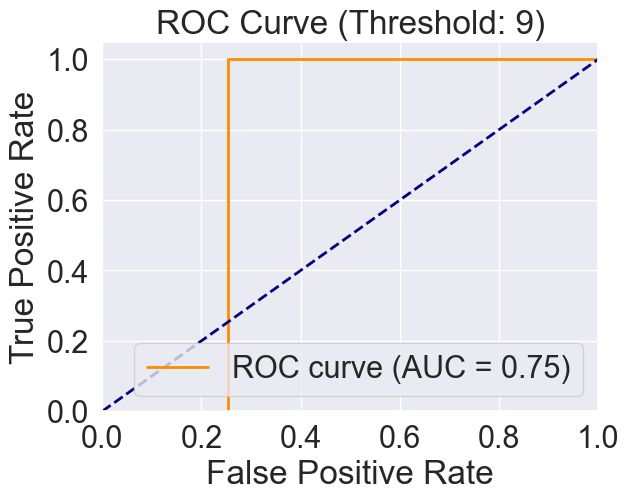

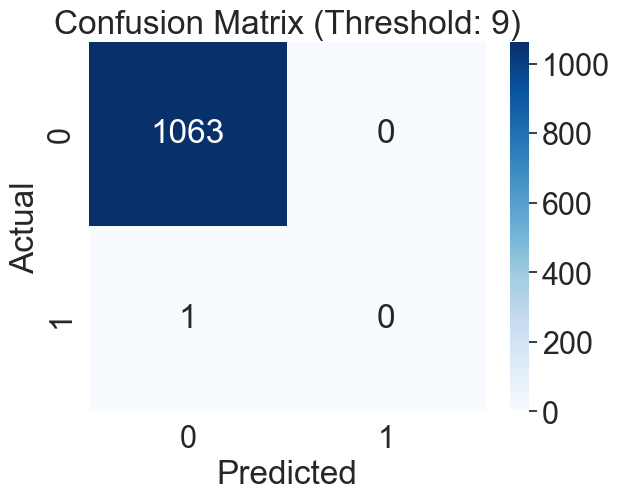

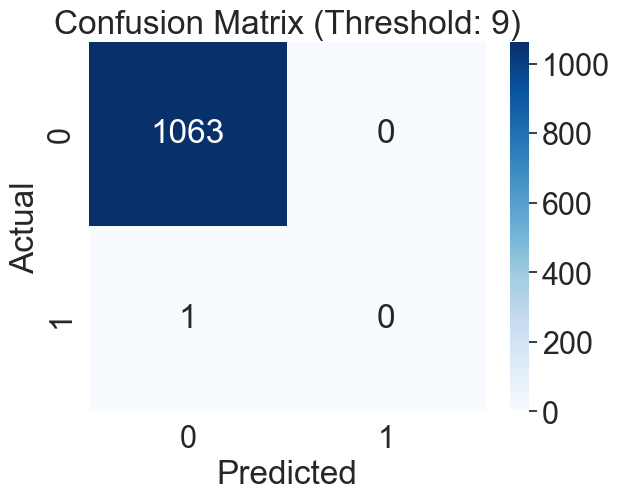


--- Summary Results ---

Threshold: 5
Accuracy: 0.96
F1 Score: 0.98
AUC: 0.56

Threshold: 6
Accuracy: 0.76
F1 Score: 0.82
AUC: 0.65

Threshold: 7
Accuracy: 0.83
F1 Score: 0.41
AUC: 0.68

Threshold: 9
Accuracy: 1.00
F1 Score: 0.00
AUC: 0.75


In [336]:
# Random Forest

# Selected features
features = [
    'alcohol', 'density', 'volatile acidity', 'citric acid', 'fixed acidity',
    'free sulfur dioxide', 'total sulfur dioxide'
]

# Threshold for classification
thresholds = [5, 6, 7, 9]

results = {}

for threshold in thresholds:
    print(f"\n--- Threshold: {threshold} ---")

    # Binary target
    combined_wine_binary = combined_wine.copy()
    combined_wine_binary['quality_binary'] = (combined_wine_binary['quality'] >= threshold).astype(int)

    X = combined_wine_binary[features]
    y = combined_wine_binary['quality_binary']

    # Skip if only one class present
    if len(y.unique()) < 2:
        print(f"Skipping threshold {threshold}: only one class present in the data.")
        continue
    
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    # Train/test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
    )

    # Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    results[threshold] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'report': report
    }

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print("Accuracy Score:", round(acc, 4))

    # Get probability scores for ROC curve
    y_prob = xgb_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Store AUC in results
    results[threshold]['roc_auc'] = roc_auc

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Threshold: {threshold})')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("\n--- Summary Results ---")
for threshold, res in results.items():
    print(f"\nThreshold: {threshold}")
    print(f"Accuracy: {res['accuracy']:.2f}")
    print(f"F1 Score: {res['report']['1']['f1-score']:.2f}")
    print(f"AUC: {res.get('roc_auc', 'N/A'):.2f}")

In [337]:
# Feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=["importance"]).sort_values("importance", ascending=False)

print("\nFeature Importance:\n", feature_importances)


Feature Importance:
                       importance
density                     0.27
total sulfur dioxide        0.18
free sulfur dioxide         0.13
volatile acidity            0.11
alcohol                     0.11
citric acid                 0.10
fixed acidity               0.10


In [338]:

# Hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit GridSearchCV on the original data (no scaling)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
print(f"Accuracy of best model: {accuracy_score(y_test, y_pred_best):.2f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy of best model: 1.00
